# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:56:21.047445: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:56:24.504428
2025-04-14 21:56:24.504428


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:56:18"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

IBOVESPA - Close  IBOVESPA - High  IBOVESPA - Low  IBOVESPA - Open  \
0          0.000000         0.000000        0.000000         0.000000   
1          0.000150         0.000150        0.000049         0.000034   
2          0.000299         0.000406        0.000200         0.000183   
3          0.000468         0.000484        0.000350         0.000333   
4          0.000703         0.000704        0.000519         0.000502   

   Dólar - Close  Dólar - High  Dólar - Low  Dólar - Open  Dow Jones - Close  \
0            0.0           0.0          0.0           0.0           0.003941   
1            0.0           0.0          0.0           0.0           0.004600   
2            0.0           0.0          0.0           0.0           0.004961   
3            0.0           0.0          0.0           0.0           0.005083   
4            0.0           0.0          0.0           0.0           0.005490   

   Dow Jones - High  ...  IBOVESPA - Spread %  Kospi - Spread %  \
0          0.003148  ...             0.000000               0.0   
1          0.003605  ...             0.036606               0.0   
2          0.003965  ...             0.020442               0.0   
3          0.004311  ...             0.008583               0.0   
4          0.004630  ...             0.015204               0.0   

   Minério de Ferro - Spread %  Nasdaq - Spread %  Nikkei - Spread %  \
0                          0.0           0.000000           0.000000   
1                          0.0           0.029525           0.000000   
2                          0.0           0.119266           0.201590   
3                          0.0           0.056198           0.049836   
4                          0.0           0.182793           0.129181   

   Petróleo Brent - Spread %  Petróleo WTI - Spread %  S&P 500 - Spread %  \
0                        0.0                      0.0            0.000000   
1                        0.0                      0.0            0.084905   
2                        0.0                      0.0            0.065165   
3                        0.0                      0.0            0.095393   
4                        0.0                      0.0            0.162195   

   STOXX 600 - Spread %  Shanghai SE - Spread %  
0                   0.0                     0.0  
1                   0.0                     0.0  
2                   0.0                     0.0  
3                   0.0                     0.0  
4                   0.0                     0.0  

[5 rows x 200 columns]

Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

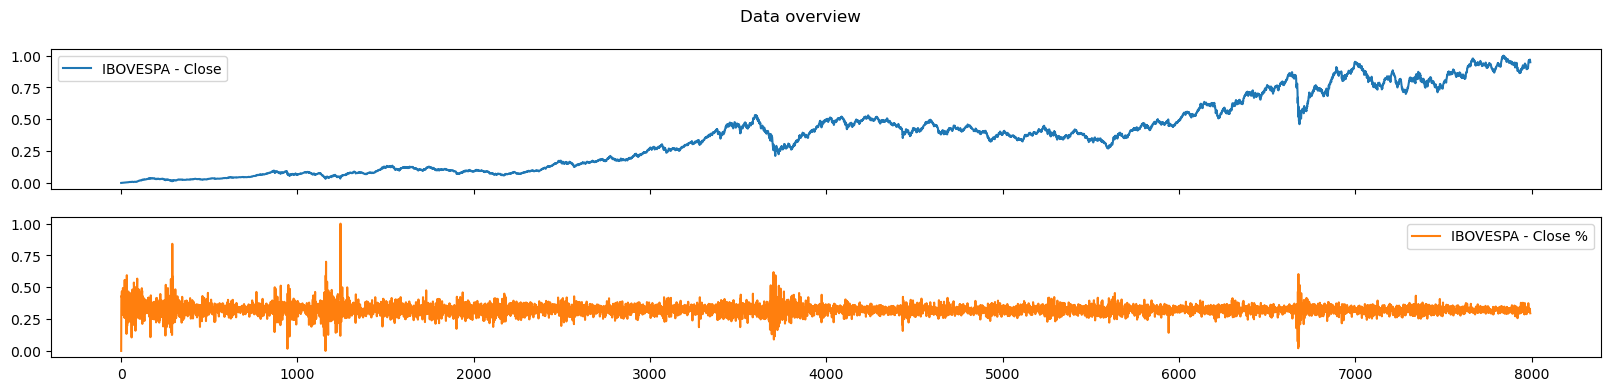

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

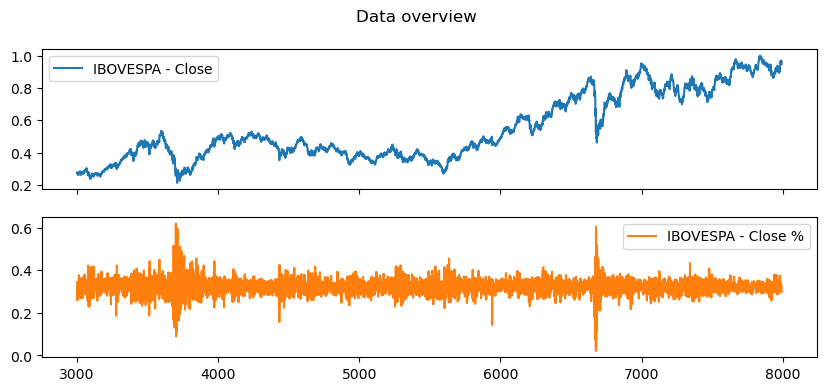

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

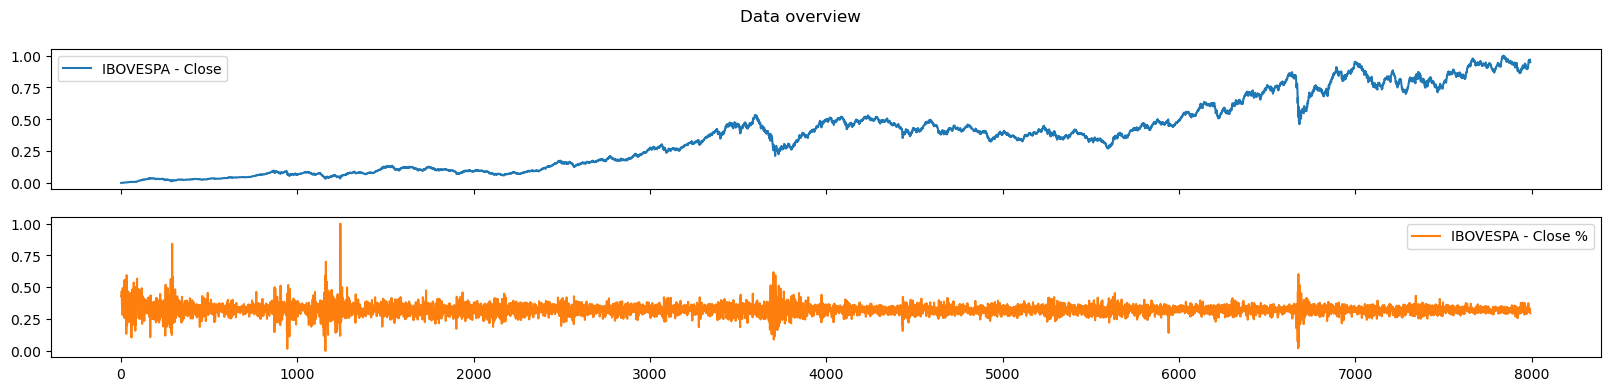

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

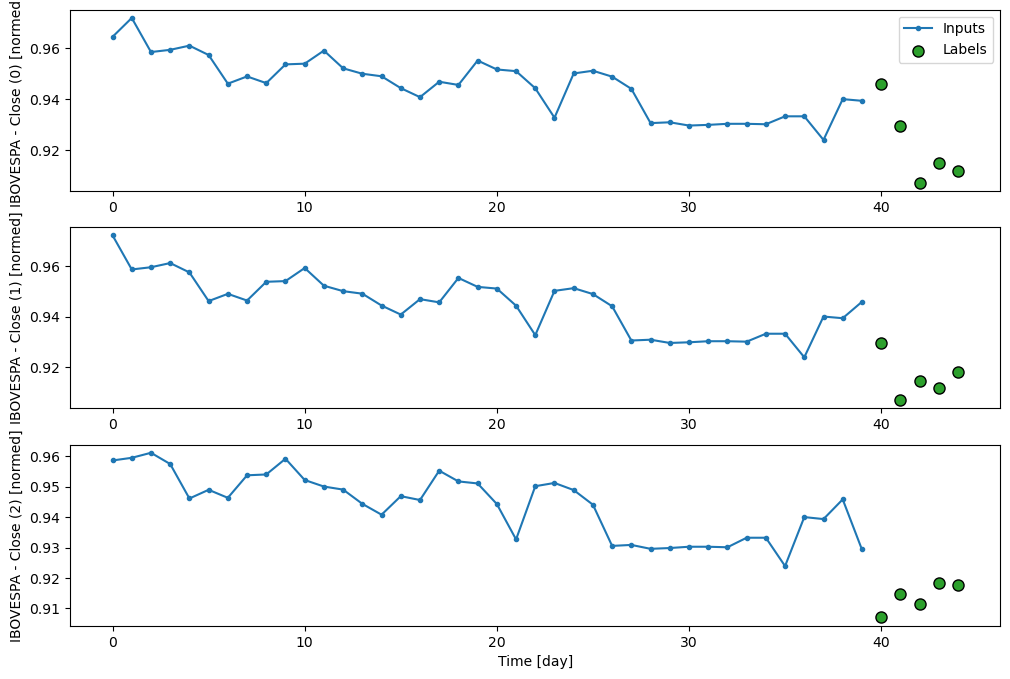

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18:15 5s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 96.6536 - mean_squared_error: 1.1759e-04 - root_mean_squared_error: 0.0104  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 90.9964 - mean_squared_error: 1.7995e-04 - root_mean_squared_error: 0.0128

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 82.9989 - mean_squared_error: 1.8822e-04 - root_mean_squared_error: 0.0133

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 79.8596 - mean_squared_error: 1.8726e-04 - root_mean_squared_error: 0.0133

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 74.3552 - mean_squared_error: 1.8136e-04 - root_mean_squared_error: 0.0132

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 69.4726 - mean_squared_error: 1.7317e-04 - root_mean_squared_error: 0.0129

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 65.1875 - mean_squared_error: 1.6466e-04 - root_mean_squared_error: 0.0126

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 61.7298 - mean_squared_error: 1.5784e-04 - root_mean_squared_error: 0.0123

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 58.8488 - mean_squared_error: 1.5203e-04 - root_mean_squared_error: 0.0121

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 56.2802 - mean_squared_error: 1.4656e-04 - root_mean_squared_error: 0.0119

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 53.9579 - mean_squared_error: 1.4136e-04 - root_mean_squared_error: 0.0116

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 51.9338 - mean_squared_error: 1.3757e-04 - root_mean_squared_error: 0.0115

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 50.2234 - mean_squared_error: 1.3708e-04 - root_mean_squared_error: 0.0115

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 48.7054 - mean_squared_error: 1.3797e-04 - root_mean_squared_error: 0.0115

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 47.4121 - mean_squared_error: 1.4102e-04 - root_mean_squared_error: 0.0117

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 46.2736 - mean_squared_error: 1.4493e-04 - root_mean_squared_error: 0.0118

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 45.1890 - mean_squared_error: 1.4779e-04 - root_mean_squared_error: 0.0120

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.2245 - mean_squared_error: 1.5047e-04 - root_mean_squared_error: 0.0121

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.3291 - mean_squared_error: 1.5261e-04 - root_mean_squared_error: 0.0122

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.5154 - mean_squared_error: 1.5496e-04 - root_mean_squared_error: 0.0123

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.7544 - mean_squared_error: 1.5715e-04 - root_mean_squared_error: 0.0124

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.0274 - mean_squared_error: 1.5888e-04 - root_mean_squared_error: 0.0124

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.3498 - mean_squared_error: 1.6122e-04 - root_mean_squared_error: 0.0125

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.7268 - mean_squared_error: 1.6491e-04 - root_mean_squared_error: 0.0127

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.1241 - mean_squared_error: 1.6805e-04 - root_mean_squared_error: 0.0128

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 38.5502 - mean_squared_error: 1.7100e-04 - root_mean_squared_error: 0.0129

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 38.0039 - mean_squared_error: 1.7377e-04 - root_mean_squared_error: 0.0130

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 37.4724 - mean_squared_error: 1.7610e-04 - root_mean_squared_error: 0.0131

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 36.9540 - mean_squared_error: 1.7800e-04 - root_mean_squared_error: 0.0131

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 36.4633 - mean_squared_error: 1.7977e-04 - root_mean_squared_error: 0.0132

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 35.9939 - mean_squared_error: 1.8135e-04 - root_mean_squared_error: 0.0133

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 35.5409 - mean_squared_error: 1.8270e-04 - root_mean_squared_error: 0.0133

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 35.1239 - mean_squared_error: 1.8429e-04 - root_mean_squared_error: 0.0134

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 34.7486 - mean_squared_error: 1.8627e-04 - root_mean_squared_error: 0.0135

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 34.3873 - mean_squared_error: 1.8805e-04 - root_mean_squared_error: 0.0135

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 34.0431 - mean_squared_error: 1.8980e-04 - root_mean_squared_error: 0.0136

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 33.7249 - mean_squared_error: 1.9208e-04 - root_mean_squared_error: 0.0137

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 33.4380 - mean_squared_error: 1.9634e-04 - root_mean_squared_error: 0.0138

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 33.1820 - mean_squared_error: 2.0395e-04 - root_mean_squared_error: 0.0140

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 32.9450 - mean_squared_error: 2.1265e-04 - root_mean_squared_error: 0.0143

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 32.7199 - mean_squared_error: 2.2188e-04 - root_mean_squared_error: 0.0145

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 32.5026 - mean_squared_error: 2.3147e-04 - root_mean_squared_error: 0.0148

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 32.2938 - mean_squared_error: 2.4114e-04 - root_mean_squared_error: 0.0150

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 32.0897 - mean_squared_error: 2.5053e-04 - root_mean_squared_error: 0.0152

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 31.8853 - mean_squared_error: 2.5923e-04 - root_mean_squared_error: 0.0155

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 31.6813 - mean_squared_error: 2.6732e-04 - root_mean_squared_error: 0.0157

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 31.4789 - mean_squared_error: 2.7500e-04 - root_mean_squared_error: 0.0159

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 31.2801 - mean_squared_error: 2.8263e-04 - root_mean_squared_error: 0.0161

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 31.0840 - mean_squared_error: 2.9004e-04 - root_mean_squared_error: 0.0163

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 30.8938 - mean_squared_error: 2.9811e-04 - root_mean_squared_error: 0.0165

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 30.7120 - mean_squared_error: 3.0793e-04 - root_mean_squared_error: 0.0167

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 30.5382 - mean_squared_error: 3.2005e-04 - root_mean_squared_error: 0.0170

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 30.3689 - mean_squared_error: 3.3314e-04 - root_mean_squared_error: 0.0172

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 30.2007 - mean_squared_error: 3.4580e-04 - root_mean_squared_error: 0.0175

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 30.0342 - mean_squared_error: 3.5818e-04 - root_mean_squared_error: 0.0178

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 29.8707 - mean_squared_error: 3.7113e-04 - root_mean_squared_error: 0.0181

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 29.7098 - mean_squared_error: 3.8429e-04 - root_mean_squared_error: 0.0183

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 29.5631 - mean_squared_error: 4.0291e-04 - root_mean_squared_error: 0.0187

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 29.4272 - mean_squared_error: 4.2445e-04 - root_mean_squared_error: 0.0190

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 29.2938 - mean_squared_error: 4.4563e-04 - root_mean_squared_error: 0.0194

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 29.1649 - mean_squared_error: 4.6792e-04 - root_mean_squared_error: 0.0198

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 29.0439 - mean_squared_error: 4.9635e-04 - root_mean_squared_error: 0.0202

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 28.9312 - mean_squared_error: 5.3278e-04 - root_mean_squared_error: 0.0208

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 28.8252 - mean_squared_error: 5.7475e-04 - root_mean_squared_error: 0.0213

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 28.7739 - mean_squared_error: 5.9635e-04 - root_mean_squared_error: 0.0216

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 28.6739 - mean_squared_error: 6.4049e-04 - root_mean_squared_error: 0.0222

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 28.5755 - mean_squared_error: 6.8426e-04 - root_mean_squared_error: 0.0227

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 28.4773 - mean_squared_error: 7.2652e-04 - root_mean_squared_error: 0.0233

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 28.3817 - mean_squared_error: 7.6870e-04 - root_mean_squared_error: 0.0238

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 28.2900 - mean_squared_error: 8.1157e-04 - root_mean_squared_error: 0.0244

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 28.1992 - mean_squared_error: 8.5325e-04 - root_mean_squared_error: 0.0249

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 28.1086 - mean_squared_error: 8.9361e-04 - root_mean_squared_error: 0.0254

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 28.0178 - mean_squared_error: 9.3246e-04 - root_mean_squared_error: 0.0259

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 27.9265 - mean_squared_error: 9.6973e-04 - root_mean_squared_error: 0.0263

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 27.8349 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0268    

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 27.7428 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0272

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 27.6520 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0277

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 27.5636 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0281

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 27.4757 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0285

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 27.3886 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0289

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 27.3015 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 27.2157 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0296

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 27.1308 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0300

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 27.0456 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0304

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 26.9607 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0307

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 26.8760 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0310

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 26.7926 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0313

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 26.7120 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0317

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 26.6314 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0320

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 26.5512 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 26.4725 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 26.3955 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0328

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 26.3201 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0331

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 26.2458 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 26.1732 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 26.1020 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0340

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 26.0320 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0343

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 25.9620 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0346

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 25.8919 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 25.8217 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0351

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 25.7514 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0354

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 25.6810 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0356

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 25.6102 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 25.5396 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 25.4721 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0364

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 25.4068 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0367

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 25.3420 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0370

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 25.2779 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 25.2147 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0375

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 25.1529 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0378

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 25.0917 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0381

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 25.0303 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 24.9689 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0387

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 24.9078 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0390

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 24.8469 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0393

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 24.7859 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0396

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 24.7248 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0398

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 24.6640 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0401

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 24.6038 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0404

237/237 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 24.5741 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405 - val_loss: 0.1443 - val_mean_absolute_error: 0.1443 - val_mean_absolute_percentage_error: 15.3594 - val_mean_squared_error: 0.0217 - val_root_mean_squared_error: 0.1471 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.7669 - mean_absolute_error: 0.7669 - mean_absolute_percentage_error: 10185.6152 - mean_squared_error: 0.5882 - root_mean_squared_error: 0.7669

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7658 - mean_absolute_error: 0.7658 - mean_absolute_percentage_error: 8497.8750 - mean_squared_error: 0.5865 - root_mean_squared_error: 0.7658  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7596 - mean_absolute_error: 0.7596 - mean_absolute_percentage_error: 7210.8486 - mean_squared_error: 0.5772 - root_mean_squared_error: 0.7597

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7506 - mean_absolute_error: 0.7506 - mean_absolute_percentage_error: 6384.3530 - mean_squared_error: 0.5643 - root_mean_squared_error: 0.7510

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7370 - mean_absolute_error: 0.7370 - mean_absolute_percentage_error: 5835.4004 - mean_squared_error: 0.5462 - root_mean_squared_error: 0.7385

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7854 - mean_absolute_error: 0.7854 - mean_absolute_percentage_error: 5673.1450 - mean_squared_error: 0.7641 - root_mean_squared_error: 0.8443

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8111 - mean_absolute_error: 0.8111 - mean_absolute_percentage_error: 5502.5771 - mean_squared_error: 0.9007 - root_mean_squared_error: 0.9121

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8212 - mean_absolute_error: 0.8212 - mean_absolute_percentage_error: 5323.8335 - mean_squared_error: 0.9748 - root_mean_squared_error: 0.9514

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8216 - mean_absolute_error: 0.8216 - mean_absolute_percentage_error: 5143.3994 - mean_squared_error: 1.0126 - root_mean_squared_error: 0.9734

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.8148 - mean_absolute_error: 0.8148 - mean_absolute_percentage_error: 4963.5444 - mean_squared_error: 1.0284 - root_mean_squared_error: 0.9844

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.8062 - mean_absolute_error: 0.8062 - mean_absolute_percentage_error: 4794.9521 - mean_squared_error: 1.0324 - root_mean_squared_error: 0.9892

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7953 - mean_absolute_error: 0.7953 - mean_absolute_percentage_error: 4634.6929 - mean_squared_error: 1.0279 - root_mean_squared_error: 0.9893

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7842 - mean_absolute_error: 0.7842 - mean_absolute_percentage_error: 4484.5757 - mean_squared_error: 1.0187 - root_mean_squared_error: 0.9866

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7721 - mean_absolute_error: 0.7721 - mean_absolute_percentage_error: 4342.6416 - mean_squared_error: 1.0061 - root_mean_squared_error: 0.9817

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7597 - mean_absolute_error: 0.7597 - mean_absolute_percentage_error: 4209.1519 - mean_squared_error: 0.9914 - root_mean_squared_error: 0.9754

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7470 - mean_absolute_error: 0.7470 - mean_absolute_percentage_error: 4083.5593 - mean_squared_error: 0.9754 - root_mean_squared_error: 0.9681

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7344 - mean_absolute_error: 0.7344 - mean_absolute_percentage_error: 3965.6318 - mean_squared_error: 0.9588 - root_mean_squared_error: 0.9602

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7216 - mean_absolute_error: 0.7216 - mean_absolute_percentage_error: 3854.2957 - mean_squared_error: 0.9418 - root_mean_squared_error: 0.9518

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7090 - mean_absolute_error: 0.7090 - mean_absolute_percentage_error: 3749.6904 - mean_squared_error: 0.9247 - root_mean_squared_error: 0.9431

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6965 - mean_absolute_error: 0.6965 - mean_absolute_percentage_error: 3650.9966 - mean_squared_error: 0.9077 - root_mean_squared_error: 0.9342

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6844 - mean_absolute_error: 0.6844 - mean_absolute_percentage_error: 3557.8564 - mean_squared_error: 0.8910 - root_mean_squared_error: 0.9253

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6727 - mean_absolute_error: 0.6727 - mean_absolute_percentage_error: 3469.8547 - mean_squared_error: 0.8746 - root_mean_squared_error: 0.9164

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6613 - mean_absolute_error: 0.6613 - mean_absolute_percentage_error: 3386.4675 - mean_squared_error: 0.8586 - root_mean_squared_error: 0.9076

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6501 - mean_absolute_error: 0.6501 - mean_absolute_percentage_error: 3307.3127 - mean_squared_error: 0.8430 - root_mean_squared_error: 0.8988

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6392 - mean_absolute_error: 0.6392 - mean_absolute_percentage_error: 3232.0945 - mean_squared_error: 0.8279 - root_mean_squared_error: 0.8902

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6286 - mean_absolute_error: 0.6286 - mean_absolute_percentage_error: 3160.5312 - mean_squared_error: 0.8132 - root_mean_squared_error: 0.8817

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6183 - mean_absolute_error: 0.6183 - mean_absolute_percentage_error: 3092.3767 - mean_squared_error: 0.7990 - root_mean_squared_error: 0.8734

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6084 - mean_absolute_error: 0.6084 - mean_absolute_percentage_error: 3027.3999 - mean_squared_error: 0.7853 - root_mean_squared_error: 0.8652

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5987 - mean_absolute_error: 0.5987 - mean_absolute_percentage_error: 2965.3843 - mean_squared_error: 0.7720 - root_mean_squared_error: 0.8572

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5893 - mean_absolute_error: 0.5893 - mean_absolute_percentage_error: 2906.1384 - mean_squared_error: 0.7591 - root_mean_squared_error: 0.8494

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5802 - mean_absolute_error: 0.5802 - mean_absolute_percentage_error: 2849.4802 - mean_squared_error: 0.7466 - root_mean_squared_error: 0.8417

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5713 - mean_absolute_error: 0.5713 - mean_absolute_percentage_error: 2795.2371 - mean_squared_error: 0.7346 - root_mean_squared_error: 0.8342

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5628 - mean_absolute_error: 0.5628 - mean_absolute_percentage_error: 2743.2620 - mean_squared_error: 0.7229 - root_mean_squared_error: 0.8269

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5545 - mean_absolute_error: 0.5545 - mean_absolute_percentage_error: 2693.4248 - mean_squared_error: 0.7116 - root_mean_squared_error: 0.8197

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5465 - mean_absolute_error: 0.5465 - mean_absolute_percentage_error: 2645.5916 - mean_squared_error: 0.7007 - root_mean_squared_error: 0.8127

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5387 - mean_absolute_error: 0.5387 - mean_absolute_percentage_error: 2599.6533 - mean_squared_error: 0.6901 - root_mean_squared_error: 0.8059

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5312 - mean_absolute_error: 0.5312 - mean_absolute_percentage_error: 2555.4856 - mean_squared_error: 0.6799 - root_mean_squared_error: 0.7992

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5238 - mean_absolute_error: 0.5238 - mean_absolute_percentage_error: 2512.9727 - mean_squared_error: 0.6700 - root_mean_squared_error: 0.7927

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5167 - mean_absolute_error: 0.5167 - mean_absolute_percentage_error: 2472.0186 - mean_squared_error: 0.6603 - root_mean_squared_error: 0.7864

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5098 - mean_absolute_error: 0.5098 - mean_absolute_percentage_error: 2432.5422 - mean_squared_error: 0.6510 - root_mean_squared_error: 0.7801

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5032 - mean_absolute_error: 0.5032 - mean_absolute_percentage_error: 2394.4719 - mean_squared_error: 0.6420 - root_mean_squared_error: 0.7741

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4967 - mean_absolute_error: 0.4967 - mean_absolute_percentage_error: 2357.7239 - mean_squared_error: 0.6332 - root_mean_squared_error: 0.7681

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4904 - mean_absolute_error: 0.4904 - mean_absolute_percentage_error: 2322.2266 - mean_squared_error: 0.6247 - root_mean_squared_error: 0.7623

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4843 - mean_absolute_error: 0.4843 - mean_absolute_percentage_error: 2287.9175 - mean_squared_error: 0.6164 - root_mean_squared_error: 0.7566

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4783 - mean_absolute_error: 0.4783 - mean_absolute_percentage_error: 2254.7329 - mean_squared_error: 0.6084 - root_mean_squared_error: 0.7511

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4725 - mean_absolute_error: 0.4725 - mean_absolute_percentage_error: 2222.6160 - mean_squared_error: 0.6006 - root_mean_squared_error: 0.7456

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4669 - mean_absolute_error: 0.4669 - mean_absolute_percentage_error: 2191.5151 - mean_squared_error: 0.5930 - root_mean_squared_error: 0.7403

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4614 - mean_absolute_error: 0.4614 - mean_absolute_percentage_error: 2161.3811 - mean_squared_error: 0.5857 - root_mean_squared_error: 0.7351

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4561 - mean_absolute_error: 0.4561 - mean_absolute_percentage_error: 2132.1692 - mean_squared_error: 0.5785 - root_mean_squared_error: 0.7300

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4509 - mean_absolute_error: 0.4509 - mean_absolute_percentage_error: 2103.8372 - mean_squared_error: 0.5715 - root_mean_squared_error: 0.7250

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4458 - mean_absolute_error: 0.4458 - mean_absolute_percentage_error: 2076.3413 - mean_squared_error: 0.5647 - root_mean_squared_error: 0.7201

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4409 - mean_absolute_error: 0.4409 - mean_absolute_percentage_error: 2049.6450 - mean_squared_error: 0.5581 - root_mean_squared_error: 0.7153

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4361 - mean_absolute_error: 0.4361 - mean_absolute_percentage_error: 2023.7158 - mean_squared_error: 0.5517 - root_mean_squared_error: 0.7106

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4315 - mean_absolute_error: 0.4315 - mean_absolute_percentage_error: 1998.5211 - mean_squared_error: 0.5454 - root_mean_squared_error: 0.7060

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4270 - mean_absolute_error: 0.4270 - mean_absolute_percentage_error: 1974.0295 - mean_squared_error: 0.5393 - root_mean_squared_error: 0.7015

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4226 - mean_absolute_error: 0.4226 - mean_absolute_percentage_error: 1950.2092 - mean_squared_error: 0.5333 - root_mean_squared_error: 0.6971

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4184 - mean_absolute_error: 0.4184 - mean_absolute_percentage_error: 1927.0314 - mean_squared_error: 0.5275 - root_mean_squared_error: 0.6928

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4142 - mean_absolute_error: 0.4142 - mean_absolute_percentage_error: 1904.4730 - mean_squared_error: 0.5218 - root_mean_squared_error: 0.6885

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4102 - mean_absolute_error: 0.4102 - mean_absolute_percentage_error: 1882.5214 - mean_squared_error: 0.5163 - root_mean_squared_error: 0.6844

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4064 - mean_absolute_error: 0.4064 - mean_absolute_percentage_error: 1861.1476 - mean_squared_error: 0.5109 - root_mean_squared_error: 0.6803

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4026 - mean_absolute_error: 0.4026 - mean_absolute_percentage_error: 1840.3198 - mean_squared_error: 0.5056 - root_mean_squared_error: 0.6763

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3989 - mean_absolute_error: 0.3989 - mean_absolute_percentage_error: 1820.0125 - mean_squared_error: 0.5005 - root_mean_squared_error: 0.6724

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3953 - mean_absolute_error: 0.3953 - mean_absolute_percentage_error: 1800.2056 - mean_squared_error: 0.4955 - root_mean_squared_error: 0.6685

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3918 - mean_absolute_error: 0.3918 - mean_absolute_percentage_error: 1780.8811 - mean_squared_error: 0.4905 - root_mean_squared_error: 0.6647

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3884 - mean_absolute_error: 0.3884 - mean_absolute_percentage_error: 1762.0197 - mean_squared_error: 0.4857 - root_mean_squared_error: 0.6610

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3850 - mean_absolute_error: 0.3850 - mean_absolute_percentage_error: 1743.6042 - mean_squared_error: 0.4810 - root_mean_squared_error: 0.6574

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3818 - mean_absolute_error: 0.3818 - mean_absolute_percentage_error: 1725.6184 - mean_squared_error: 0.4764 - root_mean_squared_error: 0.6538

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3786 - mean_absolute_error: 0.3786 - mean_absolute_percentage_error: 1708.0455 - mean_squared_error: 0.4719 - root_mean_squared_error: 0.6502

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3754 - mean_absolute_error: 0.3754 - mean_absolute_percentage_error: 1690.8724 - mean_squared_error: 0.4675 - root_mean_squared_error: 0.6468

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3723 - mean_absolute_error: 0.3723 - mean_absolute_percentage_error: 1674.0883 - mean_squared_error: 0.4632 - root_mean_squared_error: 0.6434

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3693 - mean_absolute_error: 0.3693 - mean_absolute_percentage_error: 1657.6790 - mean_squared_error: 0.4590 - root_mean_squared_error: 0.6400

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3664 - mean_absolute_error: 0.3664 - mean_absolute_percentage_error: 1641.6287 - mean_squared_error: 0.4549 - root_mean_squared_error: 0.6367

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3635 - mean_absolute_error: 0.3635 - mean_absolute_percentage_error: 1625.9258 - mean_squared_error: 0.4508 - root_mean_squared_error: 0.6335

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3607 - mean_absolute_error: 0.3607 - mean_absolute_percentage_error: 1610.5581 - mean_squared_error: 0.4468 - root_mean_squared_error: 0.6303

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3579 - mean_absolute_error: 0.3579 - mean_absolute_percentage_error: 1595.5139 - mean_squared_error: 0.4430 - root_mean_squared_error: 0.6271

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3552 - mean_absolute_error: 0.3552 - mean_absolute_percentage_error: 1580.7832 - mean_squared_error: 0.4391 - root_mean_squared_error: 0.6240

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3525 - mean_absolute_error: 0.3525 - mean_absolute_percentage_error: 1566.3556 - mean_squared_error: 0.4354 - root_mean_squared_error: 0.6210

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 1552.2224 - mean_squared_error: 0.4317 - root_mean_squared_error: 0.6180

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3473 - mean_absolute_error: 0.3473 - mean_absolute_percentage_error: 1538.3729 - mean_squared_error: 0.4281 - root_mean_squared_error: 0.6150

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3448 - mean_absolute_error: 0.3448 - mean_absolute_percentage_error: 1524.7987 - mean_squared_error: 0.4246 - root_mean_squared_error: 0.6121

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3423 - mean_absolute_error: 0.3423 - mean_absolute_percentage_error: 1511.4919 - mean_squared_error: 0.4211 - root_mean_squared_error: 0.6092

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3398 - mean_absolute_error: 0.3398 - mean_absolute_percentage_error: 1498.4447 - mean_squared_error: 0.4177 - root_mean_squared_error: 0.6064

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3374 - mean_absolute_error: 0.3374 - mean_absolute_percentage_error: 1485.6486 - mean_squared_error: 0.4144 - root_mean_squared_error: 0.6036

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3351 - mean_absolute_error: 0.3351 - mean_absolute_percentage_error: 1473.0963 - mean_squared_error: 0.4111 - root_mean_squared_error: 0.6009

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3327 - mean_absolute_error: 0.3327 - mean_absolute_percentage_error: 1460.7803 - mean_squared_error: 0.4078 - root_mean_squared_error: 0.5982

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3305 - mean_absolute_error: 0.3305 - mean_absolute_percentage_error: 1448.6940 - mean_squared_error: 0.4047 - root_mean_squared_error: 0.5955

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3282 - mean_absolute_error: 0.3282 - mean_absolute_percentage_error: 1436.8315 - mean_squared_error: 0.4015 - root_mean_squared_error: 0.5928

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 1425.1876 - mean_squared_error: 0.3985 - root_mean_squared_error: 0.5902

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3238 - mean_absolute_error: 0.3238 - mean_absolute_percentage_error: 1413.7542 - mean_squared_error: 0.3955 - root_mean_squared_error: 0.5877

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3217 - mean_absolute_error: 0.3217 - mean_absolute_percentage_error: 1402.5258 - mean_squared_error: 0.3925 - root_mean_squared_error: 0.5852

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1391.4980 - mean_squared_error: 0.3896 - root_mean_squared_error: 0.5827

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 1380.6654 - mean_squared_error: 0.3867 - root_mean_squared_error: 0.5802

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 1370.0226 - mean_squared_error: 0.3839 - root_mean_squared_error: 0.5778

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 1359.5642 - mean_squared_error: 0.3812 - root_mean_squared_error: 0.5754

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 1349.2856 - mean_squared_error: 0.3785 - root_mean_squared_error: 0.5730

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3098 - mean_absolute_error: 0.3098 - mean_absolute_percentage_error: 1339.1824 - mean_squared_error: 0.3758 - root_mean_squared_error: 0.5707

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1329.2498 - mean_squared_error: 0.3732 - root_mean_squared_error: 0.5684

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 1319.4819 - mean_squared_error: 0.3706 - root_mean_squared_error: 0.5662

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3043 - mean_absolute_error: 0.3043 - mean_absolute_percentage_error: 1309.8748 - mean_squared_error: 0.3680 - root_mean_squared_error: 0.5639

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1300.4243 - mean_squared_error: 0.3655 - root_mean_squared_error: 0.5617

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 1291.1267 - mean_squared_error: 0.3630 - root_mean_squared_error: 0.5595

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2992 - mean_absolute_error: 0.2992 - mean_absolute_percentage_error: 1281.9778 - mean_squared_error: 0.3606 - root_mean_squared_error: 0.5574

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2975 - mean_absolute_error: 0.2975 - mean_absolute_percentage_error: 1272.9736 - mean_squared_error: 0.3582 - root_mean_squared_error: 0.5553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1264.1106 - mean_squared_error: 0.3559 - root_mean_squared_error: 0.5532

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1255.3876 - mean_squared_error: 0.3536 - root_mean_squared_error: 0.5511

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2927 - mean_absolute_error: 0.2927 - mean_absolute_percentage_error: 1246.8007 - mean_squared_error: 0.3513 - root_mean_squared_error: 0.5491

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2912 - mean_absolute_error: 0.2912 - mean_absolute_percentage_error: 1238.3457 - mean_squared_error: 0.3490 - root_mean_squared_error: 0.5470

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1230.0187 - mean_squared_error: 0.3468 - root_mean_squared_error: 0.5451

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 1221.8162 - mean_squared_error: 0.3446 - root_mean_squared_error: 0.5431

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2867 - mean_absolute_error: 0.2867 - mean_absolute_percentage_error: 1213.7356 - mean_squared_error: 0.3425 - root_mean_squared_error: 0.5411

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2852 - mean_absolute_error: 0.2852 - mean_absolute_percentage_error: 1205.7740 - mean_squared_error: 0.3404 - root_mean_squared_error: 0.5392

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 1197.9292 - mean_squared_error: 0.3383 - root_mean_squared_error: 0.5373

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2824 - mean_absolute_error: 0.2824 - mean_absolute_percentage_error: 1190.1979 - mean_squared_error: 0.3362 - root_mean_squared_error: 0.5354

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 1182.5779 - mean_squared_error: 0.3342 - root_mean_squared_error: 0.5336

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1175.0664 - mean_squared_error: 0.3322 - root_mean_squared_error: 0.5318

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2783 - mean_absolute_error: 0.2783 - mean_absolute_percentage_error: 1167.6610 - mean_squared_error: 0.3302 - root_mean_squared_error: 0.5299

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1160.3595 - mean_squared_error: 0.3282 - root_mean_squared_error: 0.5281

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2756 - mean_absolute_error: 0.2756 - mean_absolute_percentage_error: 1153.1595 - mean_squared_error: 0.3263 - root_mean_squared_error: 0.5264

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1146.0638 - mean_squared_error: 0.3244 - root_mean_squared_error: 0.5246

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2736 - mean_absolute_error: 0.2736 - mean_absolute_percentage_error: 1142.5602 - mean_squared_error: 0.3235 - root_mean_squared_error: 0.5237 - val_loss: 0.1404 - val_mean_absolute_error: 0.1404 - val_mean_absolute_percentage_error: 14.9356 - val_mean_squared_error: 0.0205 - val_root_mean_squared_error: 0.1432 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.6970 - mean_absolute_error: 0.6970 - mean_absolute_percentage_error: 9260.4766 - mean_squared_error: 0.4865 - root_mean_squared_error: 0.6975

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6742 - mean_absolute_error: 0.6742 - mean_absolute_percentage_error: 7588.9824 - mean_squared_error: 0.4568 - root_mean_squared_error: 0.6755 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.6525 - mean_absolute_error: 0.6525 - mean_absolute_percentage_error: 6367.5068 - mean_squared_error: 0.4294 - root_mean_squared_error: 0.6546

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.6340 - mean_absolute_error: 0.6340 - mean_absolute_percentage_error: 5587.5068 - mean_squared_error: 0.4074 - root_mean_squared_error: 0.6371

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.6146 - mean_absolute_error: 0.6146 - mean_absolute_percentage_error: 5064.1318 - mean_squared_error: 0.3859 - root_mean_squared_error: 0.6194

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.5921 - mean_absolute_error: 0.5921 - mean_absolute_percentage_error: 4655.5425 - mean_squared_error: 0.3641 - root_mean_squared_error: 0.6005

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.5661 - mean_absolute_error: 0.5661 - mean_absolute_percentage_error: 4309.1597 - mean_squared_error: 0.3426 - root_mean_squared_error: 0.5810

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.5440 - mean_absolute_error: 0.5440 - mean_absolute_percentage_error: 4026.0676 - mean_squared_error: 0.3246 - root_mean_squared_error: 0.5643

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5303 - mean_absolute_error: 0.5303 - mean_absolute_percentage_error: 3804.9336 - mean_squared_error: 0.3136 - root_mean_squared_error: 0.5545

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5209 - mean_absolute_error: 0.5209 - mean_absolute_percentage_error: 3621.9946 - mean_squared_error: 0.3059 - root_mean_squared_error: 0.5477

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5115 - mean_absolute_error: 0.5115 - mean_absolute_percentage_error: 3459.8657 - mean_squared_error: 0.2980 - root_mean_squared_error: 0.5405

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5020 - mean_absolute_error: 0.5020 - mean_absolute_percentage_error: 3314.2534 - mean_squared_error: 0.2902 - root_mean_squared_error: 0.5332

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4925 - mean_absolute_error: 0.4925 - mean_absolute_percentage_error: 3182.0105 - mean_squared_error: 0.2825 - root_mean_squared_error: 0.5257

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4829 - mean_absolute_error: 0.4829 - mean_absolute_percentage_error: 3060.7678 - mean_squared_error: 0.2749 - root_mean_squared_error: 0.5182

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4733 - mean_absolute_error: 0.4733 - mean_absolute_percentage_error: 2949.3020 - mean_squared_error: 0.2675 - root_mean_squared_error: 0.5107

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4637 - mean_absolute_error: 0.4637 - mean_absolute_percentage_error: 2846.5244 - mean_squared_error: 0.2604 - root_mean_squared_error: 0.5034

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4543 - mean_absolute_error: 0.4543 - mean_absolute_percentage_error: 2751.4414 - mean_squared_error: 0.2536 - root_mean_squared_error: 0.4962

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4451 - mean_absolute_error: 0.4451 - mean_absolute_percentage_error: 2663.1772 - mean_squared_error: 0.2471 - root_mean_squared_error: 0.4892

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4362 - mean_absolute_error: 0.4362 - mean_absolute_percentage_error: 2581.1655 - mean_squared_error: 0.2409 - root_mean_squared_error: 0.4824

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4275 - mean_absolute_error: 0.4275 - mean_absolute_percentage_error: 2504.6362 - mean_squared_error: 0.2350 - root_mean_squared_error: 0.4758

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4191 - mean_absolute_error: 0.4191 - mean_absolute_percentage_error: 2433.0205 - mean_squared_error: 0.2293 - root_mean_squared_error: 0.4695

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4109 - mean_absolute_error: 0.4109 - mean_absolute_percentage_error: 2365.8708 - mean_squared_error: 0.2239 - root_mean_squared_error: 0.4633

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4030 - mean_absolute_error: 0.4030 - mean_absolute_percentage_error: 2302.7749 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4573

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.3955 - mean_absolute_error: 0.3955 - mean_absolute_percentage_error: 2243.3909 - mean_squared_error: 0.2139 - root_mean_squared_error: 0.4516

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3883 - mean_absolute_error: 0.3883 - mean_absolute_percentage_error: 2187.3667 - mean_squared_error: 0.2093 - root_mean_squared_error: 0.4461

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3813 - mean_absolute_error: 0.3813 - mean_absolute_percentage_error: 2134.4304 - mean_squared_error: 0.2048 - root_mean_squared_error: 0.4407

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3746 - mean_absolute_error: 0.3746 - mean_absolute_percentage_error: 2084.3257 - mean_squared_error: 0.2006 - root_mean_squared_error: 0.4355

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3682 - mean_absolute_error: 0.3682 - mean_absolute_percentage_error: 2036.8240 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4305

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3619 - mean_absolute_error: 0.3619 - mean_absolute_percentage_error: 1991.7085 - mean_squared_error: 0.1926 - root_mean_squared_error: 0.4257

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1948.7983 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4210

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3502 - mean_absolute_error: 0.3502 - mean_absolute_percentage_error: 1907.9454 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4165

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3446 - mean_absolute_error: 0.3446 - mean_absolute_percentage_error: 1869.0045 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.4121

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3392 - mean_absolute_error: 0.3392 - mean_absolute_percentage_error: 1831.8417 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.4079

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3341 - mean_absolute_error: 0.3341 - mean_absolute_percentage_error: 1796.3413 - mean_squared_error: 0.1755 - root_mean_squared_error: 0.4038

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3291 - mean_absolute_error: 0.3291 - mean_absolute_percentage_error: 1762.3926 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3998

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3243 - mean_absolute_error: 0.3243 - mean_absolute_percentage_error: 1729.8916 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.3959

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1698.7246 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3922

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3151 - mean_absolute_error: 0.3151 - mean_absolute_percentage_error: 1668.8105 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3885

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 1640.0698 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3850

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 1612.4283 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3816

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 1585.8243 - mean_squared_error: 0.1565 - root_mean_squared_error: 0.3782

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1560.1965 - mean_squared_error: 0.1541 - root_mean_squared_error: 0.3749

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2947 - mean_absolute_error: 0.2947 - mean_absolute_percentage_error: 1535.4904 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3718

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2910 - mean_absolute_error: 0.2910 - mean_absolute_percentage_error: 1511.6536 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3687

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1488.6422 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3657

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1466.4092 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3627

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2805 - mean_absolute_error: 0.2805 - mean_absolute_percentage_error: 1444.9163 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3599

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2772 - mean_absolute_error: 0.2772 - mean_absolute_percentage_error: 1424.1257 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3571

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2740 - mean_absolute_error: 0.2740 - mean_absolute_percentage_error: 1404.0009 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3543

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2708 - mean_absolute_error: 0.2708 - mean_absolute_percentage_error: 1384.5094 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3517

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1365.6185 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3491

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1347.2998 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3465

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2620 - mean_absolute_error: 0.2620 - mean_absolute_percentage_error: 1329.5264 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3441

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1312.2740 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3416

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1295.5193 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3393

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 1279.2394 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3369

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2512 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 1263.4142 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3347

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2487 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 1248.0309 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3324

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 1233.0779 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3303

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1218.5297 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3282

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1204.3652 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3261

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2395 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 1190.5731 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3241

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1177.1400 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3221

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1164.0505 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3202

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2333 - mean_absolute_error: 0.2333 - mean_absolute_percentage_error: 1151.2878 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3184

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1138.8375 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3165

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1126.6864 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3147

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1114.8246 - mean_squared_error: 0.1125 - root_mean_squared_error: 0.3130

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1103.2434 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.3112

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 1091.9351 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.3095

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1080.8877 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.3079

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 1070.0891 - mean_squared_error: 0.1083 - root_mean_squared_error: 0.3063

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 1059.5310 - mean_squared_error: 0.1073 - root_mean_squared_error: 0.3047

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1049.2046 - mean_squared_error: 0.1063 - root_mean_squared_error: 0.3031

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 1039.1019 - mean_squared_error: 0.1053 - root_mean_squared_error: 0.3015

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 1029.2153 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.3000

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 1019.5384 - mean_squared_error: 0.1035 - root_mean_squared_error: 0.2985

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 1010.0648 - mean_squared_error: 0.1026 - root_mean_squared_error: 0.2970

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 1000.7869 - mean_squared_error: 0.1017 - root_mean_squared_error: 0.2956

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 991.6981 - mean_squared_error: 0.1008 - root_mean_squared_error: 0.2941 

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 982.7936 - mean_squared_error: 0.1000 - root_mean_squared_error: 0.2927

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 974.0685 - mean_squared_error: 0.0992 - root_mean_squared_error: 0.2913

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2044 - mean_absolute_error: 0.2044 - mean_absolute_percentage_error: 965.5164 - mean_squared_error: 0.0983 - root_mean_squared_error: 0.2900

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 957.1319 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.2886

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2017 - mean_absolute_error: 0.2017 - mean_absolute_percentage_error: 948.9091 - mean_squared_error: 0.0968 - root_mean_squared_error: 0.2873

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2004 - mean_absolute_error: 0.2004 - mean_absolute_percentage_error: 940.8440 - mean_squared_error: 0.0960 - root_mean_squared_error: 0.2860

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 932.9321 - mean_squared_error: 0.0952 - root_mean_squared_error: 0.2847

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 925.1693 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.2834

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 917.5518 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2822

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1955 - mean_absolute_error: 0.1955 - mean_absolute_percentage_error: 910.0764 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.2810

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 902.7394 - mean_squared_error: 0.0923 - root_mean_squared_error: 0.2797

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1932 - mean_absolute_error: 0.1932 - mean_absolute_percentage_error: 895.5361 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2786

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1921 - mean_absolute_error: 0.1921 - mean_absolute_percentage_error: 888.4620 - mean_squared_error: 0.0910 - root_mean_squared_error: 0.2774

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 881.5123 - mean_squared_error: 0.0903 - root_mean_squared_error: 0.2762

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1900 - mean_absolute_error: 0.1900 - mean_absolute_percentage_error: 874.6837 - mean_squared_error: 0.0897 - root_mean_squared_error: 0.2751

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 867.9727 - mean_squared_error: 0.0890 - root_mean_squared_error: 0.2740

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1879 - mean_absolute_error: 0.1879 - mean_absolute_percentage_error: 861.3764 - mean_squared_error: 0.0884 - root_mean_squared_error: 0.2729

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 854.8919 - mean_squared_error: 0.0878 - root_mean_squared_error: 0.2718

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1858 - mean_absolute_error: 0.1858 - mean_absolute_percentage_error: 848.5159 - mean_squared_error: 0.0871 - root_mean_squared_error: 0.2707

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 842.2456 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2697

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 836.0784 - mean_squared_error: 0.0859 - root_mean_squared_error: 0.2686

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1829 - mean_absolute_error: 0.1829 - mean_absolute_percentage_error: 830.0118 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2676

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1819 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 824.0433 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2665

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1810 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 818.1705 - mean_squared_error: 0.0842 - root_mean_squared_error: 0.2655

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1801 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 812.3929 - mean_squared_error: 0.0837 - root_mean_squared_error: 0.2646

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1792 - mean_absolute_error: 0.1792 - mean_absolute_percentage_error: 806.7074 - mean_squared_error: 0.0831 - root_mean_squared_error: 0.2636

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 801.1109 - mean_squared_error: 0.0826 - root_mean_squared_error: 0.2626

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1775 - mean_absolute_error: 0.1775 - mean_absolute_percentage_error: 795.6008 - mean_squared_error: 0.0821 - root_mean_squared_error: 0.2617

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 790.1750 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2607

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1758 - mean_absolute_error: 0.1758 - mean_absolute_percentage_error: 784.8317 - mean_squared_error: 0.0810 - root_mean_squared_error: 0.2598

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 779.5688 - mean_squared_error: 0.0805 - root_mean_squared_error: 0.2589

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1742 - mean_absolute_error: 0.1742 - mean_absolute_percentage_error: 774.3848 - mean_squared_error: 0.0800 - root_mean_squared_error: 0.2580

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 769.2774 - mean_squared_error: 0.0795 - root_mean_squared_error: 0.2571

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1727 - mean_absolute_error: 0.1727 - mean_absolute_percentage_error: 764.2452 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2563

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1719 - mean_absolute_error: 0.1719 - mean_absolute_percentage_error: 759.2861 - mean_squared_error: 0.0786 - root_mean_squared_error: 0.2554

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1711 - mean_absolute_error: 0.1711 - mean_absolute_percentage_error: 754.3983 - mean_squared_error: 0.0781 - root_mean_squared_error: 0.2545

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 749.5803 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2537

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1697 - mean_absolute_error: 0.1697 - mean_absolute_percentage_error: 744.8307 - mean_squared_error: 0.0772 - root_mean_squared_error: 0.2528

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 740.1510 - mean_squared_error: 0.0768 - root_mean_squared_error: 0.2520

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1686 - mean_absolute_error: 0.1686 - mean_absolute_percentage_error: 737.8403 - mean_squared_error: 0.0765 - root_mean_squared_error: 0.2516 - val_loss: 0.1560 - val_mean_absolute_error: 0.1560 - val_mean_absolute_percentage_error: 16.6119 - val_mean_squared_error: 0.0251 - val_root_mean_squared_error: 0.1585 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.7083 - mean_absolute_error: 0.7083 - mean_absolute_percentage_error: 9404.5703 - mean_squared_error: 0.5017 - root_mean_squared_error: 0.7083

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7044 - mean_absolute_error: 0.7044 - mean_absolute_percentage_error: 7826.2446 - mean_squared_error: 0.4963 - root_mean_squared_error: 0.7045 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6973 - mean_absolute_error: 0.6973 - mean_absolute_percentage_error: 6634.0547 - mean_squared_error: 0.4866 - root_mean_squared_error: 0.6975

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6885 - mean_absolute_error: 0.6885 - mean_absolute_percentage_error: 5870.2617 - mean_squared_error: 0.4749 - root_mean_squared_error: 0.6889

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6725 - mean_absolute_error: 0.6725 - mean_absolute_percentage_error: 5347.8193 - mean_squared_error: 0.4569 - root_mean_squared_error: 0.6753

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6552 - mean_absolute_error: 0.6552 - mean_absolute_percentage_error: 4950.7832 - mean_squared_error: 0.4386 - root_mean_squared_error: 0.6610

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6390 - mean_absolute_error: 0.6390 - mean_absolute_percentage_error: 4632.8525 - mean_squared_error: 0.4215 - root_mean_squared_error: 0.6473

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6267 - mean_absolute_error: 0.6267 - mean_absolute_percentage_error: 4379.6797 - mean_squared_error: 0.4080 - root_mean_squared_error: 0.6365

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6161 - mean_absolute_error: 0.6161 - mean_absolute_percentage_error: 4166.3315 - mean_squared_error: 0.3961 - root_mean_squared_error: 0.6268

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6039 - mean_absolute_error: 0.6039 - mean_absolute_percentage_error: 3974.8291 - mean_squared_error: 0.3840 - root_mean_squared_error: 0.6166

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5925 - mean_absolute_error: 0.5925 - mean_absolute_percentage_error: 3805.1074 - mean_squared_error: 0.3727 - root_mean_squared_error: 0.6069

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5823 - mean_absolute_error: 0.5823 - mean_absolute_percentage_error: 3653.5559 - mean_squared_error: 0.3632 - root_mean_squared_error: 0.5988

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5724 - mean_absolute_error: 0.5724 - mean_absolute_percentage_error: 3515.8025 - mean_squared_error: 0.3550 - root_mean_squared_error: 0.5918

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5621 - mean_absolute_error: 0.5621 - mean_absolute_percentage_error: 3388.3835 - mean_squared_error: 0.3467 - root_mean_squared_error: 0.5844

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5515 - mean_absolute_error: 0.5515 - mean_absolute_percentage_error: 3270.4189 - mean_squared_error: 0.3383 - root_mean_squared_error: 0.5768

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5407 - mean_absolute_error: 0.5407 - mean_absolute_percentage_error: 3160.8992 - mean_squared_error: 0.3301 - root_mean_squared_error: 0.5693

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5302 - mean_absolute_error: 0.5302 - mean_absolute_percentage_error: 3059.1917 - mean_squared_error: 0.3222 - root_mean_squared_error: 0.5618

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5198 - mean_absolute_error: 0.5198 - mean_absolute_percentage_error: 2964.4548 - mean_squared_error: 0.3145 - root_mean_squared_error: 0.5544

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5097 - mean_absolute_error: 0.5097 - mean_absolute_percentage_error: 2876.1663 - mean_squared_error: 0.3070 - root_mean_squared_error: 0.5472

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4998 - mean_absolute_error: 0.4998 - mean_absolute_percentage_error: 2793.5640 - mean_squared_error: 0.2999 - root_mean_squared_error: 0.5402

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4902 - mean_absolute_error: 0.4902 - mean_absolute_percentage_error: 2716.1040 - mean_squared_error: 0.2931 - root_mean_squared_error: 0.5333

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4809 - mean_absolute_error: 0.4809 - mean_absolute_percentage_error: 2643.2563 - mean_squared_error: 0.2866 - root_mean_squared_error: 0.5267

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4719 - mean_absolute_error: 0.4719 - mean_absolute_percentage_error: 2574.6323 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.5202

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4631 - mean_absolute_error: 0.4631 - mean_absolute_percentage_error: 2509.8738 - mean_squared_error: 0.2743 - root_mean_squared_error: 0.5140

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4548 - mean_absolute_error: 0.4548 - mean_absolute_percentage_error: 2448.7078 - mean_squared_error: 0.2686 - root_mean_squared_error: 0.5080

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4467 - mean_absolute_error: 0.4467 - mean_absolute_percentage_error: 2390.8152 - mean_squared_error: 0.2631 - root_mean_squared_error: 0.5021

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4389 - mean_absolute_error: 0.4389 - mean_absolute_percentage_error: 2335.9202 - mean_squared_error: 0.2578 - root_mean_squared_error: 0.4964

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4314 - mean_absolute_error: 0.4314 - mean_absolute_percentage_error: 2283.7861 - mean_squared_error: 0.2528 - root_mean_squared_error: 0.4909

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4241 - mean_absolute_error: 0.4241 - mean_absolute_percentage_error: 2234.2000 - mean_squared_error: 0.2479 - root_mean_squared_error: 0.4856

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4171 - mean_absolute_error: 0.4171 - mean_absolute_percentage_error: 2186.9817 - mean_squared_error: 0.2433 - root_mean_squared_error: 0.4804

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4104 - mean_absolute_error: 0.4104 - mean_absolute_percentage_error: 2141.9702 - mean_squared_error: 0.2388 - root_mean_squared_error: 0.4754

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4038 - mean_absolute_error: 0.4038 - mean_absolute_percentage_error: 2099.0005 - mean_squared_error: 0.2346 - root_mean_squared_error: 0.4706

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3975 - mean_absolute_error: 0.3975 - mean_absolute_percentage_error: 2057.9312 - mean_squared_error: 0.2304 - root_mean_squared_error: 0.4659

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3913 - mean_absolute_error: 0.3913 - mean_absolute_percentage_error: 2018.6437 - mean_squared_error: 0.2265 - root_mean_squared_error: 0.4613

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3854 - mean_absolute_error: 0.3854 - mean_absolute_percentage_error: 1981.0155 - mean_squared_error: 0.2227 - root_mean_squared_error: 0.4568

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3797 - mean_absolute_error: 0.3797 - mean_absolute_percentage_error: 1944.9427 - mean_squared_error: 0.2190 - root_mean_squared_error: 0.4525

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3742 - mean_absolute_error: 0.3742 - mean_absolute_percentage_error: 1910.3351 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4483

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3688 - mean_absolute_error: 0.3688 - mean_absolute_percentage_error: 1877.0902 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4442

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3636 - mean_absolute_error: 0.3636 - mean_absolute_percentage_error: 1845.1260 - mean_squared_error: 0.2087 - root_mean_squared_error: 0.4403

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3586 - mean_absolute_error: 0.3586 - mean_absolute_percentage_error: 1814.3683 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4364

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3537 - mean_absolute_error: 0.3537 - mean_absolute_percentage_error: 1784.7509 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4327

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3490 - mean_absolute_error: 0.3490 - mean_absolute_percentage_error: 1756.2107 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4290

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3444 - mean_absolute_error: 0.3444 - mean_absolute_percentage_error: 1728.6847 - mean_squared_error: 0.1966 - root_mean_squared_error: 0.4254

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 1702.1178 - mean_squared_error: 0.1938 - root_mean_squared_error: 0.4220

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3357 - mean_absolute_error: 0.3357 - mean_absolute_percentage_error: 1676.4587 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4186

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3315 - mean_absolute_error: 0.3315 - mean_absolute_percentage_error: 1651.6595 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.4153

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 1627.6740 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.4120

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3235 - mean_absolute_error: 0.3235 - mean_absolute_percentage_error: 1604.4625 - mean_squared_error: 0.1835 - root_mean_squared_error: 0.4089

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1581.9873 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.4058

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3159 - mean_absolute_error: 0.3159 - mean_absolute_percentage_error: 1560.2119 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.4028

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3123 - mean_absolute_error: 0.3123 - mean_absolute_percentage_error: 1539.1019 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3999

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3087 - mean_absolute_error: 0.3087 - mean_absolute_percentage_error: 1518.6263 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3970

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3053 - mean_absolute_error: 0.3053 - mean_absolute_percentage_error: 1498.7561 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3942

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3020 - mean_absolute_error: 0.3020 - mean_absolute_percentage_error: 1479.4642 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3915

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2987 - mean_absolute_error: 0.2987 - mean_absolute_percentage_error: 1460.7241 - mean_squared_error: 0.1681 - root_mean_squared_error: 0.3888

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1442.5118 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3861

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1424.8049 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.3836

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2894 - mean_absolute_error: 0.2894 - mean_absolute_percentage_error: 1407.5818 - mean_squared_error: 0.1623 - root_mean_squared_error: 0.3810

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2865 - mean_absolute_error: 0.2865 - mean_absolute_percentage_error: 1390.8223 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3786

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1374.5071 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3762

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1358.6180 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3738

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2781 - mean_absolute_error: 0.2781 - mean_absolute_percentage_error: 1343.1370 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3715

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1328.0475 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3692

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1313.3342 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3670

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2703 - mean_absolute_error: 0.2703 - mean_absolute_percentage_error: 1298.9835 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3648

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1284.9810 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3626

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2654 - mean_absolute_error: 0.2654 - mean_absolute_percentage_error: 1271.3137 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3605

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1257.9692 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3584

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 1244.9362 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3564

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 1232.2037 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3544

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1219.7614 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3524

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1207.5997 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3505

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1195.7078 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3486

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2497 - mean_absolute_error: 0.2497 - mean_absolute_percentage_error: 1184.0759 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3467

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 1172.6953 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3449

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 1161.5577 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3431

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 1150.6549 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3413

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1139.9801 - mean_squared_error: 0.1330 - root_mean_squared_error: 0.3396

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1129.5255 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3378

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1119.2842 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3362

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 1109.2494 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3345

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 1099.4143 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3328

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 1089.7737 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3312

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1080.3212 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3296

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1071.0516 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3281

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 1061.9590 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3265

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1053.0386 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3250

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 1044.2855 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3235

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 1035.6951 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3221

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1027.2628 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3206

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1018.9834 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3192

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 1010.8521 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3178

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1002.8646 - mean_squared_error: 0.1177 - root_mean_squared_error: 0.3164

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2154 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 995.0173 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3150 

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 987.3069 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3136

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2126 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 979.7299 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3123

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 972.2828 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3110

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 964.9614 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.3097

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2086 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 957.7624 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.3084

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 950.6829 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3071

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2061 - mean_absolute_error: 0.2061 - mean_absolute_percentage_error: 943.7197 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3059

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 936.8696 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.3047

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 930.1298 - mean_squared_error: 0.1095 - root_mean_squared_error: 0.3035

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 923.4973 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.3023

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 916.9727 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.3011

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 910.5528 - mean_squared_error: 0.1073 - root_mean_squared_error: 0.2999

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1990 - mean_absolute_error: 0.1990 - mean_absolute_percentage_error: 904.2340 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.2988

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 898.0128 - mean_squared_error: 0.1059 - root_mean_squared_error: 0.2977

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 891.8866 - mean_squared_error: 0.1052 - root_mean_squared_error: 0.2966

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 885.8537 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.2955

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1947 - mean_absolute_error: 0.1947 - mean_absolute_percentage_error: 879.9114 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.2944

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 874.0580 - mean_squared_error: 0.1033 - root_mean_squared_error: 0.2934

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 868.2910 - mean_squared_error: 0.1026 - root_mean_squared_error: 0.2923

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1917 - mean_absolute_error: 0.1917 - mean_absolute_percentage_error: 862.6086 - mean_squared_error: 0.1020 - root_mean_squared_error: 0.2913

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1907 - mean_absolute_error: 0.1907 - mean_absolute_percentage_error: 857.0088 - mean_squared_error: 0.1014 - root_mean_squared_error: 0.2903

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1897 - mean_absolute_error: 0.1897 - mean_absolute_percentage_error: 851.4896 - mean_squared_error: 0.1007 - root_mean_squared_error: 0.2893

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 846.0491 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2883

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1878 - mean_absolute_error: 0.1878 - mean_absolute_percentage_error: 840.6859 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.2873

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1869 - mean_absolute_error: 0.1869 - mean_absolute_percentage_error: 835.4013 - mean_squared_error: 0.0989 - root_mean_squared_error: 0.2863

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1864 - mean_absolute_error: 0.1864 - mean_absolute_percentage_error: 832.7920 - mean_squared_error: 0.0986 - root_mean_squared_error: 0.2858 - val_loss: 0.1146 - val_mean_absolute_error: 0.1146 - val_mean_absolute_percentage_error: 12.1808 - val_mean_squared_error: 0.0139 - val_root_mean_squared_error: 0.1178 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.5250 - mean_absolute_error: 0.5250 - mean_absolute_percentage_error: 6976.2061 - mean_squared_error: 0.2760 - root_mean_squared_error: 0.5253

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.4914 - mean_absolute_error: 0.4914 - mean_absolute_percentage_error: 5625.8110 - mean_squared_error: 0.2458 - root_mean_squared_error: 0.4948 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.4475 - mean_absolute_error: 0.4475 - mean_absolute_percentage_error: 4618.2241 - mean_squared_error: 0.2124 - root_mean_squared_error: 0.4580

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.4101 - mean_absolute_error: 0.4101 - mean_absolute_percentage_error: 3958.2368 - mean_squared_error: 0.1872 - root_mean_squared_error: 0.4278

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.3815 - mean_absolute_error: 0.3815 - mean_absolute_percentage_error: 3512.0085 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.4036

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.3572 - mean_absolute_error: 0.3572 - mean_absolute_percentage_error: 3175.3499 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3833

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.3351 - mean_absolute_error: 0.3351 - mean_absolute_percentage_error: 2904.7393 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3655

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.3161 - mean_absolute_error: 0.3161 - mean_absolute_percentage_error: 2683.6199 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3501

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 2500.2722 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3367

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2861 - mean_absolute_error: 0.2861 - mean_absolute_percentage_error: 2345.1184 - mean_squared_error: 0.1140 - root_mean_squared_error: 0.3251

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2741 - mean_absolute_error: 0.2741 - mean_absolute_percentage_error: 2211.6187 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.3147

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2633 - mean_absolute_error: 0.2633 - mean_absolute_percentage_error: 2094.8425 - mean_squared_error: 0.1020 - root_mean_squared_error: 0.3054

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 1991.5029 - mean_squared_error: 0.0970 - root_mean_squared_error: 0.2969

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 1899.2277 - mean_squared_error: 0.0926 - root_mean_squared_error: 0.2892

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2365 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 1816.3871 - mean_squared_error: 0.0886 - root_mean_squared_error: 0.2820

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1741.5991 - mean_squared_error: 0.0850 - root_mean_squared_error: 0.2755

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1673.6162 - mean_squared_error: 0.0817 - root_mean_squared_error: 0.2694

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1611.5134 - mean_squared_error: 0.0787 - root_mean_squared_error: 0.2637

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 1554.5570 - mean_squared_error: 0.0759 - root_mean_squared_error: 0.2584

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 1502.0781 - mean_squared_error: 0.0733 - root_mean_squared_error: 0.2535

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 1453.5034 - mean_squared_error: 0.0710 - root_mean_squared_error: 0.2488

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 1408.3992 - mean_squared_error: 0.0688 - root_mean_squared_error: 0.2444

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 1366.3903 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2402

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 1327.1493 - mean_squared_error: 0.0648 - root_mean_squared_error: 0.2363

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 1290.3965 - mean_squared_error: 0.0630 - root_mean_squared_error: 0.2325

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1781 - mean_absolute_error: 0.1781 - mean_absolute_percentage_error: 1255.8885 - mean_squared_error: 0.0613 - root_mean_squared_error: 0.2289

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1745 - mean_absolute_error: 0.1745 - mean_absolute_percentage_error: 1223.4098 - mean_squared_error: 0.0597 - root_mean_squared_error: 0.2255

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1710 - mean_absolute_error: 0.1710 - mean_absolute_percentage_error: 1192.7914 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2223

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 1163.8654 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2192

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1646 - mean_absolute_error: 0.1646 - mean_absolute_percentage_error: 1136.5023 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2162

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1616 - mean_absolute_error: 0.1616 - mean_absolute_percentage_error: 1110.5686 - mean_squared_error: 0.0542 - root_mean_squared_error: 0.2134

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1587 - mean_absolute_error: 0.1587 - mean_absolute_percentage_error: 1085.9543 - mean_squared_error: 0.0530 - root_mean_squared_error: 0.2107

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1560 - mean_absolute_error: 0.1560 - mean_absolute_percentage_error: 1062.5518 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2081

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 1040.2874 - mean_squared_error: 0.0508 - root_mean_squared_error: 0.2055

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 1019.0650 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2031

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1485 - mean_absolute_error: 0.1485 - mean_absolute_percentage_error: 998.8180 - mean_squared_error: 0.0488 - root_mean_squared_error: 0.2008 

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 979.4678 - mean_squared_error: 0.0478 - root_mean_squared_error: 0.1985

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - mean_absolute_percentage_error: 960.9462 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.1964

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 951.9780 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.1953

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 934.5956 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.1933

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - mean_absolute_percentage_error: 917.9131 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.1913

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1368 - mean_absolute_error: 0.1368 - mean_absolute_percentage_error: 901.8879 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.1893

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 886.4797 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.1875

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 871.6522 - mean_squared_error: 0.0425 - root_mean_squared_error: 0.1856

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 857.3721 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.1839

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 843.6083 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1822

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - mean_absolute_percentage_error: 830.3325 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1805

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1263 - mean_absolute_error: 0.1263 - mean_absolute_percentage_error: 817.5177 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1789

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - mean_absolute_percentage_error: 805.1407 - mean_squared_error: 0.0393 - root_mean_squared_error: 0.1773

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - mean_absolute_percentage_error: 793.1786 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1758

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 781.6143 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1743

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1203 - mean_absolute_error: 0.1203 - mean_absolute_percentage_error: 770.4250 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1729

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 759.5926 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1715

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 749.1014 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1702

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 738.9328 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1689

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 729.0704 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1676

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 719.5009 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1663

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 710.2149 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1651

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 701.1977 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1640

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 692.4340 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1629

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 683.9123 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1618

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 675.6221 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1607

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_absolute_percentage_error: 667.5533 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1596

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1071 - mean_absolute_error: 0.1071 - mean_absolute_percentage_error: 659.6973 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1586

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 652.0453 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1575

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 644.5895 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1566

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 637.3227 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1556

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 630.2370 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1546

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 623.3259 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1537

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 616.5847 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1528

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 610.0072 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1519

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 603.5853 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1510

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 597.3143 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1502

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 591.1876 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1493

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 588.1767 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1489

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 585.1999 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1485

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 582.2565 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1481

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 579.3459 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1477

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 576.4680 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1473

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 573.6223 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1469

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 568.0269 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1461

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 562.5537 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1454

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 557.1981 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1446

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 554.5629 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1443

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 549.3759 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1435

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 544.2969 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1428

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 539.3234 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1421

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 534.4509 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1415

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 529.6780 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1408

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 525.0004 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1401

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 520.4143 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1395

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 515.9182 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1388

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 511.5081 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1382

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 509.3345 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1379

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 507.1816 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1376

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 505.0490 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1373

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 502.9363 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1370

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 498.7696 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1364

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 496.7148 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1361

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 494.6789 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1358

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 492.6615 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1355

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 490.6625 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1352

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 488.6815 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1349

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 486.7184 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1347

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 484.7731 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1344

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 482.8450 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1341

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 480.9339 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1338

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 479.0396 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1335

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 477.1619 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1333

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 475.3005 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1330

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 473.4552 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1327

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 471.6259 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1324

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 469.8122 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1322

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 468.0139 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1319

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 466.2310 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1316

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 464.4631 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1314

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 462.7100 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1311

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 460.9717 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1309

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 459.2479 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1306

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 457.5385 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1304

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 455.8434 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1301

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 454.1622 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1298

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 452.4955 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1296

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 450.8433 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1294

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 449.2048 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1291

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 447.5795 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1289

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 444.3680 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1285

215/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 441.2076 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1280

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 438.0968 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1276

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 435.0344 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1272

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 432.0196 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1267

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 429.0515 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1263

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 426.1286 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1259

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 423.2496 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1255

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 420.4139 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1251

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 417.6203 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1247

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 414.8678 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1243

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 412.1555 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1239

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 410.8142 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1237

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 408.1648 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1233 - val_loss: 0.1035 - val_mean_absolute_error: 0.1035 - val_mean_absolute_percentage_error: 10.9995 - val_mean_squared_error: 0.0114 - val_root_mean_squared_error: 0.1067 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.5717 - mean_absolute_error: 0.5717 - mean_absolute_percentage_error: 7595.2930 - mean_squared_error: 0.3270 - root_mean_squared_error: 0.5718

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.5618 - mean_absolute_error: 0.5618 - mean_absolute_percentage_error: 6273.5947 - mean_squared_error: 0.3160 - root_mean_squared_error: 0.5621 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.5539 - mean_absolute_error: 0.5539 - mean_absolute_percentage_error: 5720.9160 - mean_squared_error: 0.3077 - root_mean_squared_error: 0.5545

  5/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.5451 - mean_absolute_error: 0.5451 - mean_absolute_percentage_error: 5277.3081 - mean_squared_error: 0.2987 - root_mean_squared_error: 0.5461

  7/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.5281 - mean_absolute_error: 0.5281 - mean_absolute_percentage_error: 4630.9575 - mean_squared_error: 0.2820 - root_mean_squared_error: 0.5301

  8/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.5200 - mean_absolute_error: 0.5200 - mean_absolute_percentage_error: 4397.7959 - mean_squared_error: 0.2743 - root_mean_squared_error: 0.5225

 10/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.5025 - mean_absolute_error: 0.5025 - mean_absolute_percentage_error: 4022.0918 - mean_squared_error: 0.2590 - root_mean_squared_error: 0.5069

 11/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.4924 - mean_absolute_error: 0.4924 - mean_absolute_percentage_error: 3860.2969 - mean_squared_error: 0.2512 - root_mean_squared_error: 0.4987

 13/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.4705 - mean_absolute_error: 0.4705 - mean_absolute_percentage_error: 3573.1514 - mean_squared_error: 0.2361 - root_mean_squared_error: 0.4821

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.4491 - mean_absolute_error: 0.4491 - mean_absolute_percentage_error: 3329.3735 - mean_squared_error: 0.2223 - root_mean_squared_error: 0.4664 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.4303 - mean_absolute_error: 0.4303 - mean_absolute_percentage_error: 3123.7551 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4522

 19/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.4150 - mean_absolute_error: 0.4150 - mean_absolute_percentage_error: 2950.5742 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4404

 20/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.4090 - mean_absolute_error: 0.4090 - mean_absolute_percentage_error: 2874.8228 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4357

 21/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.4035 - mean_absolute_error: 0.4035 - mean_absolute_percentage_error: 2804.6145 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.4313

 22/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.3982 - mean_absolute_error: 0.3982 - mean_absolute_percentage_error: 2738.3899 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4270

 23/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.3932 - mean_absolute_error: 0.3932 - mean_absolute_percentage_error: 2675.9739 - mean_squared_error: 0.1855 - root_mean_squared_error: 0.4229

 24/237 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - loss: 0.3885 - mean_absolute_error: 0.3885 - mean_absolute_percentage_error: 2617.1709 - mean_squared_error: 0.1822 - root_mean_squared_error: 0.4189

 25/237 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - loss: 0.3842 - mean_absolute_error: 0.3842 - mean_absolute_percentage_error: 2561.6157 - mean_squared_error: 0.1792 - root_mean_squared_error: 0.4152

 27/237 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.3762 - mean_absolute_error: 0.3762 - mean_absolute_percentage_error: 2458.7539 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.4082

 29/237 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.3687 - mean_absolute_error: 0.3687 - mean_absolute_percentage_error: 2365.2803 - mean_squared_error: 0.1683 - root_mean_squared_error: 0.4016

 31/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.3613 - mean_absolute_error: 0.3613 - mean_absolute_percentage_error: 2279.6804 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3952

 33/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.3545 - mean_absolute_error: 0.3545 - mean_absolute_percentage_error: 2201.3528 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3892

 35/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.3478 - mean_absolute_error: 0.3478 - mean_absolute_percentage_error: 2128.9463 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3834

 37/237 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.3412 - mean_absolute_error: 0.3412 - mean_absolute_percentage_error: 2061.7646 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3778

 39/237 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.3348 - mean_absolute_error: 0.3348 - mean_absolute_percentage_error: 1999.2628 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.3285 - mean_absolute_error: 0.3285 - mean_absolute_percentage_error: 1940.8755 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3672 

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.3224 - mean_absolute_error: 0.3224 - mean_absolute_percentage_error: 1886.1959 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3622

 44/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 1860.1328 - mean_squared_error: 0.1375 - root_mean_squared_error: 0.3598

 46/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.3135 - mean_absolute_error: 0.3135 - mean_absolute_percentage_error: 1810.3828 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3550

 48/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1763.5564 - mean_squared_error: 0.1312 - root_mean_squared_error: 0.3505

 50/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 1719.4071 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3461

 51/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.2998 - mean_absolute_error: 0.2998 - mean_absolute_percentage_error: 1698.2568 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3440

 52/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.2972 - mean_absolute_error: 0.2972 - mean_absolute_percentage_error: 1677.6866 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3419

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.2921 - mean_absolute_error: 0.2921 - mean_absolute_percentage_error: 1638.1945 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3378

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.2897 - mean_absolute_error: 0.2897 - mean_absolute_percentage_error: 1619.2288 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3358

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.2872 - mean_absolute_error: 0.2872 - mean_absolute_percentage_error: 1600.7573 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3338

 58/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.2825 - mean_absolute_error: 0.2825 - mean_absolute_percentage_error: 1565.2188 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3300

 60/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1531.4370 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3263

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.2736 - mean_absolute_error: 0.2736 - mean_absolute_percentage_error: 1499.2854 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.3228

 64/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.2694 - mean_absolute_error: 0.2694 - mean_absolute_percentage_error: 1468.6398 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.3194

 66/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.2653 - mean_absolute_error: 0.2653 - mean_absolute_percentage_error: 1439.4014 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.3160

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1411.4749 - mean_squared_error: 0.1072 - root_mean_squared_error: 0.3128

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1384.7620 - mean_squared_error: 0.1053 - root_mean_squared_error: 0.3097

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.2539 - mean_absolute_error: 0.2539 - mean_absolute_percentage_error: 1359.1880 - mean_squared_error: 0.1035 - root_mean_squared_error: 0.3067

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 1334.6641 - mean_squared_error: 0.1018 - root_mean_squared_error: 0.3037

 76/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 1311.1201 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.3009

 77/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 1299.6964 - mean_squared_error: 0.0993 - root_mean_squared_error: 0.2995

 78/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1288.4958 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.2981

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1277.5122 - mean_squared_error: 0.0977 - root_mean_squared_error: 0.2967

 81/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.2387 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 1256.1703 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.2941

 83/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 1235.6240 - mean_squared_error: 0.0947 - root_mean_squared_error: 0.2915

 85/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1215.8276 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2890

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1196.7365 - mean_squared_error: 0.0919 - root_mean_squared_error: 0.2865

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1178.3165 - mean_squared_error: 0.0906 - root_mean_squared_error: 0.2842

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1160.5266 - mean_squared_error: 0.0893 - root_mean_squared_error: 0.2818

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1143.3347 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2796

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 1126.7090 - mean_squared_error: 0.0868 - root_mean_squared_error: 0.2774

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 1110.6206 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2752

 99/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 1095.0428 - mean_squared_error: 0.0845 - root_mean_squared_error: 0.2731

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 1079.9500 - mean_squared_error: 0.0834 - root_mean_squared_error: 0.2711

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 1065.3188 - mean_squared_error: 0.0823 - root_mean_squared_error: 0.2691

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 1051.1274 - mean_squared_error: 0.0813 - root_mean_squared_error: 0.2671

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 1037.3575 - mean_squared_error: 0.0803 - root_mean_squared_error: 0.2652

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.2028 - mean_absolute_error: 0.2028 - mean_absolute_percentage_error: 1023.9881 - mean_squared_error: 0.0793 - root_mean_squared_error: 0.2634

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 1011.0012 - mean_squared_error: 0.0783 - root_mean_squared_error: 0.2615

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 998.3818 - mean_squared_error: 0.0774 - root_mean_squared_error: 0.2598 

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 986.1132 - mean_squared_error: 0.0765 - root_mean_squared_error: 0.2580

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 974.1823 - mean_squared_error: 0.0756 - root_mean_squared_error: 0.2563

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1930 - mean_absolute_error: 0.1930 - mean_absolute_percentage_error: 962.5728 - mean_squared_error: 0.0748 - root_mean_squared_error: 0.2546

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 951.2731 - mean_squared_error: 0.0739 - root_mean_squared_error: 0.2530

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1894 - mean_absolute_error: 0.1894 - mean_absolute_percentage_error: 940.2695 - mean_squared_error: 0.0731 - root_mean_squared_error: 0.2514

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 929.5519 - mean_squared_error: 0.0723 - root_mean_squared_error: 0.2498

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 919.1078 - mean_squared_error: 0.0716 - root_mean_squared_error: 0.2483

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1844 - mean_absolute_error: 0.1844 - mean_absolute_percentage_error: 908.9254 - mean_squared_error: 0.0708 - root_mean_squared_error: 0.2468

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1829 - mean_absolute_error: 0.1829 - mean_absolute_percentage_error: 898.9954 - mean_squared_error: 0.0701 - root_mean_squared_error: 0.2453

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.1813 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 889.3080 - mean_squared_error: 0.0694 - root_mean_squared_error: 0.2439

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.1798 - mean_absolute_error: 0.1798 - mean_absolute_percentage_error: 879.8527 - mean_squared_error: 0.0687 - root_mean_squared_error: 0.2425

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 870.6202 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2411

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.1769 - mean_absolute_error: 0.1769 - mean_absolute_percentage_error: 861.6026 - mean_squared_error: 0.0673 - root_mean_squared_error: 0.2398

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.1755 - mean_absolute_error: 0.1755 - mean_absolute_percentage_error: 852.7927 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2384

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.1741 - mean_absolute_error: 0.1741 - mean_absolute_percentage_error: 844.1832 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2371

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 835.7678 - mean_squared_error: 0.0654 - root_mean_squared_error: 0.2358

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1715 - mean_absolute_error: 0.1715 - mean_absolute_percentage_error: 827.5399 - mean_squared_error: 0.0648 - root_mean_squared_error: 0.2346

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1702 - mean_absolute_error: 0.1702 - mean_absolute_percentage_error: 819.4922 - mean_squared_error: 0.0642 - root_mean_squared_error: 0.2333

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 811.6179 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2321

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 803.9116 - mean_squared_error: 0.0630 - root_mean_squared_error: 0.2309

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1665 - mean_absolute_error: 0.1665 - mean_absolute_percentage_error: 796.3681 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2297

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 788.9824 - mean_squared_error: 0.0619 - root_mean_squared_error: 0.2285

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.1641 - mean_absolute_error: 0.1641 - mean_absolute_percentage_error: 781.7487 - mean_squared_error: 0.0614 - root_mean_squared_error: 0.2274

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.1629 - mean_absolute_error: 0.1629 - mean_absolute_percentage_error: 774.6623 - mean_squared_error: 0.0608 - root_mean_squared_error: 0.2263

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - mean_absolute_percentage_error: 767.7186 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2251

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1607 - mean_absolute_error: 0.1607 - mean_absolute_percentage_error: 760.9138 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2241

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1596 - mean_absolute_error: 0.1596 - mean_absolute_percentage_error: 754.2441 - mean_squared_error: 0.0593 - root_mean_squared_error: 0.2230

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1585 - mean_absolute_error: 0.1585 - mean_absolute_percentage_error: 747.7048 - mean_squared_error: 0.0588 - root_mean_squared_error: 0.2219

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 741.2917 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2209

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1564 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 735.0006 - mean_squared_error: 0.0579 - root_mean_squared_error: 0.2199

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1554 - mean_absolute_error: 0.1554 - mean_absolute_percentage_error: 728.8287 - mean_squared_error: 0.0574 - root_mean_squared_error: 0.2188

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1544 - mean_absolute_error: 0.1544 - mean_absolute_percentage_error: 722.7729 - mean_squared_error: 0.0569 - root_mean_squared_error: 0.2178

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 - mean_absolute_percentage_error: 716.8303 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2169

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1525 - mean_absolute_error: 0.1525 - mean_absolute_percentage_error: 710.9967 - mean_squared_error: 0.0560 - root_mean_squared_error: 0.2159

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 705.2687 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2150

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1506 - mean_absolute_error: 0.1506 - mean_absolute_percentage_error: 699.6434 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2140

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1497 - mean_absolute_error: 0.1497 - mean_absolute_percentage_error: 694.1179 - mean_squared_error: 0.0548 - root_mean_squared_error: 0.2131

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1488 - mean_absolute_error: 0.1488 - mean_absolute_percentage_error: 688.6900 - mean_squared_error: 0.0544 - root_mean_squared_error: 0.2122

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 683.3573 - mean_squared_error: 0.0540 - root_mean_squared_error: 0.2113

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1471 - mean_absolute_error: 0.1471 - mean_absolute_percentage_error: 678.1169 - mean_squared_error: 0.0536 - root_mean_squared_error: 0.2104

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1463 - mean_absolute_error: 0.1463 - mean_absolute_percentage_error: 672.9656 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2095

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 667.9011 - mean_squared_error: 0.0528 - root_mean_squared_error: 0.2087

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 662.9210 - mean_squared_error: 0.0524 - root_mean_squared_error: 0.2078

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - mean_absolute_percentage_error: 658.0233 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2070

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 653.2058 - mean_squared_error: 0.0517 - root_mean_squared_error: 0.2062

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1423 - mean_absolute_error: 0.1423 - mean_absolute_percentage_error: 648.4669 - mean_squared_error: 0.0513 - root_mean_squared_error: 0.2053

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - mean_absolute_percentage_error: 643.8048 - mean_squared_error: 0.0510 - root_mean_squared_error: 0.2045

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 639.2180 - mean_squared_error: 0.0506 - root_mean_squared_error: 0.2038

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 634.7039 - mean_squared_error: 0.0503 - root_mean_squared_error: 0.2030

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - mean_absolute_percentage_error: 630.2607 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2022

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 625.8868 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2015

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - mean_absolute_percentage_error: 621.5803 - mean_squared_error: 0.0493 - root_mean_squared_error: 0.2007

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1372 - mean_absolute_error: 0.1372 - mean_absolute_percentage_error: 617.3395 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2000

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 613.1633 - mean_squared_error: 0.0487 - root_mean_squared_error: 0.1992

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 609.0504 - mean_squared_error: 0.0484 - root_mean_squared_error: 0.1985

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 604.9985 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.1978

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 601.0069 - mean_squared_error: 0.0478 - root_mean_squared_error: 0.1971

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - mean_absolute_percentage_error: 597.0739 - mean_squared_error: 0.0475 - root_mean_squared_error: 0.1964

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 593.1980 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.1958

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 589.3779 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.1951

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 585.6122 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.1944

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 583.7495 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.1941

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 580.0701 - mean_squared_error: 0.0462 - root_mean_squared_error: 0.1934 - val_loss: 0.0359 - val_mean_absolute_error: 0.0359 - val_mean_absolute_percentage_error: 3.7792 - val_mean_squared_error: 0.0018 - val_root_mean_squared_error: 0.0426 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.4968 - mean_absolute_error: 0.4968 - mean_absolute_percentage_error: 6597.8389 - mean_squared_error: 0.2472 - root_mean_squared_error: 0.4972

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.4856 - mean_absolute_error: 0.4856 - mean_absolute_percentage_error: 5437.8091 - mean_squared_error: 0.2364 - root_mean_squared_error: 0.4861 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.4779 - mean_absolute_error: 0.4779 - mean_absolute_percentage_error: 4954.7593 - mean_squared_error: 0.2294 - root_mean_squared_error: 0.4787

  6/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.4643 - mean_absolute_error: 0.4643 - mean_absolute_percentage_error: 4264.1729 - mean_squared_error: 0.2173 - root_mean_squared_error: 0.4656

  8/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.4531 - mean_absolute_error: 0.4531 - mean_absolute_percentage_error: 3822.6926 - mean_squared_error: 0.2076 - root_mean_squared_error: 0.4548 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.4425 - mean_absolute_error: 0.4425 - mean_absolute_percentage_error: 3515.9990 - mean_squared_error: 0.1988 - root_mean_squared_error: 0.4447

 12/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.4311 - mean_absolute_error: 0.4311 - mean_absolute_percentage_error: 3272.7087 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4343

 14/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.4182 - mean_absolute_error: 0.4182 - mean_absolute_percentage_error: 3066.0671 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.4234

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.4039 - mean_absolute_error: 0.4039 - mean_absolute_percentage_error: 2884.5515 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.4122

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.3895 - mean_absolute_error: 0.3895 - mean_absolute_percentage_error: 2724.4661 - mean_squared_error: 0.1644 - root_mean_squared_error: 0.4015

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.3763 - mean_absolute_error: 0.3763 - mean_absolute_percentage_error: 2584.3567 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3915

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.3646 - mean_absolute_error: 0.3646 - mean_absolute_percentage_error: 2461.1125 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3823

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.3536 - mean_absolute_error: 0.3536 - mean_absolute_percentage_error: 2350.6733 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3737

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 2250.7407 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3656

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3334 - mean_absolute_error: 0.3334 - mean_absolute_percentage_error: 2160.0559 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3580

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3246 - mean_absolute_error: 0.3246 - mean_absolute_percentage_error: 2077.8704 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3510

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - mean_absolute_percentage_error: 2002.7069 - mean_squared_error: 0.1247 - root_mean_squared_error: 0.3444

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 1934.1459 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3384

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1871.2174 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3328

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1812.8882 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.3274

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.2901 - mean_absolute_error: 0.2901 - mean_absolute_percentage_error: 1758.6780 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.3224

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - mean_absolute_percentage_error: 1708.0211 - mean_squared_error: 0.1078 - root_mean_squared_error: 0.3175

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1660.5487 - mean_squared_error: 0.1050 - root_mean_squared_error: 0.3129

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.2732 - mean_absolute_error: 0.2732 - mean_absolute_percentage_error: 1615.9594 - mean_squared_error: 0.1024 - root_mean_squared_error: 0.3084

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 1573.9935 - mean_squared_error: 0.0999 - root_mean_squared_error: 0.3042

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2629 - mean_absolute_error: 0.2629 - mean_absolute_percentage_error: 1534.4237 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.3001

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1497.0537 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2961

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 1461.7300 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2924

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2491 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 1428.2592 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2888

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1396.4927 - mean_squared_error: 0.0892 - root_mean_squared_error: 0.2853

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 1366.3163 - mean_squared_error: 0.0874 - root_mean_squared_error: 0.2819

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1337.6033 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2787

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1310.2490 - mean_squared_error: 0.0839 - root_mean_squared_error: 0.2756

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1284.1733 - mean_squared_error: 0.0823 - root_mean_squared_error: 0.2726

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2262 - mean_absolute_error: 0.2262 - mean_absolute_percentage_error: 1259.2720 - mean_squared_error: 0.0808 - root_mean_squared_error: 0.2697

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 1235.4753 - mean_squared_error: 0.0793 - root_mean_squared_error: 0.2669

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2196 - mean_absolute_error: 0.2196 - mean_absolute_percentage_error: 1212.6832 - mean_squared_error: 0.0779 - root_mean_squared_error: 0.2642

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 1190.8300 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2615

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2136 - mean_absolute_error: 0.2136 - mean_absolute_percentage_error: 1169.8562 - mean_squared_error: 0.0753 - root_mean_squared_error: 0.2590

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2107 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 1149.7120 - mean_squared_error: 0.0740 - root_mean_squared_error: 0.2565

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 1130.3416 - mean_squared_error: 0.0728 - root_mean_squared_error: 0.2541

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 1111.6975 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2518

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 1093.7373 - mean_squared_error: 0.0705 - root_mean_squared_error: 0.2495

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 1076.4213 - mean_squared_error: 0.0695 - root_mean_squared_error: 0.2473

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 1059.7179 - mean_squared_error: 0.0684 - root_mean_squared_error: 0.2452

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1951 - mean_absolute_error: 0.1951 - mean_absolute_percentage_error: 1043.5928 - mean_squared_error: 0.0674 - root_mean_squared_error: 0.2431

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 1028.0149 - mean_squared_error: 0.0664 - root_mean_squared_error: 0.2411

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1906 - mean_absolute_error: 0.1906 - mean_absolute_percentage_error: 1012.9566 - mean_squared_error: 0.0655 - root_mean_squared_error: 0.2391

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1884 - mean_absolute_error: 0.1884 - mean_absolute_percentage_error: 998.3892 - mean_squared_error: 0.0646 - root_mean_squared_error: 0.2372 

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1863 - mean_absolute_error: 0.1863 - mean_absolute_percentage_error: 984.2880 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2353

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1842 - mean_absolute_error: 0.1842 - mean_absolute_percentage_error: 970.6337 - mean_squared_error: 0.0628 - root_mean_squared_error: 0.2335

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.1822 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 957.4012 - mean_squared_error: 0.0620 - root_mean_squared_error: 0.2317

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 944.5700 - mean_squared_error: 0.0612 - root_mean_squared_error: 0.2300

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 932.1221 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2283

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1766 - mean_absolute_error: 0.1766 - mean_absolute_percentage_error: 920.0393 - mean_squared_error: 0.0596 - root_mean_squared_error: 0.2266

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1748 - mean_absolute_error: 0.1748 - mean_absolute_percentage_error: 908.3049 - mean_squared_error: 0.0589 - root_mean_squared_error: 0.2250

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1731 - mean_absolute_error: 0.1731 - mean_absolute_percentage_error: 896.9041 - mean_squared_error: 0.0582 - root_mean_squared_error: 0.2234

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1714 - mean_absolute_error: 0.1714 - mean_absolute_percentage_error: 885.8223 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2219

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1697 - mean_absolute_error: 0.1697 - mean_absolute_percentage_error: 875.0516 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2204

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1681 - mean_absolute_error: 0.1681 - mean_absolute_percentage_error: 864.5738 - mean_squared_error: 0.0561 - root_mean_squared_error: 0.2189

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1666 - mean_absolute_error: 0.1666 - mean_absolute_percentage_error: 854.3779 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2175

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1651 - mean_absolute_error: 0.1651 - mean_absolute_percentage_error: 844.4541 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2161

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 834.7915 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2147

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1623 - mean_absolute_error: 0.1623 - mean_absolute_percentage_error: 825.3783 - mean_squared_error: 0.0537 - root_mean_squared_error: 0.2134

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1610 - mean_absolute_error: 0.1610 - mean_absolute_percentage_error: 816.2025 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2121

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1596 - mean_absolute_error: 0.1596 - mean_absolute_percentage_error: 807.2534 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2108

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1584 - mean_absolute_error: 0.1584 - mean_absolute_percentage_error: 798.5223 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2096

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1571 - mean_absolute_error: 0.1571 - mean_absolute_percentage_error: 790.0012 - mean_squared_error: 0.0515 - root_mean_squared_error: 0.2083

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 781.6827 - mean_squared_error: 0.0509 - root_mean_squared_error: 0.2071

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 773.5596 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2060

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 - mean_absolute_percentage_error: 765.6264 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2048

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1523 - mean_absolute_error: 0.1523 - mean_absolute_percentage_error: 757.8773 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2037

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1512 - mean_absolute_error: 0.1512 - mean_absolute_percentage_error: 750.3036 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2026

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - mean_absolute_percentage_error: 742.9030 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.2015

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 735.6682 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.2004

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1481 - mean_absolute_error: 0.1481 - mean_absolute_percentage_error: 728.5925 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.1994

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1471 - mean_absolute_error: 0.1471 - mean_absolute_percentage_error: 721.6711 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.1984

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 714.8995 - mean_squared_error: 0.0468 - root_mean_squared_error: 0.1974

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 708.2701 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.1965

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 701.7774 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.1955

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1434 - mean_absolute_error: 0.1434 - mean_absolute_percentage_error: 695.4174 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.1946

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 689.1865 - mean_squared_error: 0.0452 - root_mean_squared_error: 0.1936

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1416 - mean_absolute_error: 0.1416 - mean_absolute_percentage_error: 683.0804 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.1927

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 677.0947 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.1918

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 671.2262 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.1909

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1391 - mean_absolute_error: 0.1391 - mean_absolute_percentage_error: 665.4722 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.1901

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 659.8289 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.1892

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 654.2926 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1884

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - mean_absolute_percentage_error: 648.8617 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1876

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 643.5341 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1868

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 638.3065 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.1860

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1345 - mean_absolute_error: 0.1345 - mean_absolute_percentage_error: 633.1746 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1852

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1338 - mean_absolute_error: 0.1338 - mean_absolute_percentage_error: 628.1356 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.1844

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1331 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 623.1865 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1837

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 618.3250 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1829

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 613.5482 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1822

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 608.8535 - mean_squared_error: 0.0402 - root_mean_squared_error: 0.1815

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1304 - mean_absolute_error: 0.1304 - mean_absolute_percentage_error: 604.2390 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1808

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 599.7025 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1800

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 595.2423 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1794

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 590.8565 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1787

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 586.5425 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1780

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1274 - mean_absolute_error: 0.1274 - mean_absolute_percentage_error: 582.2986 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1773

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1268 - mean_absolute_error: 0.1268 - mean_absolute_percentage_error: 578.1229 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1767

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 574.0145 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1760

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - mean_absolute_percentage_error: 569.9726 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1754

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 565.9943 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1748

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 562.0779 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1742

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 558.2223 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1736

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 554.4263 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1730

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 550.6885 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1724

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 547.0066 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1718

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 543.3794 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1713

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 539.8057 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1707

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 536.2844 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1701

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 532.8141 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1696

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 529.3936 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1691

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 526.0220 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1685

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 522.6984 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1680

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 519.4274 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1675 - val_loss: 0.1269 - val_mean_absolute_error: 0.1269 - val_mean_absolute_percentage_error: 13.5044 - val_mean_squared_error: 0.0168 - val_root_mean_squared_error: 0.1294 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.4237 - mean_absolute_error: 0.4237 - mean_absolute_percentage_error: 5629.4463 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.4239

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.4177 - mean_absolute_error: 0.4177 - mean_absolute_percentage_error: 4659.8447 - mean_squared_error: 0.1747 - root_mean_squared_error: 0.4179 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.4068 - mean_absolute_error: 0.4068 - mean_absolute_percentage_error: 3925.7419 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.4075

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3945 - mean_absolute_error: 0.3945 - mean_absolute_percentage_error: 3447.0002 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3960

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.3818 - mean_absolute_error: 0.3818 - mean_absolute_percentage_error: 3124.0837 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3844

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.3680 - mean_absolute_error: 0.3680 - mean_absolute_percentage_error: 2874.1680 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3724

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.3531 - mean_absolute_error: 0.3531 - mean_absolute_percentage_error: 2665.6809 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3604

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 2487.0264 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3489

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.3239 - mean_absolute_error: 0.3239 - mean_absolute_percentage_error: 2334.7671 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3383

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3109 - mean_absolute_error: 0.3109 - mean_absolute_percentage_error: 2202.4509 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.3284

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 2085.9941 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.3193

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2877 - mean_absolute_error: 0.2877 - mean_absolute_percentage_error: 1982.6604 - mean_squared_error: 0.1011 - root_mean_squared_error: 0.3108

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 1890.3073 - mean_squared_error: 0.0966 - root_mean_squared_error: 0.3030

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1807.3175 - mean_squared_error: 0.0926 - root_mean_squared_error: 0.2958

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.2594 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 1732.2872 - mean_squared_error: 0.0889 - root_mean_squared_error: 0.2891

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.2515 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 1664.2015 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2828

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2442 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 1602.0077 - mean_squared_error: 0.0825 - root_mean_squared_error: 0.2770

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1544.9769 - mean_squared_error: 0.0797 - root_mean_squared_error: 0.2715

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1492.5597 - mean_squared_error: 0.0770 - root_mean_squared_error: 0.2664

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 1444.0627 - mean_squared_error: 0.0746 - root_mean_squared_error: 0.2615

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 1399.0825 - mean_squared_error: 0.0723 - root_mean_squared_error: 0.2570

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1357.2180 - mean_squared_error: 0.0702 - root_mean_squared_error: 0.2526

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 1337.3337 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2506

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.2068 - mean_absolute_error: 0.2068 - mean_absolute_percentage_error: 1299.4822 - mean_squared_error: 0.0673 - root_mean_squared_error: 0.2466

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 1263.9897 - mean_squared_error: 0.0655 - root_mean_squared_error: 0.2427

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 1230.6537 - mean_squared_error: 0.0638 - root_mean_squared_error: 0.2391

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1938 - mean_absolute_error: 0.1938 - mean_absolute_percentage_error: 1199.2559 - mean_squared_error: 0.0622 - root_mean_squared_error: 0.2357

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - mean_absolute_percentage_error: 1169.6266 - mean_squared_error: 0.0607 - root_mean_squared_error: 0.2324

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1861 - mean_absolute_error: 0.1861 - mean_absolute_percentage_error: 1141.6072 - mean_squared_error: 0.0593 - root_mean_squared_error: 0.2292

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 1115.0659 - mean_squared_error: 0.0579 - root_mean_squared_error: 0.2262

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 1089.8969 - mean_squared_error: 0.0566 - root_mean_squared_error: 0.2232

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1758 - mean_absolute_error: 0.1758 - mean_absolute_percentage_error: 1066.0040 - mean_squared_error: 0.0554 - root_mean_squared_error: 0.2204

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1727 - mean_absolute_error: 0.1727 - mean_absolute_percentage_error: 1043.2838 - mean_squared_error: 0.0542 - root_mean_squared_error: 0.2178

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1698 - mean_absolute_error: 0.1698 - mean_absolute_percentage_error: 1021.6512 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2152

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1669 - mean_absolute_error: 0.1669 - mean_absolute_percentage_error: 1001.0255 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2127

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1642 - mean_absolute_error: 0.1642 - mean_absolute_percentage_error: 981.3260 - mean_squared_error: 0.0510 - root_mean_squared_error: 0.2103 

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1616 - mean_absolute_error: 0.1616 - mean_absolute_percentage_error: 962.4940 - mean_squared_error: 0.0501 - root_mean_squared_error: 0.2080

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1590 - mean_absolute_error: 0.1590 - mean_absolute_percentage_error: 944.4647 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2057

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1566 - mean_absolute_error: 0.1566 - mean_absolute_percentage_error: 927.1824 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2036

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 910.6006 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.2015

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 894.6784 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.1995

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1498 - mean_absolute_error: 0.1498 - mean_absolute_percentage_error: 879.3769 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.1975

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 864.6607 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.1956

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 850.4927 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.1938

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 836.8425 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.1920

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1419 - mean_absolute_error: 0.1419 - mean_absolute_percentage_error: 823.6812 - mean_squared_error: 0.0429 - root_mean_squared_error: 0.1902

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 810.9784 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1885

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 798.7125 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.1869

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 786.8590 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.1853

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 775.3979 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1838

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 764.3069 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1823

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1318 - mean_absolute_error: 0.1318 - mean_absolute_percentage_error: 753.5676 - mean_squared_error: 0.0393 - root_mean_squared_error: 0.1808

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 743.1619 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1793

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 733.0754 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1779

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - mean_absolute_percentage_error: 723.2932 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1766

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 713.8003 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1753

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 704.5836 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1740

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 695.6313 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1727

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1222 - mean_absolute_error: 0.1222 - mean_absolute_percentage_error: 686.9333 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1715

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 678.4767 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1703

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 670.2543 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1691

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 662.2582 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1679

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 654.4795 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1669

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 646.9066 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1658

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1156 - mean_absolute_error: 0.1156 - mean_absolute_percentage_error: 639.5286 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1648

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1147 - mean_absolute_error: 0.1147 - mean_absolute_percentage_error: 632.3388 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1637

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 625.3297 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1628

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 618.4938 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1618

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 611.8239 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1608

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 605.3132 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1599

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 598.9561 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1590

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 592.7485 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1581

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 586.6848 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1572

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 580.7586 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1564

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 574.9657 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1555

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - mean_absolute_percentage_error: 569.3010 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1547

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 563.7607 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1539

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - mean_absolute_percentage_error: 558.3436 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1531

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 553.0437 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1523

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 547.8572 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1515

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 542.7800 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1508

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 537.8073 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1500

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 532.9363 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1493

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 528.1633 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1486

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 523.4852 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1479

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 518.8990 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1472

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 514.4025 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1465

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 509.9923 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1459

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 505.6673 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1452

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 501.4259 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1445

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 497.2663 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1439

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 493.1852 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1433

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 489.1792 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1427

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 485.2456 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1421

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 481.3822 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1415

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 477.5872 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1410

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 473.8586 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1404

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 470.1954 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1398

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 466.5963 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1393

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 463.0588 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1387

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 459.5815 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1382

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 456.1625 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1377

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 452.7997 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1372

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 449.4917 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1367

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 446.2380 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1362

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 443.0371 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1357

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 439.8872 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1352

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 436.7871 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1348

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 433.7360 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1343

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 430.7326 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1338

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 427.7758 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1334

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 424.8640 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1329

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 421.9961 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1325

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 419.1711 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1321

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 416.3880 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1317

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 413.6460 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1312

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 410.9438 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1308

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 408.2808 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1304

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 405.6559 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1300

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 403.0728 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1296 - val_loss: 0.0370 - val_mean_absolute_error: 0.0370 - val_mean_absolute_percentage_error: 3.8996 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0430 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.6088 - mean_absolute_error: 0.6088 - mean_absolute_percentage_error: 8082.8467 - mean_squared_error: 0.3708 - root_mean_squared_error: 0.6090

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5983 - mean_absolute_error: 0.5983 - mean_absolute_percentage_error: 6679.6318 - mean_squared_error: 0.3584 - root_mean_squared_error: 0.5986 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5791 - mean_absolute_error: 0.5791 - mean_absolute_percentage_error: 5615.2651 - mean_squared_error: 0.3376 - root_mean_squared_error: 0.5805

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5633 - mean_absolute_error: 0.5633 - mean_absolute_percentage_error: 4935.5415 - mean_squared_error: 0.3207 - root_mean_squared_error: 0.5654

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5484 - mean_absolute_error: 0.5484 - mean_absolute_percentage_error: 4486.6406 - mean_squared_error: 0.3057 - root_mean_squared_error: 0.5515

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5322 - mean_absolute_error: 0.5322 - mean_absolute_percentage_error: 4142.6567 - mean_squared_error: 0.2905 - root_mean_squared_error: 0.5370

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5120 - mean_absolute_error: 0.5120 - mean_absolute_percentage_error: 3849.2041 - mean_squared_error: 0.2750 - root_mean_squared_error: 0.5214

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4941 - mean_absolute_error: 0.4941 - mean_absolute_percentage_error: 3607.5520 - mean_squared_error: 0.2614 - root_mean_squared_error: 0.5074

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4789 - mean_absolute_error: 0.4789 - mean_absolute_percentage_error: 3404.7339 - mean_squared_error: 0.2504 - root_mean_squared_error: 0.4959

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4663 - mean_absolute_error: 0.4663 - mean_absolute_percentage_error: 3232.5515 - mean_squared_error: 0.2417 - root_mean_squared_error: 0.4867

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4559 - mean_absolute_error: 0.4559 - mean_absolute_percentage_error: 3083.7651 - mean_squared_error: 0.2341 - root_mean_squared_error: 0.4787

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4461 - mean_absolute_error: 0.4461 - mean_absolute_percentage_error: 2950.9382 - mean_squared_error: 0.2271 - root_mean_squared_error: 0.4711

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4378 - mean_absolute_error: 0.4378 - mean_absolute_percentage_error: 2832.7520 - mean_squared_error: 0.2210 - root_mean_squared_error: 0.4645

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4300 - mean_absolute_error: 0.4300 - mean_absolute_percentage_error: 2725.2300 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4581

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4224 - mean_absolute_error: 0.4224 - mean_absolute_percentage_error: 2626.7734 - mean_squared_error: 0.2096 - root_mean_squared_error: 0.4517

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4149 - mean_absolute_error: 0.4149 - mean_absolute_percentage_error: 2536.1970 - mean_squared_error: 0.2042 - root_mean_squared_error: 0.4456

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4075 - mean_absolute_error: 0.4075 - mean_absolute_percentage_error: 2452.4407 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4395

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4001 - mean_absolute_error: 0.4001 - mean_absolute_percentage_error: 2374.6753 - mean_squared_error: 0.1941 - root_mean_squared_error: 0.4335

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3928 - mean_absolute_error: 0.3928 - mean_absolute_percentage_error: 2302.2910 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4277

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3857 - mean_absolute_error: 0.3857 - mean_absolute_percentage_error: 2234.8948 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.4221

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3789 - mean_absolute_error: 0.3789 - mean_absolute_percentage_error: 2171.8984 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.4167

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3722 - mean_absolute_error: 0.3722 - mean_absolute_percentage_error: 2112.7676 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.4114

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3656 - mean_absolute_error: 0.3656 - mean_absolute_percentage_error: 2057.1433 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.4063

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3593 - mean_absolute_error: 0.3593 - mean_absolute_percentage_error: 2004.6949 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.4013

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3531 - mean_absolute_error: 0.3531 - mean_absolute_percentage_error: 1955.1632 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3965

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3471 - mean_absolute_error: 0.3471 - mean_absolute_percentage_error: 1908.3010 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3919

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 1863.8953 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3874

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3356 - mean_absolute_error: 0.3356 - mean_absolute_percentage_error: 1821.7563 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3830

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3301 - mean_absolute_error: 0.3301 - mean_absolute_percentage_error: 1781.7074 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3788

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3248 - mean_absolute_error: 0.3248 - mean_absolute_percentage_error: 1743.6023 - mean_squared_error: 0.1493 - root_mean_squared_error: 0.3747

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3197 - mean_absolute_error: 0.3197 - mean_absolute_percentage_error: 1707.3000 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3708

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3148 - mean_absolute_error: 0.3148 - mean_absolute_percentage_error: 1672.6771 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3670

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3100 - mean_absolute_error: 0.3100 - mean_absolute_percentage_error: 1639.6125 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3632

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 1608.0156 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3596

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 1577.7736 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3561

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2966 - mean_absolute_error: 0.2966 - mean_absolute_percentage_error: 1548.8014 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3528

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1521.0190 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3495

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1494.3433 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3462

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1468.7036 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3431

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2806 - mean_absolute_error: 0.2806 - mean_absolute_percentage_error: 1444.0441 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3401

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1420.3171 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3371

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2733 - mean_absolute_error: 0.2733 - mean_absolute_percentage_error: 1397.4613 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3343

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 1375.4230 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3315

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 1354.1599 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3288

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2633 - mean_absolute_error: 0.2633 - mean_absolute_percentage_error: 1333.6279 - mean_squared_error: 0.1170 - root_mean_squared_error: 0.3261

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2601 - mean_absolute_error: 0.2601 - mean_absolute_percentage_error: 1313.7880 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3235

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 1294.6031 - mean_squared_error: 0.1138 - root_mean_squared_error: 0.3210

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1276.0402 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.3185

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 1258.0724 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.3161

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2483 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 1240.6708 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.3138

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2456 - mean_absolute_error: 0.2456 - mean_absolute_percentage_error: 1223.8037 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.3115

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 1207.4467 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.3092

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1191.5782 - mean_squared_error: 0.1053 - root_mean_squared_error: 0.3070

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1176.1749 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.3049

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1161.2146 - mean_squared_error: 0.1028 - root_mean_squared_error: 0.3028

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1146.6786 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.3007

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2306 - mean_absolute_error: 0.2306 - mean_absolute_percentage_error: 1132.5471 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.2987

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1118.8038 - mean_squared_error: 0.0992 - root_mean_squared_error: 0.2968

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1105.4346 - mean_squared_error: 0.0981 - root_mean_squared_error: 0.2949

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1092.4216 - mean_squared_error: 0.0970 - root_mean_squared_error: 0.2930

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2219 - mean_absolute_error: 0.2219 - mean_absolute_percentage_error: 1079.7512 - mean_squared_error: 0.0960 - root_mean_squared_error: 0.2911

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1067.4078 - mean_squared_error: 0.0949 - root_mean_squared_error: 0.2893

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 1055.3781 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.2875

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2159 - mean_absolute_error: 0.2159 - mean_absolute_percentage_error: 1043.6503 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.2858

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 1032.2128 - mean_squared_error: 0.0920 - root_mean_squared_error: 0.2841

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 1021.0539 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2824

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 1010.1631 - mean_squared_error: 0.0901 - root_mean_squared_error: 0.2808

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 999.5312 - mean_squared_error: 0.0892 - root_mean_squared_error: 0.2792 

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 989.1498 - mean_squared_error: 0.0884 - root_mean_squared_error: 0.2776

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 979.0121 - mean_squared_error: 0.0875 - root_mean_squared_error: 0.2760

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 969.1072 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2745

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2018 - mean_absolute_error: 0.2018 - mean_absolute_percentage_error: 959.4260 - mean_squared_error: 0.0858 - root_mean_squared_error: 0.2730

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2002 - mean_absolute_error: 0.2002 - mean_absolute_percentage_error: 949.9600 - mean_squared_error: 0.0850 - root_mean_squared_error: 0.2716

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1986 - mean_absolute_error: 0.1986 - mean_absolute_percentage_error: 940.7018 - mean_squared_error: 0.0843 - root_mean_squared_error: 0.2701

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 931.6440 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2687

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 922.7801 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2673

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1942 - mean_absolute_error: 0.1942 - mean_absolute_percentage_error: 914.1051 - mean_squared_error: 0.0820 - root_mean_squared_error: 0.2659

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 905.6135 - mean_squared_error: 0.0813 - root_mean_squared_error: 0.2646

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1913 - mean_absolute_error: 0.1913 - mean_absolute_percentage_error: 897.2973 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2633

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1900 - mean_absolute_error: 0.1900 - mean_absolute_percentage_error: 889.1508 - mean_squared_error: 0.0799 - root_mean_squared_error: 0.2620

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1886 - mean_absolute_error: 0.1886 - mean_absolute_percentage_error: 881.1699 - mean_squared_error: 0.0792 - root_mean_squared_error: 0.2607

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 873.3504 - mean_squared_error: 0.0785 - root_mean_squared_error: 0.2594

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 865.6866 - mean_squared_error: 0.0779 - root_mean_squared_error: 0.2582

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 858.1724 - mean_squared_error: 0.0772 - root_mean_squared_error: 0.2570

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1835 - mean_absolute_error: 0.1835 - mean_absolute_percentage_error: 850.8030 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2558

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1823 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 843.5751 - mean_squared_error: 0.0760 - root_mean_squared_error: 0.2546

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 836.4857 - mean_squared_error: 0.0754 - root_mean_squared_error: 0.2534

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1799 - mean_absolute_error: 0.1799 - mean_absolute_percentage_error: 829.5314 - mean_squared_error: 0.0748 - root_mean_squared_error: 0.2523

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1788 - mean_absolute_error: 0.1788 - mean_absolute_percentage_error: 822.7061 - mean_squared_error: 0.0742 - root_mean_squared_error: 0.2511

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1776 - mean_absolute_error: 0.1776 - mean_absolute_percentage_error: 816.0062 - mean_squared_error: 0.0736 - root_mean_squared_error: 0.2500

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1765 - mean_absolute_error: 0.1765 - mean_absolute_percentage_error: 809.4294 - mean_squared_error: 0.0731 - root_mean_squared_error: 0.2489

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1754 - mean_absolute_error: 0.1754 - mean_absolute_percentage_error: 802.9720 - mean_squared_error: 0.0725 - root_mean_squared_error: 0.2478

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1744 - mean_absolute_error: 0.1744 - mean_absolute_percentage_error: 796.6304 - mean_squared_error: 0.0720 - root_mean_squared_error: 0.2468

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1733 - mean_absolute_error: 0.1733 - mean_absolute_percentage_error: 790.4006 - mean_squared_error: 0.0715 - root_mean_squared_error: 0.2457

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1723 - mean_absolute_error: 0.1723 - mean_absolute_percentage_error: 784.2799 - mean_squared_error: 0.0709 - root_mean_squared_error: 0.2447

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1713 - mean_absolute_error: 0.1713 - mean_absolute_percentage_error: 778.2651 - mean_squared_error: 0.0704 - root_mean_squared_error: 0.2437

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 772.3533 - mean_squared_error: 0.0699 - root_mean_squared_error: 0.2427

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1694 - mean_absolute_error: 0.1694 - mean_absolute_percentage_error: 766.5415 - mean_squared_error: 0.0694 - root_mean_squared_error: 0.2417

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1684 - mean_absolute_error: 0.1684 - mean_absolute_percentage_error: 760.8268 - mean_squared_error: 0.0689 - root_mean_squared_error: 0.2407

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1675 - mean_absolute_error: 0.1675 - mean_absolute_percentage_error: 755.2069 - mean_squared_error: 0.0684 - root_mean_squared_error: 0.2398

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1666 - mean_absolute_error: 0.1666 - mean_absolute_percentage_error: 749.6792 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2388

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1657 - mean_absolute_error: 0.1657 - mean_absolute_percentage_error: 744.2412 - mean_squared_error: 0.0675 - root_mean_squared_error: 0.2379

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1648 - mean_absolute_error: 0.1648 - mean_absolute_percentage_error: 738.8906 - mean_squared_error: 0.0670 - root_mean_squared_error: 0.2369

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 733.6256 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2360

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1630 - mean_absolute_error: 0.1630 - mean_absolute_percentage_error: 728.4454 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2351

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1622 - mean_absolute_error: 0.1622 - mean_absolute_percentage_error: 723.3470 - mean_squared_error: 0.0657 - root_mean_squared_error: 0.2342

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1613 - mean_absolute_error: 0.1613 - mean_absolute_percentage_error: 718.3279 - mean_squared_error: 0.0653 - root_mean_squared_error: 0.2334

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1605 - mean_absolute_error: 0.1605 - mean_absolute_percentage_error: 713.3867 - mean_squared_error: 0.0649 - root_mean_squared_error: 0.2325

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1597 - mean_absolute_error: 0.1597 - mean_absolute_percentage_error: 708.5213 - mean_squared_error: 0.0644 - root_mean_squared_error: 0.2316

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 703.7304 - mean_squared_error: 0.0640 - root_mean_squared_error: 0.2308

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1582 - mean_absolute_error: 0.1582 - mean_absolute_percentage_error: 699.0116 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2300

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1574 - mean_absolute_error: 0.1574 - mean_absolute_percentage_error: 694.3630 - mean_squared_error: 0.0632 - root_mean_squared_error: 0.2292

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1566 - mean_absolute_error: 0.1566 - mean_absolute_percentage_error: 689.7830 - mean_squared_error: 0.0628 - root_mean_squared_error: 0.2284

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 685.2700 - mean_squared_error: 0.0624 - root_mean_squared_error: 0.2276

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 680.8226 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2268

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1544 - mean_absolute_error: 0.1544 - mean_absolute_percentage_error: 676.4391 - mean_squared_error: 0.0617 - root_mean_squared_error: 0.2260

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 672.1182 - mean_squared_error: 0.0613 - root_mean_squared_error: 0.2252

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1530 - mean_absolute_error: 0.1530 - mean_absolute_percentage_error: 667.8585 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2245

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 661.5885 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2233 - val_loss: 0.0299 - val_mean_absolute_error: 0.0299 - val_mean_absolute_percentage_error: 3.1553 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0364 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.6191 - mean_absolute_error: 0.6191 - mean_absolute_percentage_error: 8220.4512 - mean_squared_error: 0.3836 - root_mean_squared_error: 0.6194

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.6020 - mean_absolute_error: 0.6020 - mean_absolute_percentage_error: 6750.8257 - mean_squared_error: 0.3635 - root_mean_squared_error: 0.6027 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5753 - mean_absolute_error: 0.5753 - mean_absolute_percentage_error: 5646.1299 - mean_squared_error: 0.3351 - root_mean_squared_error: 0.5779

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5533 - mean_absolute_error: 0.5533 - mean_absolute_percentage_error: 4937.3833 - mean_squared_error: 0.3123 - root_mean_squared_error: 0.5571

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5372 - mean_absolute_error: 0.5372 - mean_absolute_percentage_error: 4481.4575 - mean_squared_error: 0.2958 - root_mean_squared_error: 0.5417

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5242 - mean_absolute_error: 0.5242 - mean_absolute_percentage_error: 4148.1465 - mean_squared_error: 0.2826 - root_mean_squared_error: 0.5291

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5126 - mean_absolute_error: 0.5126 - mean_absolute_percentage_error: 3883.3230 - mean_squared_error: 0.2712 - root_mean_squared_error: 0.5179

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5017 - mean_absolute_error: 0.5017 - mean_absolute_percentage_error: 3664.3311 - mean_squared_error: 0.2608 - root_mean_squared_error: 0.5075

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4910 - mean_absolute_error: 0.4910 - mean_absolute_percentage_error: 3475.9768 - mean_squared_error: 0.2511 - root_mean_squared_error: 0.4975

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4802 - mean_absolute_error: 0.4802 - mean_absolute_percentage_error: 3309.8684 - mean_squared_error: 0.2419 - root_mean_squared_error: 0.4877

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4692 - mean_absolute_error: 0.4692 - mean_absolute_percentage_error: 3160.7405 - mean_squared_error: 0.2332 - root_mean_squared_error: 0.4782

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4577 - mean_absolute_error: 0.4577 - mean_absolute_percentage_error: 3025.0708 - mean_squared_error: 0.2248 - root_mean_squared_error: 0.4688

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4462 - mean_absolute_error: 0.4462 - mean_absolute_percentage_error: 2901.0354 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4597

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4351 - mean_absolute_error: 0.4351 - mean_absolute_percentage_error: 2787.7214 - mean_squared_error: 0.2095 - root_mean_squared_error: 0.4510

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4244 - mean_absolute_error: 0.4244 - mean_absolute_percentage_error: 2683.8362 - mean_squared_error: 0.2026 - root_mean_squared_error: 0.4427

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4141 - mean_absolute_error: 0.4141 - mean_absolute_percentage_error: 2588.2295 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4347

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4043 - mean_absolute_error: 0.4043 - mean_absolute_percentage_error: 2499.9595 - mean_squared_error: 0.1901 - root_mean_squared_error: 0.4272

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3949 - mean_absolute_error: 0.3949 - mean_absolute_percentage_error: 2418.1665 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4200

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3859 - mean_absolute_error: 0.3859 - mean_absolute_percentage_error: 2342.3848 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.4131

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3774 - mean_absolute_error: 0.3774 - mean_absolute_percentage_error: 2271.9448 - mean_squared_error: 0.1741 - root_mean_squared_error: 0.4066

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3692 - mean_absolute_error: 0.3692 - mean_absolute_percentage_error: 2206.1169 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.4003

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3614 - mean_absolute_error: 0.3614 - mean_absolute_percentage_error: 2144.4258 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3943

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3539 - mean_absolute_error: 0.3539 - mean_absolute_percentage_error: 2086.5234 - mean_squared_error: 0.1607 - root_mean_squared_error: 0.3886

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3468 - mean_absolute_error: 0.3468 - mean_absolute_percentage_error: 2032.0725 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3832

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 1980.7335 - mean_squared_error: 0.1530 - root_mean_squared_error: 0.3779

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3334 - mean_absolute_error: 0.3334 - mean_absolute_percentage_error: 1932.2296 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3729

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3271 - mean_absolute_error: 0.3271 - mean_absolute_percentage_error: 1886.3408 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3681

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3211 - mean_absolute_error: 0.3211 - mean_absolute_percentage_error: 1842.8751 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3634

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3153 - mean_absolute_error: 0.3153 - mean_absolute_percentage_error: 1801.6235 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3590

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3098 - mean_absolute_error: 0.3098 - mean_absolute_percentage_error: 1762.4120 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3547

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3045 - mean_absolute_error: 0.3045 - mean_absolute_percentage_error: 1725.0944 - mean_squared_error: 0.1341 - root_mean_squared_error: 0.3505

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 1689.5380 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3465

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2945 - mean_absolute_error: 0.2945 - mean_absolute_percentage_error: 1655.6217 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3427

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2898 - mean_absolute_error: 0.2898 - mean_absolute_percentage_error: 1623.2249 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3389

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2852 - mean_absolute_error: 0.2852 - mean_absolute_percentage_error: 1592.2384 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3353

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1562.5776 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3319

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1534.1473 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3285

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 1506.8682 - mean_squared_error: 0.1177 - root_mean_squared_error: 0.3252

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1480.6633 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3221

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 1455.4742 - mean_squared_error: 0.1138 - root_mean_squared_error: 0.3190

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1431.2485 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.3160

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1407.9196 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.3131

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2541 - mean_absolute_error: 0.2541 - mean_absolute_percentage_error: 1385.4364 - mean_squared_error: 0.1085 - root_mean_squared_error: 0.3103

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 1363.7557 - mean_squared_error: 0.1068 - root_mean_squared_error: 0.3076

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2476 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 1342.8296 - mean_squared_error: 0.1053 - root_mean_squared_error: 0.3049

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2444 - mean_absolute_error: 0.2444 - mean_absolute_percentage_error: 1322.6163 - mean_squared_error: 0.1037 - root_mean_squared_error: 0.3023

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 1303.0775 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.2998

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2385 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 1284.1783 - mean_squared_error: 0.1008 - root_mean_squared_error: 0.2973

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 1265.8917 - mean_squared_error: 0.0994 - root_mean_squared_error: 0.2950

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1248.1873 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2926

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1231.0321 - mean_squared_error: 0.0967 - root_mean_squared_error: 0.2904

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 1214.4010 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2881

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 1198.2722 - mean_squared_error: 0.0942 - root_mean_squared_error: 0.2860

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 1182.6221 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.2839

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2202 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 1167.4281 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2818

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2179 - mean_absolute_error: 0.2179 - mean_absolute_percentage_error: 1152.6672 - mean_squared_error: 0.0907 - root_mean_squared_error: 0.2798

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 1138.3215 - mean_squared_error: 0.0896 - root_mean_squared_error: 0.2778

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2135 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 1124.3821 - mean_squared_error: 0.0885 - root_mean_squared_error: 0.2759

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 1110.8418 - mean_squared_error: 0.0875 - root_mean_squared_error: 0.2741

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2095 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 1097.6788 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2723

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 1078.5891 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2698

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 1066.2739 - mean_squared_error: 0.0841 - root_mean_squared_error: 0.2681

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2031 - mean_absolute_error: 0.2031 - mean_absolute_percentage_error: 1054.2737 - mean_squared_error: 0.0832 - root_mean_squared_error: 0.2664

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 1042.5752 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2648

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 1031.1649 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2633

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 1020.0318 - mean_squared_error: 0.0807 - root_mean_squared_error: 0.2617

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 1009.1656 - mean_squared_error: 0.0798 - root_mean_squared_error: 0.2602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 998.5574 - mean_squared_error: 0.0790 - root_mean_squared_error: 0.2587 

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1932 - mean_absolute_error: 0.1932 - mean_absolute_percentage_error: 988.1989 - mean_squared_error: 0.0783 - root_mean_squared_error: 0.2573

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1917 - mean_absolute_error: 0.1917 - mean_absolute_percentage_error: 978.0809 - mean_squared_error: 0.0775 - root_mean_squared_error: 0.2558

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 968.1933 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2544

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 958.5286 - mean_squared_error: 0.0760 - root_mean_squared_error: 0.2530

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1874 - mean_absolute_error: 0.1874 - mean_absolute_percentage_error: 949.0782 - mean_squared_error: 0.0753 - root_mean_squared_error: 0.2517

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 939.8348 - mean_squared_error: 0.0746 - root_mean_squared_error: 0.2504

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 930.7911 - mean_squared_error: 0.0739 - root_mean_squared_error: 0.2490

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1833 - mean_absolute_error: 0.1833 - mean_absolute_percentage_error: 921.9414 - mean_squared_error: 0.0732 - root_mean_squared_error: 0.2478

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1819 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 913.2805 - mean_squared_error: 0.0726 - root_mean_squared_error: 0.2465

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1807 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 904.8007 - mean_squared_error: 0.0719 - root_mean_squared_error: 0.2452

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 896.4954 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2440

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1781 - mean_absolute_error: 0.1781 - mean_absolute_percentage_error: 888.3599 - mean_squared_error: 0.0707 - root_mean_squared_error: 0.2428

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1769 - mean_absolute_error: 0.1769 - mean_absolute_percentage_error: 880.3894 - mean_squared_error: 0.0701 - root_mean_squared_error: 0.2416

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1757 - mean_absolute_error: 0.1757 - mean_absolute_percentage_error: 872.5786 - mean_squared_error: 0.0695 - root_mean_squared_error: 0.2404

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 864.9238 - mean_squared_error: 0.0689 - root_mean_squared_error: 0.2393

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 857.4189 - mean_squared_error: 0.0683 - root_mean_squared_error: 0.2382

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1723 - mean_absolute_error: 0.1723 - mean_absolute_percentage_error: 850.0597 - mean_squared_error: 0.0678 - root_mean_squared_error: 0.2370

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1712 - mean_absolute_error: 0.1712 - mean_absolute_percentage_error: 842.8409 - mean_squared_error: 0.0672 - root_mean_squared_error: 0.2359

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1701 - mean_absolute_error: 0.1701 - mean_absolute_percentage_error: 835.7582 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2349

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1690 - mean_absolute_error: 0.1690 - mean_absolute_percentage_error: 828.8087 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2338

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1680 - mean_absolute_error: 0.1680 - mean_absolute_percentage_error: 821.9892 - mean_squared_error: 0.0656 - root_mean_squared_error: 0.2328

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1670 - mean_absolute_error: 0.1670 - mean_absolute_percentage_error: 815.2964 - mean_squared_error: 0.0651 - root_mean_squared_error: 0.2317

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1660 - mean_absolute_error: 0.1660 - mean_absolute_percentage_error: 808.7261 - mean_squared_error: 0.0646 - root_mean_squared_error: 0.2307

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1650 - mean_absolute_error: 0.1650 - mean_absolute_percentage_error: 802.2747 - mean_squared_error: 0.0641 - root_mean_squared_error: 0.2297

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1640 - mean_absolute_error: 0.1640 - mean_absolute_percentage_error: 795.9376 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2287

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1631 - mean_absolute_error: 0.1631 - mean_absolute_percentage_error: 789.7115 - mean_squared_error: 0.0631 - root_mean_squared_error: 0.2278

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1621 - mean_absolute_error: 0.1621 - mean_absolute_percentage_error: 783.5935 - mean_squared_error: 0.0627 - root_mean_squared_error: 0.2268

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1612 - mean_absolute_error: 0.1612 - mean_absolute_percentage_error: 777.5807 - mean_squared_error: 0.0622 - root_mean_squared_error: 0.2259

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1603 - mean_absolute_error: 0.1603 - mean_absolute_percentage_error: 771.6705 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2249

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1594 - mean_absolute_error: 0.1594 - mean_absolute_percentage_error: 765.8601 - mean_squared_error: 0.0613 - root_mean_squared_error: 0.2240

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1585 - mean_absolute_error: 0.1585 - mean_absolute_percentage_error: 760.1467 - mean_squared_error: 0.0609 - root_mean_squared_error: 0.2231

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1577 - mean_absolute_error: 0.1577 - mean_absolute_percentage_error: 754.5278 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2222

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1568 - mean_absolute_error: 0.1568 - mean_absolute_percentage_error: 749.0011 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2213

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1560 - mean_absolute_error: 0.1560 - mean_absolute_percentage_error: 743.5643 - mean_squared_error: 0.0596 - root_mean_squared_error: 0.2204

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1551 - mean_absolute_error: 0.1551 - mean_absolute_percentage_error: 738.2151 - mean_squared_error: 0.0592 - root_mean_squared_error: 0.2196

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 732.9518 - mean_squared_error: 0.0588 - root_mean_squared_error: 0.2187

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 - mean_absolute_percentage_error: 727.7725 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2179

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1527 - mean_absolute_error: 0.1527 - mean_absolute_percentage_error: 722.6744 - mean_squared_error: 0.0580 - root_mean_squared_error: 0.2171

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 717.6556 - mean_squared_error: 0.0576 - root_mean_squared_error: 0.2163

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1512 - mean_absolute_error: 0.1512 - mean_absolute_percentage_error: 712.7143 - mean_squared_error: 0.0572 - root_mean_squared_error: 0.2155

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 707.8486 - mean_squared_error: 0.0569 - root_mean_squared_error: 0.2147

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1497 - mean_absolute_error: 0.1497 - mean_absolute_percentage_error: 703.0566 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2139

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - mean_absolute_percentage_error: 698.3374 - mean_squared_error: 0.0561 - root_mean_squared_error: 0.2131

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 693.6893 - mean_squared_error: 0.0558 - root_mean_squared_error: 0.2123

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 689.1104 - mean_squared_error: 0.0554 - root_mean_squared_error: 0.2116

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1469 - mean_absolute_error: 0.1469 - mean_absolute_percentage_error: 684.5991 - mean_squared_error: 0.0551 - root_mean_squared_error: 0.2109

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 680.1532 - mean_squared_error: 0.0548 - root_mean_squared_error: 0.2101

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 675.7712 - mean_squared_error: 0.0544 - root_mean_squared_error: 0.2094

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1449 - mean_absolute_error: 0.1449 - mean_absolute_percentage_error: 671.4518 - mean_squared_error: 0.0541 - root_mean_squared_error: 0.2087

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 667.1942 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2080

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.1436 - mean_absolute_error: 0.1436 - mean_absolute_percentage_error: 663.0042 - mean_squared_error: 0.0535 - root_mean_squared_error: 0.2073 - val_loss: 0.1675 - val_mean_absolute_error: 0.1675 - val_mean_absolute_percentage_error: 17.8426 - val_mean_squared_error: 0.0288 - val_root_mean_squared_error: 0.1696 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.5457 - mean_absolute_error: 0.5457 - mean_absolute_percentage_error: 7245.7090 - mean_squared_error: 0.2978 - root_mean_squared_error: 0.5457

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5423 - mean_absolute_error: 0.5423 - mean_absolute_percentage_error: 6026.9341 - mean_squared_error: 0.2942 - root_mean_squared_error: 0.5424 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5367 - mean_absolute_error: 0.5367 - mean_absolute_percentage_error: 5108.0742 - mean_squared_error: 0.2882 - root_mean_squared_error: 0.5368

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5313 - mean_absolute_error: 0.5313 - mean_absolute_percentage_error: 4524.4902 - mean_squared_error: 0.2826 - root_mean_squared_error: 0.5315

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5260 - mean_absolute_error: 0.5260 - mean_absolute_percentage_error: 4155.1377 - mean_squared_error: 0.2773 - root_mean_squared_error: 0.5264

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5202 - mean_absolute_error: 0.5202 - mean_absolute_percentage_error: 3882.5459 - mean_squared_error: 0.2714 - root_mean_squared_error: 0.5207

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5130 - mean_absolute_error: 0.5130 - mean_absolute_percentage_error: 3660.4675 - mean_squared_error: 0.2647 - root_mean_squared_error: 0.5140

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5037 - mean_absolute_error: 0.5037 - mean_absolute_percentage_error: 3468.4783 - mean_squared_error: 0.2569 - root_mean_squared_error: 0.5060

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4924 - mean_absolute_error: 0.4924 - mean_absolute_percentage_error: 3296.3726 - mean_squared_error: 0.2482 - root_mean_squared_error: 0.4968

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4800 - mean_absolute_error: 0.4800 - mean_absolute_percentage_error: 3140.7744 - mean_squared_error: 0.2395 - root_mean_squared_error: 0.4873

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4673 - mean_absolute_error: 0.4673 - mean_absolute_percentage_error: 2999.6736 - mean_squared_error: 0.2309 - root_mean_squared_error: 0.4777

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4549 - mean_absolute_error: 0.4549 - mean_absolute_percentage_error: 2872.0813 - mean_squared_error: 0.2228 - root_mean_squared_error: 0.4685

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4427 - mean_absolute_error: 0.4427 - mean_absolute_percentage_error: 2755.2576 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4595

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4312 - mean_absolute_error: 0.4312 - mean_absolute_percentage_error: 2648.5530 - mean_squared_error: 0.2080 - root_mean_squared_error: 0.4509

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4203 - mean_absolute_error: 0.4203 - mean_absolute_percentage_error: 2550.7524 - mean_squared_error: 0.2012 - root_mean_squared_error: 0.4427

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4098 - mean_absolute_error: 0.4098 - mean_absolute_percentage_error: 2460.6033 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4349

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3999 - mean_absolute_error: 0.3999 - mean_absolute_percentage_error: 2377.3638 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.4274

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3904 - mean_absolute_error: 0.3904 - mean_absolute_percentage_error: 2300.1731 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.4203

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3813 - mean_absolute_error: 0.3813 - mean_absolute_percentage_error: 2228.5703 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.4135

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3727 - mean_absolute_error: 0.3727 - mean_absolute_percentage_error: 2161.9268 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.4070

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3646 - mean_absolute_error: 0.3646 - mean_absolute_percentage_error: 2099.7039 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.4008

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3568 - mean_absolute_error: 0.3568 - mean_absolute_percentage_error: 2041.3796 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3948

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3493 - mean_absolute_error: 0.3493 - mean_absolute_percentage_error: 1986.5863 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3892

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3422 - mean_absolute_error: 0.3422 - mean_absolute_percentage_error: 1935.0145 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3837

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3353 - mean_absolute_error: 0.3353 - mean_absolute_percentage_error: 1886.3806 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3785

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3288 - mean_absolute_error: 0.3288 - mean_absolute_percentage_error: 1840.4489 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3735

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1776.1234 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3664

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 1736.0002 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3618

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1697.8826 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3575

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3028 - mean_absolute_error: 0.3028 - mean_absolute_percentage_error: 1661.6228 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3533

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2976 - mean_absolute_error: 0.2976 - mean_absolute_percentage_error: 1627.0759 - mean_squared_error: 0.1325 - root_mean_squared_error: 0.3492

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2926 - mean_absolute_error: 0.2926 - mean_absolute_percentage_error: 1594.1152 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3453

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2878 - mean_absolute_error: 0.2878 - mean_absolute_percentage_error: 1562.6315 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3415

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2832 - mean_absolute_error: 0.2832 - mean_absolute_percentage_error: 1532.5249 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3379

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2788 - mean_absolute_error: 0.2788 - mean_absolute_percentage_error: 1503.7063 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3343

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1476.0862 - mean_squared_error: 0.1207 - root_mean_squared_error: 0.3309

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2703 - mean_absolute_error: 0.2703 - mean_absolute_percentage_error: 1449.5873 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3276

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1424.1399 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3244

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1399.6808 - mean_squared_error: 0.1146 - root_mean_squared_error: 0.3213

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2586 - mean_absolute_error: 0.2586 - mean_absolute_percentage_error: 1376.1532 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3182

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1353.5031 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3153

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 1331.6813 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.3125

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_absolute_percentage_error: 1310.6389 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.3097

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1290.3365 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.3070

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2415 - mean_absolute_error: 0.2415 - mean_absolute_percentage_error: 1270.7344 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.3044

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1251.7982 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.3018

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1233.4917 - mean_squared_error: 0.1014 - root_mean_squared_error: 0.2993

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1215.7793 - mean_squared_error: 0.1000 - root_mean_squared_error: 0.2969

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1198.6311 - mean_squared_error: 0.0986 - root_mean_squared_error: 0.2945

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 1182.0188 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.2922

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2243 - mean_absolute_error: 0.2243 - mean_absolute_percentage_error: 1165.9167 - mean_squared_error: 0.0960 - root_mean_squared_error: 0.2900

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1150.3010 - mean_squared_error: 0.0948 - root_mean_squared_error: 0.2878

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 1135.1493 - mean_squared_error: 0.0935 - root_mean_squared_error: 0.2856

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1120.4401 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.2835

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2132 - mean_absolute_error: 0.2132 - mean_absolute_percentage_error: 1099.1642 - mean_squared_error: 0.0907 - root_mean_squared_error: 0.2805

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 1085.4779 - mean_squared_error: 0.0896 - root_mean_squared_error: 0.2785

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 1072.1718 - mean_squared_error: 0.0885 - root_mean_squared_error: 0.2766

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2065 - mean_absolute_error: 0.2065 - mean_absolute_percentage_error: 1059.2323 - mean_squared_error: 0.0874 - root_mean_squared_error: 0.2747

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2044 - mean_absolute_error: 0.2044 - mean_absolute_percentage_error: 1046.6407 - mean_squared_error: 0.0864 - root_mean_squared_error: 0.2728

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 1034.3848 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2710

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2004 - mean_absolute_error: 0.2004 - mean_absolute_percentage_error: 1022.4514 - mean_squared_error: 0.0845 - root_mean_squared_error: 0.2693

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 1010.8277 - mean_squared_error: 0.0836 - root_mean_squared_error: 0.2675

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 999.5000 - mean_squared_error: 0.0826 - root_mean_squared_error: 0.2659 

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1949 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 988.4545 - mean_squared_error: 0.0818 - root_mean_squared_error: 0.2642

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1931 - mean_absolute_error: 0.1931 - mean_absolute_percentage_error: 977.6804 - mean_squared_error: 0.0809 - root_mean_squared_error: 0.2626

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 967.1674 - mean_squared_error: 0.0800 - root_mean_squared_error: 0.2610

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1897 - mean_absolute_error: 0.1897 - mean_absolute_percentage_error: 956.9048 - mean_squared_error: 0.0792 - root_mean_squared_error: 0.2594

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1880 - mean_absolute_error: 0.1880 - mean_absolute_percentage_error: 946.8837 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2579

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1864 - mean_absolute_error: 0.1864 - mean_absolute_percentage_error: 937.0958 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2564

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 927.5326 - mean_squared_error: 0.0769 - root_mean_squared_error: 0.2549

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1833 - mean_absolute_error: 0.1833 - mean_absolute_percentage_error: 918.1861 - mean_squared_error: 0.0761 - root_mean_squared_error: 0.2535

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 909.0487 - mean_squared_error: 0.0754 - root_mean_squared_error: 0.2521

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 900.1129 - mean_squared_error: 0.0746 - root_mean_squared_error: 0.2507

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1788 - mean_absolute_error: 0.1788 - mean_absolute_percentage_error: 891.3718 - mean_squared_error: 0.0739 - root_mean_squared_error: 0.2493

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 882.8188 - mean_squared_error: 0.0732 - root_mean_squared_error: 0.2480

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1760 - mean_absolute_error: 0.1760 - mean_absolute_percentage_error: 874.4478 - mean_squared_error: 0.0726 - root_mean_squared_error: 0.2466

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 866.2531 - mean_squared_error: 0.0719 - root_mean_squared_error: 0.2453

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1733 - mean_absolute_error: 0.1733 - mean_absolute_percentage_error: 858.2287 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2440

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1719 - mean_absolute_error: 0.1719 - mean_absolute_percentage_error: 850.3691 - mean_squared_error: 0.0706 - root_mean_squared_error: 0.2428

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 842.6690 - mean_squared_error: 0.0700 - root_mean_squared_error: 0.2415

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1693 - mean_absolute_error: 0.1693 - mean_absolute_percentage_error: 835.1234 - mean_squared_error: 0.0694 - root_mean_squared_error: 0.2403

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1681 - mean_absolute_error: 0.1681 - mean_absolute_percentage_error: 827.7278 - mean_squared_error: 0.0688 - root_mean_squared_error: 0.2391

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1669 - mean_absolute_error: 0.1669 - mean_absolute_percentage_error: 820.4778 - mean_squared_error: 0.0682 - root_mean_squared_error: 0.2379

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1656 - mean_absolute_error: 0.1656 - mean_absolute_percentage_error: 813.3686 - mean_squared_error: 0.0676 - root_mean_squared_error: 0.2368

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1645 - mean_absolute_error: 0.1645 - mean_absolute_percentage_error: 806.3959 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2356

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1633 - mean_absolute_error: 0.1633 - mean_absolute_percentage_error: 799.5555 - mean_squared_error: 0.0665 - root_mean_squared_error: 0.2345

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1621 - mean_absolute_error: 0.1621 - mean_absolute_percentage_error: 792.8441 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2334

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1610 - mean_absolute_error: 0.1610 - mean_absolute_percentage_error: 786.2578 - mean_squared_error: 0.0654 - root_mean_squared_error: 0.2323

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1599 - mean_absolute_error: 0.1599 - mean_absolute_percentage_error: 779.7930 - mean_squared_error: 0.0649 - root_mean_squared_error: 0.2312

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1588 - mean_absolute_error: 0.1588 - mean_absolute_percentage_error: 773.4460 - mean_squared_error: 0.0644 - root_mean_squared_error: 0.2301

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1577 - mean_absolute_error: 0.1577 - mean_absolute_percentage_error: 767.2135 - mean_squared_error: 0.0639 - root_mean_squared_error: 0.2291

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1567 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 761.0923 - mean_squared_error: 0.0634 - root_mean_squared_error: 0.2281

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1556 - mean_absolute_error: 0.1556 - mean_absolute_percentage_error: 755.0794 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2270

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 749.1718 - mean_squared_error: 0.0624 - root_mean_squared_error: 0.2260

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1536 - mean_absolute_error: 0.1536 - mean_absolute_percentage_error: 743.3669 - mean_squared_error: 0.0619 - root_mean_squared_error: 0.2250

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 737.6616 - mean_squared_error: 0.0615 - root_mean_squared_error: 0.2241

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1517 - mean_absolute_error: 0.1517 - mean_absolute_percentage_error: 732.0536 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2231

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 726.5401 - mean_squared_error: 0.0606 - root_mean_squared_error: 0.2221

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1498 - mean_absolute_error: 0.1498 - mean_absolute_percentage_error: 721.1186 - mean_squared_error: 0.0601 - root_mean_squared_error: 0.2212

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 715.7869 - mean_squared_error: 0.0597 - root_mean_squared_error: 0.2203

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 710.5425 - mean_squared_error: 0.0593 - root_mean_squared_error: 0.2194

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1471 - mean_absolute_error: 0.1471 - mean_absolute_percentage_error: 705.3835 - mean_squared_error: 0.0588 - root_mean_squared_error: 0.2185

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 700.3077 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2176

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1453 - mean_absolute_error: 0.1453 - mean_absolute_percentage_error: 695.3151 - mean_squared_error: 0.0580 - root_mean_squared_error: 0.2167

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1445 - mean_absolute_error: 0.1445 - mean_absolute_percentage_error: 690.4028 - mean_squared_error: 0.0576 - root_mean_squared_error: 0.2159

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 685.5684 - mean_squared_error: 0.0572 - root_mean_squared_error: 0.2150

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 680.8091 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2142

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1421 - mean_absolute_error: 0.1421 - mean_absolute_percentage_error: 676.1230 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2134

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 671.5090 - mean_squared_error: 0.0561 - root_mean_squared_error: 0.2126

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1406 - mean_absolute_error: 0.1406 - mean_absolute_percentage_error: 666.9648 - mean_squared_error: 0.0557 - root_mean_squared_error: 0.2118

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 662.4894 - mean_squared_error: 0.0554 - root_mean_squared_error: 0.2110

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1392 - mean_absolute_error: 0.1392 - mean_absolute_percentage_error: 658.0806 - mean_squared_error: 0.0550 - root_mean_squared_error: 0.2103

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 653.7372 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2095

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - mean_absolute_percentage_error: 649.4575 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2088

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - mean_absolute_percentage_error: 645.2397 - mean_squared_error: 0.0540 - root_mean_squared_error: 0.2080

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1364 - mean_absolute_error: 0.1364 - mean_absolute_percentage_error: 641.0826 - mean_squared_error: 0.0536 - root_mean_squared_error: 0.2073

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1357 - mean_absolute_error: 0.1357 - mean_absolute_percentage_error: 636.9850 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2066

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1347 - mean_absolute_error: 0.1347 - mean_absolute_percentage_error: 630.9548 - mean_squared_error: 0.0528 - root_mean_squared_error: 0.2055 - val_loss: 0.1527 - val_mean_absolute_error: 0.1527 - val_mean_absolute_percentage_error: 16.2593 - val_mean_squared_error: 0.0241 - val_root_mean_squared_error: 0.1551 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - mean_absolute_percentage_error: 4375.4155 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.3295

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3252 - mean_absolute_error: 0.3252 - mean_absolute_percentage_error: 3626.4194 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.3256 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3174 - mean_absolute_error: 0.3174 - mean_absolute_percentage_error: 3057.5571 - mean_squared_error: 0.1013 - root_mean_squared_error: 0.3181

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3076 - mean_absolute_error: 0.3076 - mean_absolute_percentage_error: 2683.9192 - mean_squared_error: 0.0958 - root_mean_squared_error: 0.3090

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 2424.1782 - mean_squared_error: 0.0899 - root_mean_squared_error: 0.2988

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 2215.3311 - mean_squared_error: 0.0839 - root_mean_squared_error: 0.2879

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 2042.1431 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2774

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1899.0718 - mean_squared_error: 0.0736 - root_mean_squared_error: 0.2678

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1778.1760 - mean_squared_error: 0.0694 - root_mean_squared_error: 0.2591

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2335 - mean_absolute_error: 0.2335 - mean_absolute_percentage_error: 1675.7581 - mean_squared_error: 0.0657 - root_mean_squared_error: 0.2515

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1587.0963 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2446

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 1509.6995 - mean_squared_error: 0.0597 - root_mean_squared_error: 0.2385

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 1440.3790 - mean_squared_error: 0.0572 - root_mean_squared_error: 0.2327

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 1377.8182 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2274

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 1321.1572 - mean_squared_error: 0.0527 - root_mean_squared_error: 0.2224

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1924 - mean_absolute_error: 0.1924 - mean_absolute_percentage_error: 1269.5690 - mean_squared_error: 0.0508 - root_mean_squared_error: 0.2177

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1870 - mean_absolute_error: 0.1870 - mean_absolute_percentage_error: 1222.3794 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2133

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1819 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 1179.0856 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.2092

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 1139.2036 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.2054

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 1102.3778 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.2017

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1686 - mean_absolute_error: 0.1686 - mean_absolute_percentage_error: 1068.1808 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1982

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1647 - mean_absolute_error: 0.1647 - mean_absolute_percentage_error: 1036.3336 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.1950

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1610 - mean_absolute_error: 0.1610 - mean_absolute_percentage_error: 1006.5844 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1918

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 978.7379 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1889 

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 952.6196 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1861

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1511 - mean_absolute_error: 0.1511 - mean_absolute_percentage_error: 928.0403 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1834

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1481 - mean_absolute_error: 0.1481 - mean_absolute_percentage_error: 904.8593 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1808

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 882.9587 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1784

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 862.2308 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1760

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 842.5789 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1738

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1374 - mean_absolute_error: 0.1374 - mean_absolute_percentage_error: 823.9172 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1716

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1350 - mean_absolute_error: 0.1350 - mean_absolute_percentage_error: 806.1677 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1695

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1326 - mean_absolute_error: 0.1326 - mean_absolute_percentage_error: 789.2625 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1675

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1304 - mean_absolute_error: 0.1304 - mean_absolute_percentage_error: 773.1418 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1656

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 757.7521 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1637

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 743.0433 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1619

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 728.9657 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1601

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 715.4778 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1585

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 702.5411 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1568

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 690.1232 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1552

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1170 - mean_absolute_error: 0.1170 - mean_absolute_percentage_error: 678.1952 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1537

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 672.4067 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1530

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 666.7294 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1522

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 655.6945 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1508

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 645.0670 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1494

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 634.8228 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1481

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 624.9426 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1467

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 615.4083 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1455

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 606.1993 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1442

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 597.2974 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1430

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 588.6876 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1419

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 580.3531 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1407

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 572.2809 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1396

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 564.4581 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1385

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 556.8727 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1375

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 549.5139 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1364

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 542.3705 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1354

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 535.4330 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1345

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 528.6930 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1335

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 522.1447 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1326

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 515.7771 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1317

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 509.5819 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1308

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 503.5531 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1299

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 497.6828 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1291

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 491.9655 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1282

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 486.3941 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1274

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 480.9629 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1266

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 475.6659 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1258

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 470.4980 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1251

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 465.4543 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1243

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 460.5315 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1236

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 455.7249 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1229

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 451.0299 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1222

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 446.4427 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1215

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 441.9589 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1208

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 437.5748 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1201

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 433.2870 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1195

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 429.0925 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1188

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 424.9883 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1182

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 420.9715 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1176

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 417.0388 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1170

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 413.1875 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1164

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 409.4149 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1158

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 405.7188 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1152

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 402.0967 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1146

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 398.5461 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1141

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 395.0650 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1135

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 391.6516 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1130

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 388.3039 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1124

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 385.0201 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1119

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 381.7981 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1114

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 378.6362 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1109

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 375.5324 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1104

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 372.4854 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1099

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 369.4933 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1094

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 366.5547 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1089

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 363.6680 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1084

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 360.8316 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1080

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 358.0447 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1075

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 355.3058 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1071

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 352.6133 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1066

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 349.9662 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1062

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 347.3632 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1057

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 344.8031 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1053

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 342.2852 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1049

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 339.8103 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1045

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 337.3768 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1041

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 334.9829 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1038

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 332.6269 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1034

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 330.3077 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1031

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 328.0248 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1028

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 325.7771 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1024

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 323.5641 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1021

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 321.3846 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1018

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 319.2380 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1015

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 317.1233 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1011

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 315.0396 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1008

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 312.9863 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1005

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 310.9629 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1002

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 307.9857 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.0998 - val_loss: 0.1314 - val_mean_absolute_error: 0.1314 - val_mean_absolute_percentage_error: 13.9810 - val_mean_squared_error: 0.0180 - val_root_mean_squared_error: 0.1340 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.3334 - mean_absolute_error: 0.3334 - mean_absolute_percentage_error: 4429.1919 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.3335

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3152 - mean_absolute_error: 0.3152 - mean_absolute_percentage_error: 3572.9688 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.3161 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2921 - mean_absolute_error: 0.2921 - mean_absolute_percentage_error: 2951.8447 - mean_squared_error: 0.0882 - root_mean_squared_error: 0.2956

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 2538.6050 - mean_squared_error: 0.0781 - root_mean_squared_error: 0.2768

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2481 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 2238.4153 - mean_squared_error: 0.0698 - root_mean_squared_error: 0.2602

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2300 - mean_absolute_error: 0.2300 - mean_absolute_percentage_error: 2013.3298 - mean_squared_error: 0.0632 - root_mean_squared_error: 0.2462

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2159 - mean_absolute_error: 0.2159 - mean_absolute_percentage_error: 1839.8602 - mean_squared_error: 0.0581 - root_mean_squared_error: 0.2348

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 1700.5568 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2251

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 1585.1309 - mean_squared_error: 0.0503 - root_mean_squared_error: 0.2167

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1858 - mean_absolute_error: 0.1858 - mean_absolute_percentage_error: 1487.2655 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.2092

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1779 - mean_absolute_error: 0.1779 - mean_absolute_percentage_error: 1402.3608 - mean_squared_error: 0.0445 - root_mean_squared_error: 0.2025

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 1328.0308 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1964

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1644 - mean_absolute_error: 0.1644 - mean_absolute_percentage_error: 1262.2897 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1909

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1586 - mean_absolute_error: 0.1586 - mean_absolute_percentage_error: 1203.6489 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1858

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 1151.0504 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1812

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1487 - mean_absolute_error: 0.1487 - mean_absolute_percentage_error: 1103.5980 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1770

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 1060.5043 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1730

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 1021.1689 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1694

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 985.2937 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1660 

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 952.2953 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1628

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 921.7948 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1599

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 893.4854 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1571

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1243 - mean_absolute_error: 0.1243 - mean_absolute_percentage_error: 867.1329 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1544

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 842.4924 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1519

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 819.3953 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1496

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 797.6920 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1473

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 777.2562 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1451

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 757.9785 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1431

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 739.7604 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1411

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 722.5087 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1392

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 706.1474 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1374

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 690.6051 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1357

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 675.8214 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1340

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 661.7422 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1324

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 648.3161 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1309

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 635.4962 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1294

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 623.2388 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1279

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 611.5035 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1265

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 600.2557 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1252

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 589.4657 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1239

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 579.1049 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1226

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 569.1487 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1214

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 559.5713 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1203

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 550.3508 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1191

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 541.4666 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1180

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 532.9003 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1169

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 524.6342 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1159

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 516.6526 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1149

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 508.9411 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1139

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 501.4856 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1129

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 494.2726 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1120

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 487.2902 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1111

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 480.5261 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1102

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 473.9720 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1093

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 467.6165 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1085

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 461.4505 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1077

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 455.4677 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1069

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 449.6604 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1062

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 444.0190 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1054

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 438.5343 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1047

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 433.1993 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1040

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 428.0080 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1033

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 422.9547 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1027

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 418.0336 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1020

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 413.2397 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1014

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 408.5674 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1008

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 404.0121 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1001

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 399.5690 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.0995

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 395.2338 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.0990

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 391.0029 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0984

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 386.8722 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0978

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 382.8386 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0973

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 378.8982 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0967

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 375.0474 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0962

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 371.2829 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0956

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 367.6019 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0951

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 364.0018 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0946

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 360.4801 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0941

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 357.0341 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0936

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 353.6611 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0932

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 350.3586 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0927

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 347.1242 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0922

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 343.9565 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0918

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 340.8543 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0913

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 337.8144 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0909

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 334.8351 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0904

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 331.9140 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0900

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 329.0496 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0896

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 326.2418 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0892

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 323.4890 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0888

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 320.7897 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0884

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 318.1418 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0880

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 315.5429 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0877

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 312.9910 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0873

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 310.4848 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0870

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 308.0231 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0866

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 305.6046 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0863

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 303.2283 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0859

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 300.8931 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0856

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 298.5984 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0853

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 296.3427 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0850

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 294.1247 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0847

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 291.9435 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0843

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 289.7983 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0840

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 287.6895 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0838

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 285.6153 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0835

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 283.5743 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0832

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 281.5663 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0829

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 279.5904 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0827

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 277.6464 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0824

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 275.7327 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0822

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 273.8482 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0820

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 271.9923 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0817

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 270.1645 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0815

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 268.3640 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0813

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 266.5901 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0811

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 264.8423 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0809

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 263.1200 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0807

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 260.5861 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0803 - val_loss: 0.1236 - val_mean_absolute_error: 0.1236 - val_mean_absolute_percentage_error: 13.1545 - val_mean_squared_error: 0.0159 - val_root_mean_squared_error: 0.1260 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.4018 - mean_absolute_error: 0.4018 - mean_absolute_percentage_error: 5334.2544 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.4021

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3971 - mean_absolute_error: 0.3971 - mean_absolute_percentage_error: 4422.6123 - mean_squared_error: 0.1580 - root_mean_squared_error: 0.3974 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3895 - mean_absolute_error: 0.3895 - mean_absolute_percentage_error: 3735.5186 - mean_squared_error: 0.1523 - root_mean_squared_error: 0.3901

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3812 - mean_absolute_error: 0.3812 - mean_absolute_percentage_error: 3292.1875 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3821

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3718 - mean_absolute_error: 0.3718 - mean_absolute_percentage_error: 2996.5933 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3734

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3602 - mean_absolute_error: 0.3602 - mean_absolute_percentage_error: 2766.0935 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3634

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3463 - mean_absolute_error: 0.3463 - mean_absolute_percentage_error: 2569.9307 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3527

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3327 - mean_absolute_error: 0.3327 - mean_absolute_percentage_error: 2404.2668 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3423

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3202 - mean_absolute_error: 0.3202 - mean_absolute_percentage_error: 2262.3960 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3327

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 2139.7344 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.3239

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2992 - mean_absolute_error: 0.2992 - mean_absolute_percentage_error: 2033.5763 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.3163

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1942.2756 - mean_squared_error: 0.0994 - root_mean_squared_error: 0.3103

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1861.1866 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.3049

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1787.9629 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2999

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2740 - mean_absolute_error: 0.2740 - mean_absolute_percentage_error: 1721.1479 - mean_squared_error: 0.0905 - root_mean_squared_error: 0.2951

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1659.9264 - mean_squared_error: 0.0879 - root_mean_squared_error: 0.2905

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1603.4574 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2860

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1551.1906 - mean_squared_error: 0.0830 - root_mean_squared_error: 0.2817

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 1502.6801 - mean_squared_error: 0.0808 - root_mean_squared_error: 0.2776

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 1457.4852 - mean_squared_error: 0.0787 - root_mean_squared_error: 0.2736

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 1415.2336 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2697

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 1375.6466 - mean_squared_error: 0.0748 - root_mean_squared_error: 0.2660

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 1338.4739 - mean_squared_error: 0.0731 - root_mean_squared_error: 0.2624

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1303.4935 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2590

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2257 - mean_absolute_error: 0.2257 - mean_absolute_percentage_error: 1270.5349 - mean_squared_error: 0.0697 - root_mean_squared_error: 0.2557

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1239.4414 - mean_squared_error: 0.0682 - root_mean_squared_error: 0.2525

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2179 - mean_absolute_error: 0.2179 - mean_absolute_percentage_error: 1210.0569 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2495

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1195.9518 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2480

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 1168.8389 - mean_squared_error: 0.0647 - root_mean_squared_error: 0.2451

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 1143.1013 - mean_squared_error: 0.0634 - root_mean_squared_error: 0.2423

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 1118.6509 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2396

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_absolute_percentage_error: 1106.8660 - mean_squared_error: 0.0615 - root_mean_squared_error: 0.2383

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.2025 - mean_absolute_error: 0.2025 - mean_absolute_percentage_error: 1095.3632 - mean_squared_error: 0.0609 - root_mean_squared_error: 0.2370

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1994 - mean_absolute_error: 0.1994 - mean_absolute_percentage_error: 1073.1600 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2345

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 1051.9586 - mean_squared_error: 0.0587 - root_mean_squared_error: 0.2320

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 1031.6956 - mean_squared_error: 0.0576 - root_mean_squared_error: 0.2296

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1907 - mean_absolute_error: 0.1907 - mean_absolute_percentage_error: 1012.3098 - mean_squared_error: 0.0566 - root_mean_squared_error: 0.2274

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1880 - mean_absolute_error: 0.1880 - mean_absolute_percentage_error: 993.7399 - mean_squared_error: 0.0557 - root_mean_squared_error: 0.2251 

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 975.9294 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2230

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 958.8353 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2209

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1804 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 942.4130 - mean_squared_error: 0.0530 - root_mean_squared_error: 0.2189

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1780 - mean_absolute_error: 0.1780 - mean_absolute_percentage_error: 926.6232 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2169

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1758 - mean_absolute_error: 0.1758 - mean_absolute_percentage_error: 911.4346 - mean_squared_error: 0.0513 - root_mean_squared_error: 0.2150

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1736 - mean_absolute_error: 0.1736 - mean_absolute_percentage_error: 896.8065 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2131

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1714 - mean_absolute_error: 0.1714 - mean_absolute_percentage_error: 882.7010 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2113

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1694 - mean_absolute_error: 0.1694 - mean_absolute_percentage_error: 869.0903 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2095

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1674 - mean_absolute_error: 0.1674 - mean_absolute_percentage_error: 855.9467 - mean_squared_error: 0.0484 - root_mean_squared_error: 0.2078

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 849.5425 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.2070

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1645 - mean_absolute_error: 0.1645 - mean_absolute_percentage_error: 837.0552 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.2053

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 824.9760 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.2037

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1608 - mean_absolute_error: 0.1608 - mean_absolute_percentage_error: 813.2872 - mean_squared_error: 0.0461 - root_mean_squared_error: 0.2021

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1590 - mean_absolute_error: 0.1590 - mean_absolute_percentage_error: 801.9706 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.2006

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1573 - mean_absolute_error: 0.1573 - mean_absolute_percentage_error: 791.0043 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.1991

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - mean_absolute_percentage_error: 780.3719 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.1977

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1541 - mean_absolute_error: 0.1541 - mean_absolute_percentage_error: 770.0586 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.1962

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1533 - mean_absolute_error: 0.1533 - mean_absolute_percentage_error: 765.0167 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.1955

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1517 - mean_absolute_error: 0.1517 - mean_absolute_percentage_error: 755.1532 - mean_squared_error: 0.0429 - root_mean_squared_error: 0.1941

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - mean_absolute_percentage_error: 745.5728 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1928

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1487 - mean_absolute_error: 0.1487 - mean_absolute_percentage_error: 736.2626 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1915

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1473 - mean_absolute_error: 0.1473 - mean_absolute_percentage_error: 727.2123 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.1902

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1459 - mean_absolute_error: 0.1459 - mean_absolute_percentage_error: 718.4142 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.1889

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 709.8535 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1877

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1439 - mean_absolute_error: 0.1439 - mean_absolute_percentage_error: 705.6588 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1871

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 697.4348 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1859

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - mean_absolute_percentage_error: 689.4237 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1847

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1401 - mean_absolute_error: 0.1401 - mean_absolute_percentage_error: 681.6173 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1836

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - mean_absolute_percentage_error: 674.0075 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1825

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 666.5875 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1814

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - mean_absolute_percentage_error: 659.3495 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1803

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 652.2867 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1792

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1342 - mean_absolute_error: 0.1342 - mean_absolute_percentage_error: 645.3925 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1782

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 638.6603 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1772

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 632.0847 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1762

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 625.6599 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1752

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 619.3802 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1742

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 613.2413 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1733

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1285 - mean_absolute_error: 0.1285 - mean_absolute_percentage_error: 610.2229 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1728

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 604.2853 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1719

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 601.3649 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1714

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 595.6183 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1705

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 589.9938 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1697

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 587.2261 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1692

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1243 - mean_absolute_error: 0.1243 - mean_absolute_percentage_error: 584.4877 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1688

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1239 - mean_absolute_error: 0.1239 - mean_absolute_percentage_error: 581.7779 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1684

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 576.4420 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1675

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 571.2151 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1667

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 566.0934 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1658

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1204 - mean_absolute_error: 0.1204 - mean_absolute_percentage_error: 561.0737 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1650

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 556.1530 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1642

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 551.3281 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1635

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 546.5961 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1627

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 541.9545 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1619

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 537.4005 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1612

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 532.9319 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1604

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1149 - mean_absolute_error: 0.1149 - mean_absolute_percentage_error: 528.5466 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1597

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 524.2418 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1590

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 520.0153 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1583

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 515.8651 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1576

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 511.7886 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1569

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 507.7839 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1562

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 503.8488 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1555

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 499.9814 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1549

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 - mean_absolute_percentage_error: 496.1803 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1542

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 492.4434 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1536

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 488.7696 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1530

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 485.1575 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1523

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 481.6049 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1517

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 478.1102 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1511

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 474.6716 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1505

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 471.2885 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1500

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 467.9612 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1494

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 466.3176 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1491

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 464.6870 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1488

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 461.4642 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1483

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 458.2913 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1478

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 455.1673 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1472

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 452.0910 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1467

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 449.0611 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1462

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 446.0765 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1457

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 443.1360 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1452

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 440.2388 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1447

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 437.3837 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1443

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 434.5697 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1438

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 431.7959 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1433

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 429.0616 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1428

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 426.3706 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1424 - val_loss: 0.0673 - val_mean_absolute_error: 0.0673 - val_mean_absolute_percentage_error: 7.1273 - val_mean_squared_error: 0.0051 - val_root_mean_squared_error: 0.0714 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 4221.6685 - mean_squared_error: 0.1011 - root_mean_squared_error: 0.3179

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3131 - mean_absolute_error: 0.3131 - mean_absolute_percentage_error: 3492.1138 - mean_squared_error: 0.0983 - root_mean_squared_error: 0.3135 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 2938.9028 - mean_squared_error: 0.0931 - root_mean_squared_error: 0.3048

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 2577.7153 - mean_squared_error: 0.0877 - root_mean_squared_error: 0.2955

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2829 - mean_absolute_error: 0.2829 - mean_absolute_percentage_error: 2327.9521 - mean_squared_error: 0.0822 - root_mean_squared_error: 0.2856

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 2128.3503 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2752

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2565 - mean_absolute_error: 0.2565 - mean_absolute_percentage_error: 1963.9210 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2652

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 1827.8141 - mean_squared_error: 0.0673 - root_mean_squared_error: 0.2561

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2340 - mean_absolute_error: 0.2340 - mean_absolute_percentage_error: 1712.6250 - mean_squared_error: 0.0635 - root_mean_squared_error: 0.2478

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 1612.7974 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2402

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 1525.2354 - mean_squared_error: 0.0570 - root_mean_squared_error: 0.2332

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2065 - mean_absolute_error: 0.2065 - mean_absolute_percentage_error: 1447.7393 - mean_squared_error: 0.0542 - root_mean_squared_error: 0.2268

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 1378.6177 - mean_squared_error: 0.0517 - root_mean_squared_error: 0.2208

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1916 - mean_absolute_error: 0.1916 - mean_absolute_percentage_error: 1316.5743 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2154

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1850 - mean_absolute_error: 0.1850 - mean_absolute_percentage_error: 1260.5951 - mean_squared_error: 0.0475 - root_mean_squared_error: 0.2103

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1789 - mean_absolute_error: 0.1789 - mean_absolute_percentage_error: 1209.8199 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2056

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 1163.5209 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.2012

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1682 - mean_absolute_error: 0.1682 - mean_absolute_percentage_error: 1121.1384 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1971

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 1082.2089 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1932

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 1046.3105 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1896

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1548 - mean_absolute_error: 0.1548 - mean_absolute_percentage_error: 1013.0246 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1862

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1508 - mean_absolute_error: 0.1508 - mean_absolute_percentage_error: 982.0529 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1829 

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1471 - mean_absolute_error: 0.1471 - mean_absolute_percentage_error: 953.1584 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1799

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1436 - mean_absolute_error: 0.1436 - mean_absolute_percentage_error: 926.1377 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1770

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 900.8197 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1742

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1372 - mean_absolute_error: 0.1372 - mean_absolute_percentage_error: 877.0361 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1716

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - mean_absolute_percentage_error: 854.6364 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1691

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1315 - mean_absolute_error: 0.1315 - mean_absolute_percentage_error: 833.4969 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1667

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1288 - mean_absolute_error: 0.1288 - mean_absolute_percentage_error: 813.5175 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1644

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1263 - mean_absolute_error: 0.1263 - mean_absolute_percentage_error: 794.5959 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1622

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1239 - mean_absolute_error: 0.1239 - mean_absolute_percentage_error: 776.6465 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1601

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 759.5917 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1581

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 743.3641 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1562

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 727.9034 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1543

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 713.1529 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1525

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 699.0638 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1508

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 685.5894 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1491

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1096 - mean_absolute_error: 0.1096 - mean_absolute_percentage_error: 672.6874 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1475

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 660.3206 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1459

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 648.4592 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1444

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 637.0757 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1429

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 626.1345 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1415

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 615.6127 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1402

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 605.4846 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1388

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 595.7252 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1375

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 586.3132 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1363

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 577.2301 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1351

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 568.4579 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1339

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 559.9823 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1327

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 551.7874 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1316

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 543.8576 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1305

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 536.1802 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1295

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 528.7424 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1284

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 521.5332 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1274

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 514.5418 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1264

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 507.7580 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1255

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 501.1725 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1246

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 494.7769 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1236

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 488.5648 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1228

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 482.5260 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1219

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 476.6538 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1211

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 470.9411 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1202

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 465.3802 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1194

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 459.9657 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1186

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 454.6910 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1179

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 449.5504 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1171

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 444.5385 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1164

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 439.6503 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1157

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 434.8813 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1150

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 430.2269 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1143

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 425.6830 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1136

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 421.2461 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1129

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 416.9116 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1123

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 412.6756 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1116

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 408.5348 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1110

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 404.4856 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1104

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 400.5251 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1098

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 396.6503 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1092

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 392.8586 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1086

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 389.1469 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1080

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 385.5125 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1075

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 381.9532 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1069

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 378.4668 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1064

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 375.0514 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1058

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 371.7042 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1053

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 368.4228 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1048

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 365.2055 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1043

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 362.0504 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1038

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 358.9564 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1033

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 355.9217 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1028

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 352.9443 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1023

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 350.0221 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1018

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 347.1535 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1014

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 344.3372 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1009

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 341.5716 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1005

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 338.8551 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1000

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 336.1864 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.0996

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 333.5648 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.0992

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 330.9893 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.0987

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 328.4583 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.0983

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 325.9703 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0979

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 323.5240 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0975

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 321.1184 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0972

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 318.7525 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0968

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 316.4258 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0964

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 314.1368 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0960

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 311.8844 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0957

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 309.6678 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0953

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 307.4861 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0950

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 305.3383 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0946

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 303.2239 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0943

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 301.1421 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0939

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 299.0919 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0936

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 297.0727 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0933

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 295.0836 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0930

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 293.1240 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0926

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 291.1933 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0923

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 289.2908 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0920

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 286.4915 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0916 - val_loss: 0.0578 - val_mean_absolute_error: 0.0578 - val_mean_absolute_percentage_error: 6.1272 - val_mean_squared_error: 0.0038 - val_root_mean_squared_error: 0.0616 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.3273 - mean_absolute_error: 0.3273 - mean_absolute_percentage_error: 4349.6152 - mean_squared_error: 0.1072 - root_mean_squared_error: 0.3274

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 3270.5774 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.3162 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2970 - mean_absolute_error: 0.2970 - mean_absolute_percentage_error: 2785.5332 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.3009

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2732 - mean_absolute_error: 0.2732 - mean_absolute_percentage_error: 2432.8801 - mean_squared_error: 0.0819 - root_mean_squared_error: 0.2840

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 2182.4331 - mean_squared_error: 0.0746 - root_mean_squared_error: 0.2697

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1985.3375 - mean_squared_error: 0.0684 - root_mean_squared_error: 0.2570

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1825.6215 - mean_squared_error: 0.0633 - root_mean_squared_error: 0.2460

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 1694.4442 - mean_squared_error: 0.0589 - root_mean_squared_error: 0.2363

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 1583.8621 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2278

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 1488.6370 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2201

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1827 - mean_absolute_error: 0.1827 - mean_absolute_percentage_error: 1405.6134 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2132

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1751 - mean_absolute_error: 0.1751 - mean_absolute_percentage_error: 1332.7600 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.2069

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1683 - mean_absolute_error: 0.1683 - mean_absolute_percentage_error: 1268.1790 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.2012

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1622 - mean_absolute_error: 0.1622 - mean_absolute_percentage_error: 1210.4128 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1960

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1566 - mean_absolute_error: 0.1566 - mean_absolute_percentage_error: 1158.4766 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1913

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 1111.4508 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1868

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1469 - mean_absolute_error: 0.1469 - mean_absolute_percentage_error: 1068.6052 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1827

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 1029.4043 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1789

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 993.4010 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1753 

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 960.1710 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1719

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 929.3809 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1688

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - mean_absolute_percentage_error: 900.7556 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1658

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 874.0570 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1629

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 849.0992 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1602

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 825.7395 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1577

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 803.8223 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1553

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 783.1942 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1530

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 763.7350 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1508

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 745.3453 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1487

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 727.9451 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1467

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 711.4557 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1448

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 695.8063 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1430

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 680.9475 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1412

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 666.8073 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1395

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - mean_absolute_percentage_error: 653.3401 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1379

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 640.4788 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1363

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 628.1857 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1348

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 616.4199 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1334

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 605.1480 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1320

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 594.3354 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1306

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 583.9539 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1293

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 573.9740 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1280

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 564.3738 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1268

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 555.1291 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1256

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 546.2195 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1244

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 537.6261 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1233

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 529.3315 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1222

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 521.3210 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1212

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 513.5788 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1201

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 506.0915 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1191

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 498.8459 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1181

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 491.8299 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1172

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 485.0338 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1163

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 478.4456 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1154

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 472.0562 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1145

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 465.8571 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1136

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 459.8381 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1128

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 453.9922 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1120

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 448.3110 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1112

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 442.7871 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1104

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 437.4135 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1097

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 432.1838 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1089

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 427.0923 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1082

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 422.1336 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1075

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 417.3022 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1068

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 412.5939 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1061

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 408.0034 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1054

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 403.5263 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1048

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 399.1580 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1042

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 394.8947 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1035

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 390.7328 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1029

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 386.6680 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1023

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 382.6973 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1017

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 378.8174 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1012

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 375.0246 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1006

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 371.3163 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1001

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 367.6896 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.0995

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 364.1412 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.0990

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 360.6685 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.0985

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 357.2687 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.0979

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 353.9398 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0974

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 350.6793 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0969

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 347.4851 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0964

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 344.3552 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0960

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 341.2875 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0955

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 338.2803 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0950

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 335.3315 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0946

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 332.4399 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0941

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 329.6038 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0937

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 326.8212 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0932

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 324.0907 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0928

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 321.4106 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0924

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 318.7795 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0919

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 316.1961 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0915

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 313.6591 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0911

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 311.1671 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0907

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 308.7191 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0903

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 306.3134 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0899

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 303.9492 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0896

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 301.6254 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0892

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 299.3408 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0888

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 297.0943 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0884

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 294.8851 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0881

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 292.7124 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0877

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 290.5756 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0874

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 288.4733 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0871

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 286.4048 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0867

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 284.3690 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0864

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 282.3652 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0861

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 280.3927 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0857

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 278.4511 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0854

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 276.5392 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0851

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 274.6564 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0848

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 272.8023 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0845

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 270.9759 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0842

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 269.1765 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0839

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 267.4037 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0837

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 265.6565 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0834

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 263.9373 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0831 - val_loss: 0.0439 - val_mean_absolute_error: 0.0439 - val_mean_absolute_percentage_error: 4.6349 - val_mean_squared_error: 0.0024 - val_root_mean_squared_error: 0.0485 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 3185.0728 - mean_squared_error: 0.0577 - root_mean_squared_error: 0.2401

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2347 - mean_absolute_error: 0.2347 - mean_absolute_percentage_error: 2626.2085 - mean_squared_error: 0.0553 - root_mean_squared_error: 0.2351 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 2205.6777 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2277

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2182 - mean_absolute_error: 0.2182 - mean_absolute_percentage_error: 1929.5052 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.2196

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2086 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 1736.6931 - mean_squared_error: 0.0451 - root_mean_squared_error: 0.2114

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1977 - mean_absolute_error: 0.1977 - mean_absolute_percentage_error: 1582.5087 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.2030

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 1456.2987 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1951

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1776 - mean_absolute_error: 0.1776 - mean_absolute_percentage_error: 1351.4779 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1880

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1696 - mean_absolute_error: 0.1696 - mean_absolute_percentage_error: 1264.3092 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1818

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1630 - mean_absolute_error: 0.1630 - mean_absolute_percentage_error: 1191.2253 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1764

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1569 - mean_absolute_error: 0.1569 - mean_absolute_percentage_error: 1127.4087 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1715

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 1071.4572 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1671

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1468 - mean_absolute_error: 0.1468 - mean_absolute_percentage_error: 1021.8388 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1631

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 977.4376 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1594 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - mean_absolute_percentage_error: 937.5068 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1561

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 901.2461 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1529

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 868.1957 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1500

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 837.9240 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1473

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 810.2364 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1448

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 784.6292 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1424

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 760.9200 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1401

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 738.8356 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1379

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 718.1654 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1359

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 698.7632 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1339

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 680.5196 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1321

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 663.3235 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1303

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 647.0856 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1285

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 631.7289 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1269

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 617.1790 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1253

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 603.3738 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1238

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 590.2715 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1223

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 577.8303 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1209

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 565.9854 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1195

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 554.7224 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1182

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 543.9882 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1170

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 533.7219 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1158

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 523.9088 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1146

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 514.5179 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1135

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 505.5129 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1124

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 496.8631 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1114

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 488.5575 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1103

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 480.5726 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1094

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 472.8818 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1084

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 465.4671 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1075

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 458.3148 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1066

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 451.4106 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1057

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 444.7386 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1049

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 438.2869 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1040

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 432.0475 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1032

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 426.0086 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1025

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 420.1577 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1017

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 414.4869 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1010

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 408.9874 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1002

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 403.6505 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0995

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 398.4692 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0988

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 393.4366 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0981

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 388.5455 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0975

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 383.7910 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0968

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 379.1679 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0962

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 374.6696 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0956

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 370.2931 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0950

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 366.0333 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0944

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 361.8847 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0939

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 357.8414 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0933

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 353.8992 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0928

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 350.0545 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0922

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 346.3032 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0917

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 342.6414 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0912

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 339.0661 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0907

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 335.5744 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0902

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 332.1630 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0898

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 328.8294 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0893

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 325.5708 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0888

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 322.3844 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0884

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 319.2675 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0879

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 316.2176 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0875

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 313.2328 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0870

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 310.3110 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0866

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 307.4500 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0862

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 304.6476 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0858

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 301.9023 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0854

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 299.2126 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0850

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 296.5764 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0846

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 293.9926 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0842

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 291.4590 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0838

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 288.9741 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0834

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 286.5365 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0831

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 284.1449 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0827

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 281.7989 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0824

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 279.4975 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0820

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 277.2392 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0817

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 275.0223 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0813

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 272.8452 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0810

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 270.7064 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0807

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 268.6050 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0804

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 266.5399 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0801

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 264.5102 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0797

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 262.5150 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0794

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 260.5534 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0791

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 258.6246 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0788

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 256.7277 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0785

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 254.8617 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0782

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 253.0259 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0780

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 251.2196 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0777

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 249.4433 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0774

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 247.6957 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0771

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 245.9758 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0769

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 244.2828 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0766

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 242.6161 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0764

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 240.9753 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0762

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 239.3593 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0759

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 237.7678 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0757

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 236.2000 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0755

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 234.6553 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0753

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 233.1336 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0750

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 231.6339 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0748

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 230.1558 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0746

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 228.6987 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0744

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 226.5540 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0741 - val_loss: 0.0545 - val_mean_absolute_error: 0.0545 - val_mean_absolute_percentage_error: 5.7708 - val_mean_squared_error: 0.0034 - val_root_mean_squared_error: 0.0584 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.3119 - mean_absolute_error: 0.3119 - mean_absolute_percentage_error: 4142.2217 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.3120

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 3427.0374 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.3071 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 2886.8210 - mean_squared_error: 0.0897 - root_mean_squared_error: 0.2994

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2900 - mean_absolute_error: 0.2900 - mean_absolute_percentage_error: 2534.6328 - mean_squared_error: 0.0849 - root_mean_squared_error: 0.2910

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 2294.3879 - mean_squared_error: 0.0800 - root_mean_squared_error: 0.2820

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 2112.0403 - mean_squared_error: 0.0755 - root_mean_squared_error: 0.2734

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1962.1729 - mean_squared_error: 0.0712 - root_mean_squared_error: 0.2650

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2499 - mean_absolute_error: 0.2499 - mean_absolute_percentage_error: 1833.1813 - mean_squared_error: 0.0673 - root_mean_squared_error: 0.2568

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1723.4592 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2492

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 1628.2803 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2423

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2231 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 1543.9590 - mean_squared_error: 0.0576 - root_mean_squared_error: 0.2357

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 1468.9601 - mean_squared_error: 0.0550 - root_mean_squared_error: 0.2297

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 1401.6627 - mean_squared_error: 0.0527 - root_mean_squared_error: 0.2241

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 1341.0364 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2188

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1947 - mean_absolute_error: 0.1947 - mean_absolute_percentage_error: 1286.1067 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.2140

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 1236.0115 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.2094

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1832 - mean_absolute_error: 0.1832 - mean_absolute_percentage_error: 1190.1292 - mean_squared_error: 0.0451 - root_mean_squared_error: 0.2051

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1780 - mean_absolute_error: 0.1780 - mean_absolute_percentage_error: 1147.9426 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.2011

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1731 - mean_absolute_error: 0.1731 - mean_absolute_percentage_error: 1109.0483 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.1973

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1686 - mean_absolute_error: 0.1686 - mean_absolute_percentage_error: 1073.0721 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1938

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1643 - mean_absolute_error: 0.1643 - mean_absolute_percentage_error: 1039.6987 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1904

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1603 - mean_absolute_error: 0.1603 - mean_absolute_percentage_error: 1008.6188 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1872

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1565 - mean_absolute_error: 0.1565 - mean_absolute_percentage_error: 979.5926 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1842 

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1529 - mean_absolute_error: 0.1529 - mean_absolute_percentage_error: 952.3990 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1813

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1495 - mean_absolute_error: 0.1495 - mean_absolute_percentage_error: 926.8719 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1785

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1463 - mean_absolute_error: 0.1463 - mean_absolute_percentage_error: 902.8525 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1759

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1432 - mean_absolute_error: 0.1432 - mean_absolute_percentage_error: 880.2111 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1734

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 858.8265 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1710

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 838.5864 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1687

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 819.4058 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1666

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1323 - mean_absolute_error: 0.1323 - mean_absolute_percentage_error: 801.2020 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1644

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 783.8969 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1624

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 767.4222 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1605

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 751.7288 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1586

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1233 - mean_absolute_error: 0.1233 - mean_absolute_percentage_error: 736.7539 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1568

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 722.4514 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1551

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - mean_absolute_percentage_error: 708.7726 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1534

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 695.6671 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1517

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 683.0969 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1502

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 671.0332 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1487

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 659.4493 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1472

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 648.3100 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1458

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - mean_absolute_percentage_error: 637.5908 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1444

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 627.2679 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1430

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 617.3149 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1417

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - mean_absolute_percentage_error: 607.7112 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1405

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 598.4381 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1392

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 589.4780 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1380

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 580.8170 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1369

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 572.4394 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1357

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 564.3293 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1346

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 556.4744 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1336

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 548.8627 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1325

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 541.4819 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1315

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 534.3212 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1305

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 527.3707 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1295

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 520.6210 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1286

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 514.0674 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1277

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 507.7048 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1268

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 501.5206 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1259

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 495.5037 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1251

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 489.6489 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1243

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 483.9504 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1235

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 478.4014 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1227

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 472.9945 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1220

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 467.7232 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1212

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 462.5821 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1205

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 457.5671 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1198

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 452.6743 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1191

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 447.8999 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1184

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 443.2382 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1178

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 438.6846 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1171

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 434.2350 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1165

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 429.8855 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1159

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 425.6324 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1152

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 421.4725 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1146

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 417.4032 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1140

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 413.4214 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1135

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 409.5238 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1129

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 405.7076 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1123

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 401.9703 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1118

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 398.3093 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1112

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 394.7227 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1107

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 391.2087 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1102

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 387.7643 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1096

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 384.3876 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1091

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 381.0762 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1086

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 377.8282 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1081

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 374.6428 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1076

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 371.5185 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1072

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 368.4535 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1067

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 365.4459 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1062

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 362.4935 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1058

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 359.5942 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1054

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 356.7465 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1049

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 353.9486 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1045

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 351.1995 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1041

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 348.4984 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1037

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 345.8437 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1032

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 343.2338 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1028

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 340.6677 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1024

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 338.1443 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1021

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 335.6624 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1017

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 333.2210 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1013

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 330.8207 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1009

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 328.4598 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1006

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 326.1373 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1002

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 323.8514 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.0999

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 321.6010 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.0996

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 319.3855 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.0993

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 317.2040 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0989

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 315.0558 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0986

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 312.9398 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0983

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 310.8554 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0980

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 308.8019 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0977

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 306.7785 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0974

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 304.7845 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0971

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 302.8192 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0968

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 299.9270 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0964 - val_loss: 0.0381 - val_mean_absolute_error: 0.0381 - val_mean_absolute_percentage_error: 4.0148 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0433 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.3454 - mean_absolute_error: 0.3454 - mean_absolute_percentage_error: 4588.0137 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3455

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3420 - mean_absolute_error: 0.3420 - mean_absolute_percentage_error: 3806.9956 - mean_squared_error: 0.1170 - root_mean_squared_error: 0.3421 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3360 - mean_absolute_error: 0.3360 - mean_absolute_percentage_error: 3217.8083 - mean_squared_error: 0.1131 - root_mean_squared_error: 0.3363

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3296 - mean_absolute_error: 0.3296 - mean_absolute_percentage_error: 2838.8511 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.3301

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 2590.3660 - mean_squared_error: 0.1050 - root_mean_squared_error: 0.3236

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3152 - mean_absolute_error: 0.3152 - mean_absolute_percentage_error: 2401.8496 - mean_squared_error: 0.1007 - root_mean_squared_error: 0.3167

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3067 - mean_absolute_error: 0.3067 - mean_absolute_percentage_error: 2245.7991 - mean_squared_error: 0.0963 - root_mean_squared_error: 0.3092

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 2110.9226 - mean_squared_error: 0.0919 - root_mean_squared_error: 0.3014

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1991.1267 - mean_squared_error: 0.0876 - root_mean_squared_error: 0.2937

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1885.8451 - mean_squared_error: 0.0836 - root_mean_squared_error: 0.2863

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 1793.1201 - mean_squared_error: 0.0800 - root_mean_squared_error: 0.2794

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1710.4395 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2729

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 1635.9940 - mean_squared_error: 0.0737 - root_mean_squared_error: 0.2668

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1568.3884 - mean_squared_error: 0.0709 - root_mean_squared_error: 0.2611

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1506.7927 - mean_squared_error: 0.0683 - root_mean_squared_error: 0.2557

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1450.4518 - mean_squared_error: 0.0659 - root_mean_squared_error: 0.2506

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 1398.6143 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2458

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 1350.7946 - mean_squared_error: 0.0616 - root_mean_squared_error: 0.2413

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 1306.5835 - mean_squared_error: 0.0597 - root_mean_squared_error: 0.2370

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 1265.5619 - mean_squared_error: 0.0579 - root_mean_squared_error: 0.2329

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 1227.4347 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2291

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 1191.8579 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2254

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 1158.5374 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2220

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1893 - mean_absolute_error: 0.1893 - mean_absolute_percentage_error: 1127.2517 - mean_squared_error: 0.0518 - root_mean_squared_error: 0.2186

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1853 - mean_absolute_error: 0.1853 - mean_absolute_percentage_error: 1097.8356 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2155

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1814 - mean_absolute_error: 0.1814 - mean_absolute_percentage_error: 1070.1110 - mean_squared_error: 0.0493 - root_mean_squared_error: 0.2124

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1778 - mean_absolute_error: 0.1778 - mean_absolute_percentage_error: 1043.9297 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.2095

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 1019.1617 - mean_squared_error: 0.0470 - root_mean_squared_error: 0.2067

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1710 - mean_absolute_error: 0.1710 - mean_absolute_percentage_error: 995.6901 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.2041 

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1678 - mean_absolute_error: 0.1678 - mean_absolute_percentage_error: 973.4126 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.2015

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1648 - mean_absolute_error: 0.1648 - mean_absolute_percentage_error: 952.2457 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.1990

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - mean_absolute_percentage_error: 932.1041 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.1967

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1590 - mean_absolute_error: 0.1590 - mean_absolute_percentage_error: 912.9202 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.1944

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1564 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 894.6419 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.1922

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1538 - mean_absolute_error: 0.1538 - mean_absolute_percentage_error: 877.1841 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1901

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1514 - mean_absolute_error: 0.1514 - mean_absolute_percentage_error: 860.4963 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1880

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - mean_absolute_percentage_error: 844.5212 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1860

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1468 - mean_absolute_error: 0.1468 - mean_absolute_percentage_error: 829.2031 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1841

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 814.4995 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1822

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1424 - mean_absolute_error: 0.1424 - mean_absolute_percentage_error: 800.3768 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1804

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1404 - mean_absolute_error: 0.1404 - mean_absolute_percentage_error: 786.8032 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1787

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 773.7494 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1770

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 761.1792 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1754

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 749.0655 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1738

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 737.3852 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1723

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 726.1094 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1707

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 715.2177 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1693

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 704.6886 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1679

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 694.5044 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1665

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 684.6467 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1651

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 675.0991 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1638

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1222 - mean_absolute_error: 0.1222 - mean_absolute_percentage_error: 665.8464 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1625

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - mean_absolute_percentage_error: 656.8748 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1613

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 648.1712 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1601

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 639.7234 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1589

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 631.5197 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1577

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 623.5493 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1566

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 615.8032 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1555

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 608.2715 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1544

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 600.9451 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1533

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 593.8145 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1523

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 586.8715 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1513

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 580.1082 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1503

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 573.5174 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1493

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 567.0926 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1483

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 560.8271 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1474

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 554.7150 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1465

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 548.7503 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1456

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 542.9278 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1447

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 537.2425 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1438

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 531.6893 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1430

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 526.2642 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1422

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 520.9617 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1413

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 515.7776 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1405

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 510.7078 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1398

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 505.7482 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1390

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 500.8953 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1382

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 496.1457 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1375

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 491.4961 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1367

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 486.9429 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1360

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 482.4831 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1353

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 478.1136 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1346

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 473.8321 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1339

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 469.6356 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1332

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 465.5215 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1326

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 461.4872 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1319

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 457.5303 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1313

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 453.6487 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1306

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 449.8404 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1300

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 446.1031 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1294

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 442.4345 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1288

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 438.8329 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1282

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 435.2963 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1276

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 431.8229 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1270

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 428.4110 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1264

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 425.0592 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1259

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 421.7656 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1253

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 418.5287 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1248

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 415.3470 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1242

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 412.2188 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1237

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 409.1427 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1232

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 406.1174 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1227

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 403.1416 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1222

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 400.2141 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1217

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 397.3347 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1212

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 394.5017 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1207

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 391.7138 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1202

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 388.9698 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1197

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 386.2684 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1193

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 383.6089 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1188

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 380.9900 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1184

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 378.4108 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1180

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 375.8703 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1175

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 374.6142 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1173

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 372.1302 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1169

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 369.6827 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1165

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 367.2708 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1160

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 364.8938 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1156

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 362.5509 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1152

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 360.2452 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1148 - val_loss: 0.0141 - val_mean_absolute_error: 0.0141 - val_mean_absolute_percentage_error: 1.4973 - val_mean_squared_error: 3.2099e-04 - val_root_mean_squared_error: 0.0179 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.1833 - mean_absolute_error: 0.1833 - mean_absolute_percentage_error: 2434.2913 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1836

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 2005.9188 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1796 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1717 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 1680.0031 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1726

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 1463.6549 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1652

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 1308.2385 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1578

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 1186.8987 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1508

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - mean_absolute_percentage_error: 1092.5676 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1449

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 1015.6298 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1397

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1259 - mean_absolute_error: 0.1259 - mean_absolute_percentage_error: 950.7264 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1350 

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 894.7071 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1307

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 846.0417 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1269

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 803.1254 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1234

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 764.9026 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1201

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 730.6223 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1171

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 699.6853 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1144

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 671.6369 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1118

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 646.0333 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1094

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 622.5652 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1071

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 601.0126 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1050

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 581.1166 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1031

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 562.6974 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1012

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 545.5842 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0995

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 529.6403 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0978

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 514.7297 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0962

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 500.7451 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0947

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 487.5948 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0933

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 475.2104 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0920

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 463.5247 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0907

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 452.4730 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0894

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 442.0129 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0882

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 432.0942 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0871

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 422.6751 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0860

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 413.7174 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0850

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 405.1972 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0840

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 397.0732 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0830

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 389.3206 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0820

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 381.9087 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0811

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 374.8088 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0803

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 368.0010 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0794

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 361.4709 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0786

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 355.2026 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0778

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 349.1772 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0771

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 343.3835 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0763

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 337.8051 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0756

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 332.4297 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0749

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 327.2444 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0743

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 322.2393 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0736

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 317.4044 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0730

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 312.7323 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0724

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 308.2137 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0718

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 303.8405 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0712

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 299.6051 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0706

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 295.5010 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0701

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 291.5219 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0696

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 287.6617 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0690

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 283.9150 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0685

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 280.2770 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0680

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 276.7443 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0675

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 273.3121 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0671

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 269.9757 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0666

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 266.7323 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0662

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 263.5769 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0658

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 260.5047 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0653

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 257.5124 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0649

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 254.5978 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0645

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 251.7571 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0642

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 248.9867 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0638

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 246.2840 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0634

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 243.6463 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0630

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 241.0719 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0627

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 238.5581 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0623

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 236.1033 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0620

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 233.7048 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0617

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 231.3603 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0613

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 229.0681 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0610

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 226.8262 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0607

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 224.6335 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0604

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 222.4881 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0601

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 220.3886 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0598

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 218.3332 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0595

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 216.3204 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0592

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 214.3487 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0589

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 212.4176 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0586

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 210.5262 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0584

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 208.6724 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0581

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 206.8551 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0578

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 205.0730 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0576

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 203.3253 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0573

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 201.6116 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 199.9308 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0568

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 198.2818 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0566

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 196.6630 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0564

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 195.0738 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0561

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 193.5135 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0559

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 191.9810 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0557

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 190.4756 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0555

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 188.9967 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0552

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 187.5435 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0550

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 186.1152 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0548

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 184.7112 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0546

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 183.3309 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0544

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 181.9735 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0542

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 180.6384 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0540

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 179.3251 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0538

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 178.0342 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0536

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 176.7643 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0535

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 175.5147 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0533

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 174.2851 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0531

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 173.0751 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0530

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 171.8839 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0528

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 170.7115 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0527

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 169.5579 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0525

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 168.4218 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0524

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 167.3027 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0523

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 166.2005 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0522

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 165.1147 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0520

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 164.0449 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0519

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 162.9906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0518

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 161.4395 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0516 - val_loss: 0.0541 - val_mean_absolute_error: 0.0541 - val_mean_absolute_percentage_error: 5.7183 - val_mean_squared_error: 0.0034 - val_root_mean_squared_error: 0.0586 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.2806 - mean_absolute_error: 0.2806 - mean_absolute_percentage_error: 3726.8857 - mean_squared_error: 0.0787 - root_mean_squared_error: 0.2806

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2767 - mean_absolute_error: 0.2767 - mean_absolute_percentage_error: 3084.2798 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2768 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 2599.9526 - mean_squared_error: 0.0732 - root_mean_squared_error: 0.2703

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 2281.6802 - mean_squared_error: 0.0691 - root_mean_squared_error: 0.2624

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 2059.1567 - mean_squared_error: 0.0647 - root_mean_squared_error: 0.2535

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 1881.2386 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2441

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1734.0516 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2350

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 1611.9908 - mean_squared_error: 0.0528 - root_mean_squared_error: 0.2268

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - mean_absolute_percentage_error: 1509.7651 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2194

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1976 - mean_absolute_error: 0.1976 - mean_absolute_percentage_error: 1421.6018 - mean_squared_error: 0.0471 - root_mean_squared_error: 0.2126

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 1344.3805 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.2064

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 1276.4589 - mean_squared_error: 0.0425 - root_mean_squared_error: 0.2008

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1759 - mean_absolute_error: 0.1759 - mean_absolute_percentage_error: 1216.0667 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1956

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1699 - mean_absolute_error: 0.1699 - mean_absolute_percentage_error: 1161.8079 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1908

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1643 - mean_absolute_error: 0.1643 - mean_absolute_percentage_error: 1112.8158 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1863

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - mean_absolute_percentage_error: 1068.3563 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1822

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1545 - mean_absolute_error: 0.1545 - mean_absolute_percentage_error: 1027.8397 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1783

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - mean_absolute_percentage_error: 990.7159 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1747 

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - mean_absolute_percentage_error: 956.6196 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1713

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1421 - mean_absolute_error: 0.1421 - mean_absolute_percentage_error: 925.1290 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1681

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 895.9570 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1651

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 868.8206 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1623

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 843.5018 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1596

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 819.8070 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1571

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 797.5814 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1546

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 776.6775 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1523

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1209 - mean_absolute_error: 0.1209 - mean_absolute_percentage_error: 756.9786 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1501

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 738.3898 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1480

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 720.8069 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1460

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 704.1581 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1441

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 688.3643 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1422

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 673.3542 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1404

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 659.0714 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1387

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 - mean_absolute_percentage_error: 645.4666 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1371

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 632.4920 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1355

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 620.1060 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1339

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 608.2603 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1325

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 596.9147 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1310

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 586.0363 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1297

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 575.5972 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1283

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 565.5709 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1270

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 555.9315 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1258

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 546.6559 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1246

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 537.7236 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1234

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 529.1144 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1223

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 520.8101 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1211

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 512.7943 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1201

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 505.0525 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1190

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 497.5721 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1180

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 490.3405 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1170

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 483.3426 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1161

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 476.5676 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1151

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 470.0044 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1142

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 463.6422 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1133

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 457.4716 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1125

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 451.4845 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1116

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 445.6722 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1108

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 440.0284 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1100

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 434.5476 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1093

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 429.2193 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1085

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 424.0378 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1078

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 418.9979 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1071

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 414.0935 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1064

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 409.3170 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1058

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 404.6634 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1051

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 400.1288 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1045

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 395.7090 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1039

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 391.3986 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1033

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 387.1925 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1027

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 383.0872 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1021

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 379.0790 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1015

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 375.1638 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1010

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 371.3386 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1005

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 367.6015 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0999

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 363.9477 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0994

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 360.3748 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0989

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 356.8805 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0984

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 353.4620 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0979

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 350.1160 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0974

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 346.8402 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0969

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 343.6327 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0965

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 340.4909 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0960

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 337.4132 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0955

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 334.3978 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0951

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 331.4424 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0947

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 328.5447 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0942

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 325.7034 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0938

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 322.9166 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0934

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 320.1831 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0930

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 317.5011 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0925

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 314.8689 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0921

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 312.2851 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0917

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 309.7483 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0914

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 307.2573 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0910

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 304.8107 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0906

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 302.4074 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0902

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 300.0463 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0898

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 297.7262 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0895

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 295.4462 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0891

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 293.2049 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0888

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 291.0015 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0884

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 288.8348 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0881

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 286.7038 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0877

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 284.6077 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0874

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 282.5460 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0871

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 280.5176 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0868

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 278.5215 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0865

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 276.5567 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0861

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 274.6228 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0858

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 272.7187 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0855

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 270.8439 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0852

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 268.9977 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0849

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 267.1794 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0846

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 265.3884 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0844

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 263.6239 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0841

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 261.8854 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0838

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 260.1725 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0835

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 258.4843 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0832

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 256.0002 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0828 - val_loss: 0.0309 - val_mean_absolute_error: 0.0309 - val_mean_absolute_percentage_error: 3.2688 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0349 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 3161.6260 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2383

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2312 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 2596.8853 - mean_squared_error: 0.0537 - root_mean_squared_error: 0.2316 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 2160.9565 - mean_squared_error: 0.0484 - root_mean_squared_error: 0.2193

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1999 - mean_absolute_error: 0.1999 - mean_absolute_percentage_error: 1858.4663 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.2056

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 1651.0736 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1947

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1785 - mean_absolute_error: 0.1785 - mean_absolute_percentage_error: 1512.0675 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1885

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1739 - mean_absolute_error: 0.1739 - mean_absolute_percentage_error: 1408.4657 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1844

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1703 - mean_absolute_error: 0.1703 - mean_absolute_percentage_error: 1325.5548 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1809

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1666 - mean_absolute_error: 0.1666 - mean_absolute_percentage_error: 1254.5560 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1775

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1625 - mean_absolute_error: 0.1625 - mean_absolute_percentage_error: 1191.2018 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1739

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1584 - mean_absolute_error: 0.1584 - mean_absolute_percentage_error: 1134.8187 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1705

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 1084.5854 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1671

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1510 - mean_absolute_error: 0.1510 - mean_absolute_percentage_error: 1039.3230 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1640

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1475 - mean_absolute_error: 0.1475 - mean_absolute_percentage_error: 998.0605 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1610 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1441 - mean_absolute_error: 0.1441 - mean_absolute_percentage_error: 960.2734 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1581

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 925.6091 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1553

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - mean_absolute_percentage_error: 893.6812 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1527

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 864.1983 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1502

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 836.8799 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1478

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 811.4746 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1455

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1263 - mean_absolute_error: 0.1263 - mean_absolute_percentage_error: 787.7677 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1433

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 765.5745 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1412

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 744.7510 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1392

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 725.1846 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1373

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 706.7523 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1354

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 689.3488 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1337

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 672.8921 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1320

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 657.3097 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1303

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 642.5239 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1287

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 628.4845 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1272

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 615.1328 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1258

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 602.4111 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1244

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 590.2759 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1230

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 578.6931 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1217

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 567.6232 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1204

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 557.0341 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1192

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 546.8887 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1180

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 537.1526 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1168

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 527.8007 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1157

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 518.8137 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1146

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 510.1729 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1136

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 501.8528 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1125

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 493.8375 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1115

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 486.1089 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1106

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 478.6500 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1096

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 471.4462 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1087

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 464.4841 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1078

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 457.7517 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1070

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 451.2376 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1061

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 444.9308 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1053

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 438.8198 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1045

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 432.8961 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1037

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 427.1505 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1029

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 421.5753 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1022

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 416.1626 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1015

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 410.9052 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1007

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 405.7960 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1000

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 400.8293 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0994

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 396.0000 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0987

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 391.3008 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0981

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 386.7261 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0974

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 382.2707 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0968

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 377.9294 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0962

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 373.6979 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0956

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 369.5718 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0950

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 365.5471 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0944

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 361.6198 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0939

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 357.7863 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0933

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 354.0433 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0928

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 350.3876 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0923

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 346.8160 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0917

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 343.3262 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0912

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 339.9148 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0907

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 336.5786 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0902

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 333.3153 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0898

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 330.1224 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0893

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 326.9976 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0888

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 323.9388 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0884

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 320.9439 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0879

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 318.0106 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0875

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 315.1368 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0870

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 312.3209 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0866

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 309.5613 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0862

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 306.8569 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0858

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 304.2051 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0854

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 301.6044 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0850

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 299.0531 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0846

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 296.5500 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0842

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 294.0943 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0838

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 291.6846 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0834

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 289.3194 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0830

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 286.9970 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0827

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 284.7161 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0823

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 282.4759 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0820

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 280.2747 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0816

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 278.1118 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0813

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 275.9860 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0809

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 273.8965 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0806

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 271.8422 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0803

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 269.8221 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0799

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 267.8355 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0796

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 265.8813 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0793

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 263.9589 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0790

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 262.0674 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0787

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 260.2067 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0784

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 258.3755 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0781

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 256.5730 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0778

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 254.7986 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0775

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 253.0516 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0772

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 251.3313 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0770

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 249.6371 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0767

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 247.9685 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0764

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 246.3248 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0762

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 244.7054 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0759

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 243.1097 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0757

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 241.5373 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0754

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 239.9876 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0751

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 238.4601 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0749

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 236.2120 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0745 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313 - val_mean_absolute_percentage_error: 3.3086 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0356 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1539 - mean_absolute_error: 0.1539 - mean_absolute_percentage_error: 2044.3811 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1543

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 1633.4840 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1436 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 1321.2004 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1294

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 1126.8734 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1196

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 997.8610 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1125 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 902.0377 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1067

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 825.2749 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1018

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 762.8461 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0975

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 711.3079 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0939

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 667.3440 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0906

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 629.5437 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0877

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 596.4982 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0851

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 567.2617 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0828

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 541.1797 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0806

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 517.7189 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0786

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 506.8559 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0777

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 486.6400 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0759

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 468.2575 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0743

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 451.5878 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0728

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 436.3021 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0715

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 422.2343 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0702

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 409.2649 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0690

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 397.2216 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0680

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 385.9670 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0669

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 375.4415 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0659

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 365.5960 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0650

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 356.3551 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0642

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 347.6458 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0634

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 339.4141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0626

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 331.6197 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0619

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 324.2372 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0611

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 317.2219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0604

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 310.5460 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0598

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 304.1952 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0591

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 298.1443 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 292.3770 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0579

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 286.8761 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0573

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 281.6143 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0568

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 276.5692 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0563

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 271.7276 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0557

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 267.0875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0552

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 262.6349 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0548

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 258.3503 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 254.2260 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0539

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 250.2526 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 246.4189 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0530

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 242.7166 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 239.1385 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0522

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 235.6792 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 232.3322 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0515

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 229.0927 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0511

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 225.9543 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 222.9126 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0504

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 219.9639 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0501

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 217.1026 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 214.3252 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0494

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 211.6288 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 209.0091 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 206.4638 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0486

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 203.9883 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 201.5810 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 199.2385 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0478

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 196.9571 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 194.7347 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 192.5686 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 190.4571 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0468

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 188.3980 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 186.3888 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 184.4279 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 182.5138 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 180.6447 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 178.8194 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 177.0368 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 175.2941 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 173.5898 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 171.9225 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 170.2911 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 168.6947 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 167.1323 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 165.6025 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 164.1042 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 162.6364 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 161.1982 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 159.7890 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 158.4074 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 157.0528 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 155.7256 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 154.4247 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 153.1491 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 151.8987 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 150.6720 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 149.4679 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 148.2856 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 147.1246 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 145.9843 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 144.8640 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 143.7636 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 142.6822 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 141.6190 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 140.5736 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 139.5455 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 138.5341 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 137.5392 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 136.5603 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 135.5973 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 134.6504 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 133.7189 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 132.8020 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 131.8995 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 131.0108 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 130.1357 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 129.2739 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 128.4250 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 127.5886 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 126.7647 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 125.9529 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 125.1528 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 124.3641 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 123.5866 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 122.8213 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397 - val_loss: 0.0355 - val_mean_absolute_error: 0.0355 - val_mean_absolute_percentage_error: 3.7649 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0390 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 3642.9717 - mean_squared_error: 0.0753 - root_mean_squared_error: 0.2743

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 3013.8391 - mean_squared_error: 0.0729 - root_mean_squared_error: 0.2700 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2633 - mean_absolute_error: 0.2633 - mean_absolute_percentage_error: 2540.4004 - mean_squared_error: 0.0696 - root_mean_squared_error: 0.2637

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 2235.4656 - mean_squared_error: 0.0664 - root_mean_squared_error: 0.2575

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 2034.3176 - mean_squared_error: 0.0635 - root_mean_squared_error: 0.2514

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2436 - mean_absolute_error: 0.2436 - mean_absolute_percentage_error: 1881.0452 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2452

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2359 - mean_absolute_error: 0.2359 - mean_absolute_percentage_error: 1753.7908 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2386

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1643.4844 - mean_squared_error: 0.0546 - root_mean_squared_error: 0.2320

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 1547.0912 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2255

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2110 - mean_absolute_error: 0.2110 - mean_absolute_percentage_error: 1463.5305 - mean_squared_error: 0.0494 - root_mean_squared_error: 0.2196

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 1390.5449 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.2141

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 1325.9313 - mean_squared_error: 0.0452 - root_mean_squared_error: 0.2091

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1921 - mean_absolute_error: 0.1921 - mean_absolute_percentage_error: 1267.9177 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.2044

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 1215.2974 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.2000

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1814 - mean_absolute_error: 0.1814 - mean_absolute_percentage_error: 1167.3872 - mean_squared_error: 0.0402 - root_mean_squared_error: 0.1958

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1766 - mean_absolute_error: 0.1766 - mean_absolute_percentage_error: 1123.7683 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1920

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1722 - mean_absolute_error: 0.1722 - mean_absolute_percentage_error: 1083.8329 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1883

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1681 - mean_absolute_error: 0.1681 - mean_absolute_percentage_error: 1047.1498 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1849

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1642 - mean_absolute_error: 0.1642 - mean_absolute_percentage_error: 1013.3517 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1817

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1605 - mean_absolute_error: 0.1605 - mean_absolute_percentage_error: 981.9716 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1787 

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1571 - mean_absolute_error: 0.1571 - mean_absolute_percentage_error: 952.8110 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1758

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1539 - mean_absolute_error: 0.1539 - mean_absolute_percentage_error: 925.6636 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1730

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 900.3055 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1705

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1481 - mean_absolute_error: 0.1481 - mean_absolute_percentage_error: 876.5330 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1680

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 854.1483 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1657

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 833.0304 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1634

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 813.1050 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1613

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1380 - mean_absolute_error: 0.1380 - mean_absolute_percentage_error: 794.2613 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1593

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1357 - mean_absolute_error: 0.1357 - mean_absolute_percentage_error: 776.4062 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1573

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1336 - mean_absolute_error: 0.1336 - mean_absolute_percentage_error: 759.4500 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1554

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1315 - mean_absolute_error: 0.1315 - mean_absolute_percentage_error: 743.3252 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1536

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 727.9847 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1518

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 713.3655 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1501

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1258 - mean_absolute_error: 0.1258 - mean_absolute_percentage_error: 699.4020 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1485

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 686.0475 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1469

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 673.2600 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1454

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 661.0064 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1439

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 649.2527 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1425

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 637.9673 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1411

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1159 - mean_absolute_error: 0.1159 - mean_absolute_percentage_error: 627.1199 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1398

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 616.6930 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1385

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 606.6583 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1372

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 596.9869 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1360

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 587.6608 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1348

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - mean_absolute_percentage_error: 578.6588 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1337

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 569.9631 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1325

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 561.5577 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1314

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 553.4285 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1304

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 545.5631 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1293

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 537.9464 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1283

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 530.5668 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1273

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 523.4130 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1263

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 516.4740 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1254

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 509.7397 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1245

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 503.2008 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1236

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 496.8487 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1227

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 490.6753 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1219

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 487.6535 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1214

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 484.6745 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1210

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 481.7375 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1206

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 478.8412 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1202

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 473.1662 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1194

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 470.3855 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1190

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 464.9352 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1183

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 459.6281 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1175

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 454.4572 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1168

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 449.4160 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1161

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 444.4997 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1154

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 439.7035 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1147

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 435.0227 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1140

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 430.4528 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1134

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 425.9897 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1127

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 421.6299 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1121

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 417.3701 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1115

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 413.2068 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1109

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 409.1358 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1103

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 405.1541 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1097

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 401.2584 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1091

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 397.4462 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1085

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 393.7149 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1080

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 390.0616 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1074

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 386.4839 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1069

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 382.9790 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1063

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 379.5450 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1058

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 376.1796 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1053

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 372.8813 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1048

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 369.6481 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1043

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 366.4775 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1038

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 363.3679 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1033

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 360.3172 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1029

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 357.3241 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1024

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 354.3880 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1019

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 351.5074 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1015

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 348.6807 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1011

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 345.9062 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1006

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 343.1816 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1002

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 340.5056 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0998

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 337.8766 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0994

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 335.2934 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0990

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 332.7544 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0986

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 330.2584 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0983

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 327.8041 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0979

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 325.3904 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0975

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 323.0162 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0971

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 320.6805 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0968

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 318.3822 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0964

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 316.1211 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0961

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 313.8971 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0957

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 311.7085 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0954

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 309.5542 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0951

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 307.4331 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0948

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 305.3446 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0944

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 303.2879 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0941

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 301.2622 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0938

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 298.2803 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0934

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 296.3289 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0931

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 294.4060 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0928

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 292.5110 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0925

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 290.6432 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0922

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 287.8910 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0918

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 286.0917 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0915 - val_loss: 0.0148 - val_mean_absolute_error: 0.0148 - val_mean_absolute_percentage_error: 1.5678 - val_mean_squared_error: 3.4845e-04 - val_root_mean_squared_error: 0.0187 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.2858 - mean_absolute_error: 0.2858 - mean_absolute_percentage_error: 3799.4849 - mean_squared_error: 0.0817 - root_mean_squared_error: 0.2859

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2797 - mean_absolute_error: 0.2797 - mean_absolute_percentage_error: 3130.8191 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2799 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2713 - mean_absolute_error: 0.2713 - mean_absolute_percentage_error: 2632.0579 - mean_squared_error: 0.0740 - root_mean_squared_error: 0.2718

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 2308.9221 - mean_squared_error: 0.0698 - root_mean_squared_error: 0.2638

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 2093.8162 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2562

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 1930.3007 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2488

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 1795.4917 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2415

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1679.4161 - mean_squared_error: 0.0559 - root_mean_squared_error: 0.2342

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1578.7302 - mean_squared_error: 0.0529 - root_mean_squared_error: 0.2273

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 1491.7249 - mean_squared_error: 0.0503 - root_mean_squared_error: 0.2210

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2044 - mean_absolute_error: 0.2044 - mean_absolute_percentage_error: 1415.8038 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.2153

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 1348.5985 - mean_squared_error: 0.0459 - root_mean_squared_error: 0.2100

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1916 - mean_absolute_error: 0.1916 - mean_absolute_percentage_error: 1288.2363 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.2050

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1858 - mean_absolute_error: 0.1858 - mean_absolute_percentage_error: 1233.6156 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.2004

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1804 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 1184.1617 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1961

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1755 - mean_absolute_error: 0.1755 - mean_absolute_percentage_error: 1139.1866 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1921

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 1097.9156 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1883

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 1059.8844 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1848

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1622 - mean_absolute_error: 0.1622 - mean_absolute_percentage_error: 1024.7233 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1814

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1582 - mean_absolute_error: 0.1582 - mean_absolute_percentage_error: 992.1218 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1782 

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1545 - mean_absolute_error: 0.1545 - mean_absolute_percentage_error: 961.8186 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1752

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 933.5508 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1723

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1475 - mean_absolute_error: 0.1475 - mean_absolute_percentage_error: 907.1181 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1696

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 882.3383 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1670

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - mean_absolute_percentage_error: 859.0485 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1646

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1384 - mean_absolute_error: 0.1384 - mean_absolute_percentage_error: 837.1069 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1622

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 816.4033 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1600

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 796.8322 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1578

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1304 - mean_absolute_error: 0.1304 - mean_absolute_percentage_error: 778.2941 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1557

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 760.7178 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1537

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1257 - mean_absolute_error: 0.1257 - mean_absolute_percentage_error: 744.0270 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1518

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 728.1527 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1500

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 713.0330 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1482

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 698.6289 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1465

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 684.8777 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1449

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1156 - mean_absolute_error: 0.1156 - mean_absolute_percentage_error: 671.7355 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1433

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 659.1668 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1418

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 647.1301 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1403

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 635.5883 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1389

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 624.5059 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1375

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 613.8661 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1362

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 603.6389 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1349

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 593.7916 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1336

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 584.3035 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1324

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 575.1550 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1312

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 566.3271 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1301

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 557.7999 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1290

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 549.5608 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1279

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 541.5961 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1268

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 533.8882 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1258

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 526.4246 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1248

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 519.1935 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1239

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 512.1832 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1229

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 505.3834 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1220

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 498.7855 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1211

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 492.3793 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1202

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 486.1560 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1194

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 480.1088 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1185

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 474.2327 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1177

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 468.5181 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1169

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 462.9595 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1162

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 457.5508 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1154

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 452.2857 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1147

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 447.1572 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1140

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 442.1582 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1133

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 437.2840 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1126

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 432.5293 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1120

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 427.8892 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1113

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 423.3594 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1107

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 418.9363 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1101

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 414.6160 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1095

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 410.3956 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1089

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 406.2707 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1083

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 402.2378 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1077

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 398.2938 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1071

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 394.4357 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1066

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 390.6607 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1060

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 386.9661 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1055

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 383.3492 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1049

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 379.8074 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1044

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 376.3383 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1039

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 372.9396 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1034

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 369.6094 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1029

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 366.3460 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1024

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 363.1465 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1019

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 360.0091 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1015

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 356.9320 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1010

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 353.9137 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1005

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 350.9527 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1001

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 348.0473 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0996

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 345.1958 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0992

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 342.3962 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0988

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 339.6470 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0983

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 336.9471 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0979

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 334.2948 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0975

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 331.6888 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0971

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 329.1283 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0967

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 326.6118 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0963

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 324.1383 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0959

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 321.7063 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0955

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 319.3149 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0951

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 316.9629 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0948

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 314.6493 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0944

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 312.3731 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0940

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 309.0281 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0935

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 306.8422 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0932

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 304.6907 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0928

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 302.5726 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0925

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 300.4871 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0921

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 298.4335 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0918

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 296.4110 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0915

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 294.4190 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0912

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 292.4567 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0908

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 290.5234 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0905

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 288.6185 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0902

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 286.7413 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0899

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 284.8912 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0896

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 282.1665 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0892

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 281.2729 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0890 - val_loss: 0.0236 - val_mean_absolute_error: 0.0236 - val_mean_absolute_percentage_error: 2.4945 - val_mean_squared_error: 7.7209e-04 - val_root_mean_squared_error: 0.0278 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.3281 - mean_absolute_error: 0.3281 - mean_absolute_percentage_error: 4358.7451 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.3281

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3239 - mean_absolute_error: 0.3239 - mean_absolute_percentage_error: 3612.8865 - mean_squared_error: 0.1050 - root_mean_squared_error: 0.3240 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3167 - mean_absolute_error: 0.3167 - mean_absolute_percentage_error: 3048.2048 - mean_squared_error: 0.1006 - root_mean_squared_error: 0.3170

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 2683.8337 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.3099

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3017 - mean_absolute_error: 0.3017 - mean_absolute_percentage_error: 2443.2742 - mean_squared_error: 0.0920 - root_mean_squared_error: 0.3028

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 2260.5583 - mean_squared_error: 0.0878 - root_mean_squared_error: 0.2954

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2850 - mean_absolute_error: 0.2850 - mean_absolute_percentage_error: 2110.0605 - mean_squared_error: 0.0836 - root_mean_squared_error: 0.2879

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2755 - mean_absolute_error: 0.2755 - mean_absolute_percentage_error: 1980.5912 - mean_squared_error: 0.0795 - root_mean_squared_error: 0.2802

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2656 - mean_absolute_error: 0.2656 - mean_absolute_percentage_error: 1866.4088 - mean_squared_error: 0.0757 - root_mean_squared_error: 0.2726

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1766.6478 - mean_squared_error: 0.0722 - root_mean_squared_error: 0.2656

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_absolute_percentage_error: 1678.9961 - mean_squared_error: 0.0690 - root_mean_squared_error: 0.2590

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1601.0609 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2529

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1530.8009 - mean_squared_error: 0.0634 - root_mean_squared_error: 0.2471

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1467.0790 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2417

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 1408.9761 - mean_squared_error: 0.0587 - root_mean_squared_error: 0.2367

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 1355.7628 - mean_squared_error: 0.0566 - root_mean_squared_error: 0.2319

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 1306.8560 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2274

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 1261.8099 - mean_squared_error: 0.0529 - root_mean_squared_error: 0.2231

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1963 - mean_absolute_error: 0.1963 - mean_absolute_percentage_error: 1220.2789 - mean_squared_error: 0.0512 - root_mean_squared_error: 0.2191

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 1181.7609 - mean_squared_error: 0.0497 - root_mean_squared_error: 0.2153

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 1145.9800 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2117

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 1112.6245 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.2083

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 1081.3992 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2050

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1745 - mean_absolute_error: 0.1745 - mean_absolute_percentage_error: 1052.0980 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.2019

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 1024.5580 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.1990

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1673 - mean_absolute_error: 0.1673 - mean_absolute_percentage_error: 998.6249 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1962 

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1640 - mean_absolute_error: 0.1640 - mean_absolute_percentage_error: 974.1682 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1935

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1608 - mean_absolute_error: 0.1608 - mean_absolute_percentage_error: 951.0403 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1909

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1578 - mean_absolute_error: 0.1578 - mean_absolute_percentage_error: 929.1246 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1884

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1549 - mean_absolute_error: 0.1549 - mean_absolute_percentage_error: 908.3270 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1860

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 888.5609 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1838

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1495 - mean_absolute_error: 0.1495 - mean_absolute_percentage_error: 869.7486 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1816

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1469 - mean_absolute_error: 0.1469 - mean_absolute_percentage_error: 851.8306 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1794

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1445 - mean_absolute_error: 0.1445 - mean_absolute_percentage_error: 834.7592 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1774

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1422 - mean_absolute_error: 0.1422 - mean_absolute_percentage_error: 818.4556 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1754

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 802.8780 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1735

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - mean_absolute_percentage_error: 787.9841 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1717

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1358 - mean_absolute_error: 0.1358 - mean_absolute_percentage_error: 773.7228 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1699

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1338 - mean_absolute_error: 0.1338 - mean_absolute_percentage_error: 760.0463 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1682

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 746.9091 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1666

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 734.2849 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1650

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1284 - mean_absolute_error: 0.1284 - mean_absolute_percentage_error: 722.1403 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1634

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 710.4417 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1619

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 699.1652 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1605

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 688.2853 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1590

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 677.7808 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1577

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 667.6313 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1563

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 657.8187 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1550

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1176 - mean_absolute_error: 0.1176 - mean_absolute_percentage_error: 648.3257 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1537

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 639.1362 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1525

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1149 - mean_absolute_error: 0.1149 - mean_absolute_percentage_error: 630.2354 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1513

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 621.6091 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1501

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 613.2448 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1489

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - mean_absolute_percentage_error: 605.1310 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1478

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 597.2560 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1467

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 589.6097 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1456

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 582.1814 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1446

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 574.9630 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1436

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 567.9456 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1426

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 561.1185 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1416

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 554.4742 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1407

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 548.0059 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1397

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 541.7061 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1388

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 535.5672 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1379

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 529.5836 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1371

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 523.7496 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1362

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 518.0587 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1354

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 512.5049 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1346

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 507.0838 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1338

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 501.7913 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1330

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 496.6219 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1322

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 491.5708 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1315

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 486.6335 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1307

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 481.8063 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1300

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 477.0852 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1293

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 472.4667 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1286

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 467.9478 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1279

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 463.5252 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1272

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 459.1952 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1265

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 454.9547 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1259

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 450.8013 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1252

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 446.7320 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1246

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 442.7445 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1240

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 438.8367 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1234

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 435.0056 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1228

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 431.2486 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1222

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 427.5636 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1216

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 423.9485 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1210

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 420.4018 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1204

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 416.9215 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1199

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 413.5054 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1193

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 410.1513 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1188

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 406.8578 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1183

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 403.6231 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1177

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 400.4453 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1172

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 397.3230 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1167

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 394.2548 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1162

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 391.2393 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1157

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 388.2748 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1152

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 385.3601 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1147

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 382.4939 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1142

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 379.6749 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1138

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 376.9018 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1133

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 374.1736 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1129

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 371.4899 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1124

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 368.8489 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1120

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 366.2496 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1115

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 363.6912 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1111

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 361.1725 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1107

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 358.6924 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1103

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 356.2503 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1098

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 353.8452 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1094

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 351.4761 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1090

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 349.1422 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1086

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 346.8427 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1082

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 344.5767 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1079

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 342.3436 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1075

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 340.1426 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1071

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 337.9740 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1067

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 336.9032 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1066 - val_loss: 0.0301 - val_mean_absolute_error: 0.0301 - val_mean_absolute_percentage_error: 3.1841 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0337 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.2291 - mean_absolute_error: 0.2291 - mean_absolute_percentage_error: 3044.5242 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2293

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 2503.5371 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2232 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 2094.2749 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.2140

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 1828.6440 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.2057

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 1652.1117 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1987

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 1516.9165 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1920

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1806 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 1403.8267 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1854

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1723 - mean_absolute_error: 0.1723 - mean_absolute_percentage_error: 1307.4106 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1792

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1646 - mean_absolute_error: 0.1646 - mean_absolute_percentage_error: 1224.6167 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1734

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1574 - mean_absolute_error: 0.1574 - mean_absolute_percentage_error: 1152.8048 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1681

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 1089.8342 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1632

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1447 - mean_absolute_error: 0.1447 - mean_absolute_percentage_error: 1034.2489 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1587

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1392 - mean_absolute_error: 0.1392 - mean_absolute_percentage_error: 984.7120 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1546 

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 940.2607 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1508

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 900.2079 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1472

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 863.8871 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1439

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 830.8117 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1409

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 800.5441 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1380

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 772.7235 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1353

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - mean_absolute_percentage_error: 747.0407 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1328

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 723.2509 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1304

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 701.1261 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1282

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 680.4907 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1260

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 661.1937 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1240

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 643.1144 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1221

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 626.1273 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1203

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 610.1289 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1185

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 595.0480 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1168

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 580.7955 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1152

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 567.3083 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1137

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 554.5295 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1123

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 542.3869 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1109

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 530.8324 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1095

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 519.8246 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1082

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 509.3315 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1070

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 499.3218 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1058

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 489.7574 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1046

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 480.6003 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1035

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 471.8220 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1024

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 463.4063 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1014

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 455.3356 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1003

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 447.5805 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0994

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 440.1200 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0984

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 432.9397 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0975

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 426.0204 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0966

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 419.3470 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0958

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 412.9047 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0949

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 406.6824 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0941

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 400.6693 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0933

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 394.8533 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0926

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 389.2257 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0918

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 383.7760 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0911

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 378.4952 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0904

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 373.3753 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0897

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 368.4089 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0890

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 363.5890 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0883

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 358.9090 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0877

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 354.3645 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0871

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 349.9527 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0865

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 345.6650 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0859

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 341.4966 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0853

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 337.4435 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0848

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 333.4982 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0843

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 329.6554 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0838

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 325.9113 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0832

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 322.2615 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0828

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 318.7021 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0823

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 315.2298 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0818

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 311.8414 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0813

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 308.5341 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0809

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 305.3046 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0804

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 302.1502 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0800

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 299.0685 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0796

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 296.0566 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0791

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 293.1121 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0787

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 290.2325 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0783

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 287.4158 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0779

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 284.6601 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0775

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 281.9628 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0771

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 279.3222 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0767

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 276.7364 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0764

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 274.2037 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0760

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 271.7227 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0756

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 269.2922 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0753

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 266.9099 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0749

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 264.5743 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0746

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 262.2841 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0742

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 260.0379 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0739

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 257.8350 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0736

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 255.6742 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0732

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 253.5542 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0729

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 251.4733 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0726

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 249.4302 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0723

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 247.4241 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0720

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 245.4538 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0717

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 243.5182 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0714

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 241.6166 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0711

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 239.7481 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0708

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 237.9117 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0705

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 236.1064 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0703

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 234.3315 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0700

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 232.5861 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0697

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 230.8695 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0695

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 229.1808 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0692

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 227.5203 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0689

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 225.8867 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0687

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 224.2793 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0684

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 222.6975 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0682

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 221.1407 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0680

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 219.6082 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0677

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 218.0994 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0675

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 216.6140 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0673

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 215.1511 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0671

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 213.7102 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0668

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 212.2910 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0666

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 210.8929 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0664

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 209.5152 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0662

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 208.1574 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0660

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 206.8198 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0658

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 206.1594 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0657 - val_loss: 0.0213 - val_mean_absolute_error: 0.0213 - val_mean_absolute_percentage_error: 2.2534 - val_mean_squared_error: 6.4495e-04 - val_root_mean_squared_error: 0.0254 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 3371.8315 - mean_squared_error: 0.0644 - root_mean_squared_error: 0.2539

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 2792.2959 - mean_squared_error: 0.0626 - root_mean_squared_error: 0.2503 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 2355.2415 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2448

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 2074.0930 - mean_squared_error: 0.0574 - root_mean_squared_error: 0.2394

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1888.9039 - mean_squared_error: 0.0550 - root_mean_squared_error: 0.2341

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2266 - mean_absolute_error: 0.2266 - mean_absolute_percentage_error: 1746.2378 - mean_squared_error: 0.0524 - root_mean_squared_error: 0.2282

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 1624.7147 - mean_squared_error: 0.0497 - root_mean_squared_error: 0.2217

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 1520.6212 - mean_squared_error: 0.0471 - root_mean_squared_error: 0.2154

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 1431.7400 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.2094

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1950 - mean_absolute_error: 0.1950 - mean_absolute_percentage_error: 1353.8425 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.2038

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1880 - mean_absolute_error: 0.1880 - mean_absolute_percentage_error: 1284.7698 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1985

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1816 - mean_absolute_error: 0.1816 - mean_absolute_percentage_error: 1223.3755 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1936

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1755 - mean_absolute_error: 0.1755 - mean_absolute_percentage_error: 1168.1926 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1890

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1698 - mean_absolute_error: 0.1698 - mean_absolute_percentage_error: 1118.2954 - mean_squared_error: 0.0357 - root_mean_squared_error: 0.1847

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1645 - mean_absolute_error: 0.1645 - mean_absolute_percentage_error: 1072.9751 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1807

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1595 - mean_absolute_error: 0.1595 - mean_absolute_percentage_error: 1031.5790 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1769

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1548 - mean_absolute_error: 0.1548 - mean_absolute_percentage_error: 993.6203 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1734 

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1505 - mean_absolute_error: 0.1505 - mean_absolute_percentage_error: 958.7163 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1700

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1464 - mean_absolute_error: 0.1464 - mean_absolute_percentage_error: 926.5442 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1669

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 896.7549 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1639

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - mean_absolute_percentage_error: 869.1367 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1611

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 843.4178 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1585

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 819.3659 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1559

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 796.8169 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1535

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 775.6541 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1513

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1239 - mean_absolute_error: 0.1239 - mean_absolute_percentage_error: 755.7285 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1491

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 736.9298 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1470

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 719.1710 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1450

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 702.3547 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1431

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 686.4195 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1412

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 671.2930 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1395

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 656.9057 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1378

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 643.2039 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1361

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 630.1491 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1346

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 617.6863 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1331

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 605.7782 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1316

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 594.3922 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1302

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - mean_absolute_percentage_error: 583.4911 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1288

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 573.0416 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1275

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 563.0096 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1262

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 553.3763 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1250

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 544.1144 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1238

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 535.1967 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1227

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 526.6049 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1215

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 518.3206 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1204

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 510.3281 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1194

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 502.6094 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1184

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 495.1514 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1174

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 487.9438 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1164

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 480.9710 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1154

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 474.2191 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1145

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 467.6779 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1136

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 461.3377 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1128

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 455.1885 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1119

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 449.2212 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1111

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 443.4276 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1103

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 437.8002 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1095

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 432.3345 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1087

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 427.0241 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1080

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 421.8599 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1072

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 416.8354 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1065

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 411.9452 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1058

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 407.1838 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1051

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 402.5452 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1045

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 398.0240 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1038

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 393.6155 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1032

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 389.3156 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1026

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 385.1200 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1020

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 381.0246 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1014

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 377.0259 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1008

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 373.1205 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1002

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 369.3055 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0996

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 365.5772 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0991

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 361.9325 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0985

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 358.3683 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0980

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 354.8820 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0975

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 351.4715 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0970

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 348.1341 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0964

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 344.8671 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0959

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 341.6680 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0955

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 338.5351 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0950

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 335.4661 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0945

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 332.4591 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0940

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 329.5125 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0936

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 326.6238 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0931

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 323.7912 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0927

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 321.0132 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0922

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 318.2882 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0918

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 315.6151 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0914

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 312.9924 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0910

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 310.4185 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0906

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 307.8918 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0902

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 305.4107 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0898

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 302.9741 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0894

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 300.5806 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0890

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 298.2289 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0886

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 295.9182 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0882

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 293.6474 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0878

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 291.4152 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0875

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 289.2208 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0871

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 287.0631 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0868

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 284.9412 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0864

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 282.8539 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0861

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 280.8005 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0857

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 278.7813 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0854

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 276.7952 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0851

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 274.8410 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0848

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 272.9175 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0845

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 271.0241 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0842

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 269.1600 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0839

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 267.3245 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0836

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 265.5171 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0833

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 263.7368 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0830

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 261.9831 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0827

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 260.2553 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0825

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 258.5530 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0822

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 256.8754 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0819

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 255.2218 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0817

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 253.5927 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0814

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 252.7884 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0813 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 1.2723 - val_mean_squared_error: 2.3744e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.2401 - mean_absolute_error: 0.2401 - mean_absolute_percentage_error: 3191.7175 - mean_squared_error: 0.0577 - root_mean_squared_error: 0.2403

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 2638.0310 - mean_squared_error: 0.0558 - root_mean_squared_error: 0.2362 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 2221.9053 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2303

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 1952.0050 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2241

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1772.3378 - mean_squared_error: 0.0478 - root_mean_squared_error: 0.2181

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 1635.1315 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.2120

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2025 - mean_absolute_error: 0.2025 - mean_absolute_percentage_error: 1520.5518 - mean_squared_error: 0.0429 - root_mean_squared_error: 0.2058

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 1421.4689 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1996

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 1335.7548 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1937

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 1261.2423 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1883

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1726 - mean_absolute_error: 0.1726 - mean_absolute_percentage_error: 1195.5181 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1832

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1663 - mean_absolute_error: 0.1663 - mean_absolute_percentage_error: 1137.0468 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1785

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 1084.6353 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1741

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1550 - mean_absolute_error: 0.1550 - mean_absolute_percentage_error: 1037.3605 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1700

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1499 - mean_absolute_error: 0.1499 - mean_absolute_percentage_error: 994.4943 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1662 

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 955.4686 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1626

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 919.7780 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1593

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - mean_absolute_percentage_error: 887.0121 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1562

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 856.9046 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1532

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 829.1500 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1505

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 803.3875 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1479

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 779.4404 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1454

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - mean_absolute_percentage_error: 757.0893 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1430

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 736.1792 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1408

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 716.5493 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1387

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 698.0726 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1367

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 680.6727 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1348

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 664.2394 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1330

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 648.6843 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1312

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 633.9396 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1295

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 619.9445 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1279

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 606.6387 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1263

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 593.9794 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1248

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 581.9413 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1234

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 570.4587 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1220

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 559.4853 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1207

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 548.9965 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1194

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 538.9575 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1182

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 529.3357 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1170

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 520.0974 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1158

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 511.2249 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1147

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 502.6924 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1136

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 494.4764 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1125

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 486.5597 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1115

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 478.9239 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1105

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 471.5541 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1095

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 464.4365 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1086

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 457.5575 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1077

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 450.9062 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1068

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 444.4712 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1059

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 438.2404 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1051

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 432.2041 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1043

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 426.3521 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1035

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 420.6763 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1027

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 415.1685 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1019

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 409.8208 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1012

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 404.6261 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1005

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 399.5788 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0997

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 394.6728 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0991

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 389.9010 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0984

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 385.2575 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0977

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 380.7367 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0971

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 376.3335 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0964

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 372.0432 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0958

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 367.8614 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0952

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 363.7837 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0946

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 359.8061 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0940

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 355.9248 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0935

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 352.1363 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0929

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 348.4373 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0923

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 344.8246 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0918

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 341.2952 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0913

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 337.8460 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0907

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 334.4741 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0902

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 331.1768 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0897

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 327.9515 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0892

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 324.7958 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0888

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 321.7075 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0883

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 318.6842 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0878

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 315.7238 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0874

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 312.8244 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0869

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 309.9841 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0865

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 307.2011 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0860

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 304.4738 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0856

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 301.8000 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0852

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 299.1783 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0847

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 296.6072 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0843

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 294.0852 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0839

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 291.6108 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0835

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 289.1827 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0831

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 286.7994 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0828

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 284.4597 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0824

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 282.1623 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0820

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 279.9061 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0816

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 277.6898 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0813

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 275.5125 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0809

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 273.3730 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0806

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 271.2705 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0802

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 269.2038 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0799

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 267.1720 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0795

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 265.1741 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0792

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 263.2094 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0789

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 261.2768 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0785

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 259.3755 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0782

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 257.5055 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0779

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 255.6655 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0776

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 253.8548 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0773

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 252.0726 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0770

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 250.3182 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0767

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 248.5910 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0764

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 246.8904 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0761

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 245.2158 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0758

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 243.5663 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0756

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 241.9416 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0753

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 240.3409 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0750

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 238.7638 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0748

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 237.2097 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0745

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 235.6780 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0742

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 233.4238 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0739 - val_loss: 0.0302 - val_mean_absolute_error: 0.0302 - val_mean_absolute_percentage_error: 3.2096 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0330 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1801 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 2390.9116 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1804

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 1964.9698 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1756 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1683 - mean_absolute_error: 0.1683 - mean_absolute_percentage_error: 1646.3752 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1691

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 1434.9927 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1621

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 1279.8159 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1546

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 1162.4888 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1480

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 1067.8835 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1419

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 989.6490 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1365 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 923.4374 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1316

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 866.5104 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1272

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 816.9792 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1232

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 773.4662 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1196

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 734.9666 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1163

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 700.6176 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1132

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 669.8122 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1105

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 642.0813 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1079

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 616.8644 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1055

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 593.8137 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1033

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 572.6627 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1012

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 553.2014 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0993

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 535.2510 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0974

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 518.6008 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0957

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 503.0931 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0941

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 488.6049 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0926

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 475.0496 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0911

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 462.3342 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0897

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 450.3818 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0884

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 439.1167 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0871

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 428.4774 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0859

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 418.4123 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0848

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 408.8756 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0837

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 399.8208 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0826

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 391.2140 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0816

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 383.0313 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0806

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 375.2344 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0797

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 367.8012 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0788

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 360.7112 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0779

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 353.9388 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0771

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 347.4602 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0763

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 341.2482 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0755

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 335.2901 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0748

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 329.5700 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0741

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 324.0694 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0734

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 318.7730 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0727

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 313.6694 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0721

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 308.7498 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0714

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 304.0023 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0708

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 299.4181 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0702

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 294.9906 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0697

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 290.7098 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0691

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 286.5669 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0686

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 282.5556 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0680

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 278.6692 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0675

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 274.9016 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0670

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 271.2474 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0665

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 267.7014 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0660

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 264.2586 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0656

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 260.9160 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0651

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 257.6694 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0647

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 254.5135 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0643

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 251.4454 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0639

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 248.4617 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0635

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 245.5587 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0631

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 242.7319 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0627

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 239.9779 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0624

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 237.2938 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0620

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 234.6768 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0617

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 232.1237 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0613

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 229.6322 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0610

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 227.2004 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0607

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 224.8260 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0603

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 222.5079 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0600

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 220.2433 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0597

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 218.0299 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0594

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 215.8659 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 213.7498 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0588

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 212.7094 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0587

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 210.6636 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0584

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 208.6621 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0582

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 206.7029 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0579

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 204.7850 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0576

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 202.9078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0574

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 201.0702 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0571

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 200.1656 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0570

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 198.3836 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0568

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 196.6372 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0565

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 194.9255 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0563

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 193.2481 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0561

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 191.6042 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0558

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 189.9916 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0556

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 188.4095 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0554

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 186.8574 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0552

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 185.3344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0550

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 183.8392 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0548

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 182.3708 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0546

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 180.9285 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0544

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 179.5115 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0542

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 178.1192 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0540

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 177.4322 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0539

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 176.7513 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0538

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 176.0762 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0537

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 174.7432 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0535

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 173.4327 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0533

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 172.1441 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0532

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 170.8768 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0530

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 169.6302 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0528

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 168.4041 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0526

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 167.1986 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0525

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 166.0129 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0523

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 164.8460 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0522

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 163.6977 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0520

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 162.5675 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0519

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 161.4549 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0517

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 160.3595 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0516

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 159.2808 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0515

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 158.2184 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0513

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 157.1718 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0512

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 156.1409 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0511

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 155.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0510

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 154.1239 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0508

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 153.1371 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0507

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 152.1660 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0506 - val_loss: 0.0178 - val_mean_absolute_error: 0.0178 - val_mean_absolute_percentage_error: 1.8778 - val_mean_squared_error: 4.6754e-04 - val_root_mean_squared_error: 0.0216 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 1739.1986 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1312

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 1433.2102 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1282 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 1198.6503 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1228

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 1043.1892 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1173

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 933.1920 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1120 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 846.4579 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1070

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 778.1682 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1027

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 723.4106 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0990

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 677.1993 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0957

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 637.9400 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0927

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 620.3713 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0914

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 588.3754 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0888

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 560.2480 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0866

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 547.4103 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0856

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 523.7207 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0836

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 502.2917 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0818

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 482.9449 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0802

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 465.3212 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0787

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 449.1330 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0772

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 434.2203 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0759

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 420.4891 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0746

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 407.7924 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0734

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 395.9665 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0723

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 384.9001 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 374.5180 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0702

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 364.7616 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0692

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 355.5674 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0683

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 346.8855 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0674

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 338.6743 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0665

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 330.8942 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0657

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 323.5136 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0649

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 316.5058 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0641

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 309.8465 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0634

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 303.5047 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0627

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 297.4685 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0620

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 291.7088 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0613

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 286.2001 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0607

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 280.9343 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0601

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 275.8959 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0595

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 271.0667 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0589

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 266.4292 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0584

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 261.9759 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0579

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 257.6923 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0573

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 253.5656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0568

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 249.5875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0564

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 245.7489 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0559

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 242.0424 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0554

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 238.4626 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 235.0026 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0546

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 231.6557 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 228.4175 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0537

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 225.2813 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0533

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 222.2414 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0529

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 219.2934 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 216.4330 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 213.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 210.9593 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 208.3387 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 205.7925 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 203.3172 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 200.9090 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 198.5647 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0499

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 196.2817 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0496

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 194.0573 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 191.8892 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 189.7755 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0487

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 187.7140 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0485

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 185.7023 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 183.7386 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 181.8213 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 179.9489 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 178.1198 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 176.3324 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0469

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 174.5851 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 172.8765 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 171.2053 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0462

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 169.5701 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 167.9698 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 166.4034 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 164.8697 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 163.3675 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 161.8959 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 160.4539 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 159.0408 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 157.6556 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 156.2973 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 154.9652 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 153.6586 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 152.3767 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 151.1190 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 149.8845 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 148.6725 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 147.4824 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 146.3136 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 145.1655 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 144.0377 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 142.9296 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 141.8405 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 140.7702 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0418

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 139.7180 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 138.6834 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 137.6660 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 136.6652 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 135.6806 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 134.7118 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 133.7591 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 132.8217 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 131.8991 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 130.9910 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 130.0972 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 129.2171 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 128.3505 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 127.4972 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 126.6567 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 125.8288 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 125.0132 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 124.2095 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 123.4175 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 122.6367 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 121.4876 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391 - val_loss: 0.0344 - val_mean_absolute_error: 0.0344 - val_mean_absolute_percentage_error: 3.6517 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0370 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - mean_absolute_percentage_error: 1845.0139 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1390

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 1519.0979 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1356 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 1272.0548 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1303

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 1183.3177 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1278

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 1051.8600 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1230

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 956.3914 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1184 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 878.5817 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1139

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 813.7769 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1097

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 760.1355 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1061

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 715.1034 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1028

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 676.4316 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1000

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 642.4626 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0973

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 612.1077 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0949

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 584.7919 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0926

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 560.1056 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0905

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 537.7527 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0885

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 517.3611 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0867

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 498.6683 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0850

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 481.4915 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0833

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 465.6328 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0818

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 450.9602 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0804

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 437.3546 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0790

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 424.6651 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0778

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 412.7931 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0766

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 401.6639 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0754

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 391.2294 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0743

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 381.4154 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0733

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 372.1579 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0723

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 363.4010 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0714

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 355.1003 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0705

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 347.2307 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0696

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 339.7538 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0688

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 332.6397 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0680

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 325.8657 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0672

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 319.4087 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0664

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 313.2411 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0657

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 307.3499 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0650

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 301.7170 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0644

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 296.3246 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0637

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 291.1514 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0631

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 286.1849 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0625

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 281.4143 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0619

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 276.8242 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0614

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 272.4015 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0609

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 268.1381 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0603

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 264.0258 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0598

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 260.0545 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0593

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 256.2169 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0588

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 252.5072 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0584

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 248.9175 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0579

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 245.4424 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0575

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 242.0758 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0571

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 238.8119 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0566

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 235.6463 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0562

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 232.5743 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0558

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 229.5918 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0554

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 226.6948 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0550

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 223.8805 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0547

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 221.1492 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 218.4953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0540

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 215.9132 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0537

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 213.3999 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 210.9535 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0531

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 208.5712 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0528

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 206.2498 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 203.9862 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0522

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 201.7778 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0519

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 199.6231 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 197.5205 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0514

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 195.4684 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0511

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 193.4647 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0509

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 191.5070 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0506

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 189.5942 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0504

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 187.7243 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0502

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 185.8959 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0499

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 184.1072 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 182.3573 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0495

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 180.6454 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0493

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 178.9697 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 177.3286 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 175.7215 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0486

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 174.1474 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0484

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 172.6051 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 171.0935 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 169.6116 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0478

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 168.1584 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0476

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 166.7331 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 165.3349 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 163.9635 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 162.6177 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0469

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 161.2967 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 159.9998 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0465

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 158.7262 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 157.4753 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0462

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 156.2465 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 155.0392 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 153.8529 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 152.6870 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 151.5410 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 150.4142 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 149.3063 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 148.2166 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 147.1447 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 146.0900 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 145.0525 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 144.0326 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 143.0291 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 142.0415 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 141.0694 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 140.1125 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 139.1702 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0438

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 138.2423 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 137.3285 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 136.4282 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 135.5412 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 134.6674 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 133.8062 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 132.9574 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 132.1206 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 131.2971 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1690 - val_mean_squared_error: 1.8573e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 2416.2141 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1820

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 1998.0439 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1788 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1730 - mean_absolute_error: 0.1730 - mean_absolute_percentage_error: 1680.6218 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1737

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 1475.5021 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1688

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1630 - mean_absolute_error: 0.1630 - mean_absolute_percentage_error: 1339.2145 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1642

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1577 - mean_absolute_error: 0.1577 - mean_absolute_percentage_error: 1234.8439 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1596

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 1148.3718 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1549

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1463 - mean_absolute_error: 0.1463 - mean_absolute_percentage_error: 1074.1377 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1503

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - mean_absolute_percentage_error: 1009.6995 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1459

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 953.8159 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1418 

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1304 - mean_absolute_error: 0.1304 - mean_absolute_percentage_error: 904.8369 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1381

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1259 - mean_absolute_error: 0.1259 - mean_absolute_percentage_error: 861.2083 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1346

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 821.9726 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1314

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1176 - mean_absolute_error: 0.1176 - mean_absolute_percentage_error: 786.5306 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1283

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 754.3711 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1255

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 725.0809 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1229

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 698.2818 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1204

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 673.6653 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1180

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 651.0504 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1158

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 630.1243 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1138

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 610.7507 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1118

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 592.7401 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1100

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 575.9222 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1083

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 560.1703 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1066

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 545.3862 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1050

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 531.4885 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1036

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 518.4135 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1021

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 506.0716 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1008

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 494.3943 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0995

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 483.3185 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0983

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 472.8062 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0971

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 462.8286 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0959

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 453.3403 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0948

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 444.2892 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0938

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 435.6404 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0928

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 427.3674 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0918

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 419.4457 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0908

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 411.8549 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0899

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 404.5760 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0890

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 397.5853 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0882

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 390.8697 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0873

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 384.4113 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0865

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 378.1906 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0857

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 372.1954 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0850

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 366.4127 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0842

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 360.8305 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0835

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 355.4376 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0828

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 350.2251 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0821

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 345.1832 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0815

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 340.3039 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0808

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 335.5780 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0802

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 330.9985 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0796

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 326.5583 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0790

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 322.2516 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0784

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 318.0717 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0778

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 314.0131 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0773

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 310.0702 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0768

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 306.2385 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0762

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 302.5134 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0757

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 298.8894 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0752

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 295.3623 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0747

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 291.9277 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0742

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 288.5820 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0738

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 285.3216 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0733

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 282.1432 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0729

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 279.0436 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0724

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 276.0197 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0720

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 273.0687 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0716

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 270.1880 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0712

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 267.3752 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0707

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 264.6276 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0703

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 261.9432 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0700

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 259.3196 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0696

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 256.7545 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0692

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 254.2460 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0688

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 251.7917 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0685

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 249.3902 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0681

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 247.0398 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0677

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 244.7386 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0674

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 242.4850 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0671

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 240.2776 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0667

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 238.1149 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0664

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 235.9956 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0661

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 233.9185 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0657

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 231.8821 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0654

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 229.8851 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0651

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 227.9263 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0648

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 226.0049 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0645

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 224.1198 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0642

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 222.2698 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0639

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 220.4540 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0636

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 218.6711 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0634

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 216.9203 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0631

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 215.2008 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0628

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 213.5116 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0625

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 211.8520 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0623

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 210.2211 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0620

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 208.6183 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0618

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 207.0427 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0615

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 205.4936 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0613

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 203.9703 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0610

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 202.4721 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0608

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 200.9983 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0605

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 199.5483 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0603

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 198.1219 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0601

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 196.7183 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0598

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 195.3367 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0596

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 193.9769 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0594

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 192.6381 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0592

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 191.3197 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0590

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 190.0217 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0587

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 188.7432 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0585

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 187.4839 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0583

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 186.2434 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0581

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 185.0211 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0579

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 183.8167 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0577

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 182.6297 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0575

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 181.4598 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0574

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 180.3071 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0572

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 179.7380 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0571 - val_loss: 0.0195 - val_mean_absolute_error: 0.0195 - val_mean_absolute_percentage_error: 2.0675 - val_mean_squared_error: 5.2831e-04 - val_root_mean_squared_error: 0.0230 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.1569 - mean_absolute_error: 0.1569 - mean_absolute_percentage_error: 2084.1475 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1571

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 1719.3484 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1537 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1470 - mean_absolute_error: 0.1470 - mean_absolute_percentage_error: 1439.9677 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1477

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 1257.2468 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1419

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1347 - mean_absolute_error: 0.1347 - mean_absolute_percentage_error: 1132.5565 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1365

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1285 - mean_absolute_error: 0.1285 - mean_absolute_percentage_error: 1035.3323 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1313

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 954.8807 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1264 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 889.0667 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1220

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 834.1393 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1181

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 786.6453 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1146

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 745.0929 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1114

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 708.3002 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1084

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 675.5745 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1057

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 646.2528 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1032

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 619.7211 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1009

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 595.6545 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0988

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 573.6848 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0968

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 553.5325 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0949

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 534.9843 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0932

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 517.8207 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0915

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 501.9176 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0900

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 487.1021 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0885

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 473.2628 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0871

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 460.3000 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0858

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 448.1250 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0845

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 436.6581 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0833

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 425.8465 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0821

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 415.6295 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0810

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 405.9531 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0799

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 396.7793 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0789

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 388.0730 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0779

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 379.8015 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0770

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 371.9285 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0761

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 364.4433 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0752

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 357.3050 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0744

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 350.4836 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0736

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 343.9649 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0728

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 337.7269 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0721

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 331.7509 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0714

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 326.0136 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0707

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 320.5046 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0700

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 315.2055 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0694

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 310.1033 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0687

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 305.1870 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0681

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 300.4441 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0675

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 295.8651 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0670

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 291.4410 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0664

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 287.1642 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0659

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 283.0273 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0653

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 279.0230 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0648

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 275.1446 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0643

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 271.3861 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0638

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 267.7418 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0633

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 264.2067 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 260.7758 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 257.4441 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0620

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 254.2075 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0615

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 251.0630 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0611

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 248.0064 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0607

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 245.0335 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0603

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 242.1404 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0599

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 239.3235 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0595

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 236.5794 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0592

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 233.9054 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 231.2988 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0584

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 228.7570 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0581

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 226.2773 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0577

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 223.8573 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0574

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 221.4951 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0571

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 219.1894 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0567

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 216.9374 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0564

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 214.7373 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0561

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 212.5871 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0558

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 210.4850 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0555

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 208.4291 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0552

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 206.4181 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0549

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 204.4508 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0547

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 202.5259 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0544

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 200.6413 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0541

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 198.7958 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0539

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 196.9885 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0536

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 195.2181 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0533

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 193.4834 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0531

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 191.7837 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0528

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 190.1174 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0526

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 188.4836 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0524

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 186.8812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0521

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 185.3093 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0519

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 183.7678 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0517

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 182.2557 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0514

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 180.7722 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0512

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 179.3159 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0510

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 177.8858 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0508

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 176.4813 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0506

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 175.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0504

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 173.7460 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0502

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 172.4137 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0500

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 171.1041 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0498

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 169.8168 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0496

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 168.5510 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0494

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 167.3062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0492

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 166.0819 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0491

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 164.8775 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0489

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 163.6926 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0487

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 162.5270 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0485

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 161.3801 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0484

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 160.2512 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0482

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 159.1401 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0480

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 158.0462 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0479

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 156.9691 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0477

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 155.9085 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0476

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 154.8639 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0474

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 153.8350 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0473

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 152.8214 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0471

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 151.8226 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0470

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 150.8384 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0468

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 149.8685 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0467

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 148.9126 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0465

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 147.5057 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0463 - val_loss: 0.0217 - val_mean_absolute_error: 0.0217 - val_mean_absolute_percentage_error: 2.2888 - val_mean_squared_error: 6.4992e-04 - val_root_mean_squared_error: 0.0255 - lr: 0.0043


Epoch 35/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 2356.3601 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1775

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1738 - mean_absolute_error: 0.1738 - mean_absolute_percentage_error: 1946.6519 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1740 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1681 - mean_absolute_error: 0.1681 - mean_absolute_percentage_error: 1635.6566 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1686

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1620 - mean_absolute_error: 0.1620 - mean_absolute_percentage_error: 1432.2887 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1629

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1554 - mean_absolute_error: 0.1554 - mean_absolute_percentage_error: 1291.4362 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1571

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1479 - mean_absolute_error: 0.1479 - mean_absolute_percentage_error: 1179.4845 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1512

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1401 - mean_absolute_error: 0.1401 - mean_absolute_percentage_error: 1086.0112 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1454

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 1008.8284 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1403

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 944.1337 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1356 

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 888.4198 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1315

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 840.8844 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1279

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 799.7926 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1248

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 763.2888 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1219

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 730.3308 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1193

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 700.4319 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1168

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 673.1763 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1144

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 648.2450 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1122

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 625.3512 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1101

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 604.3459 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1081

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 584.9312 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1062

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 566.9328 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1045

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 550.1932 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1028

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 534.5657 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1012

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 519.9428 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0997

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 506.2101 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0983

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 493.2854 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0969

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 481.1165 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0956

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 469.6237 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0944

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 458.7468 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0932

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 448.4300 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0920

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 438.6407 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0909

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 429.3509 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0899

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 420.5157 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0889

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 412.0876 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0879

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 404.0367 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0869

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 396.3369 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0860

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 388.9686 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0851

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 381.9125 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0843

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 375.1528 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0835

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 368.6655 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0827

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 362.4309 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0819

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 356.4320 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0811

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 350.6541 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0804

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 345.0850 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0797

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 339.7124 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0790

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 334.5271 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0784

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 329.5182 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0777

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 324.6782 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0771

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 319.9980 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0765

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 315.4684 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0759

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 311.0819 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0753

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 306.8309 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0747

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 302.7092 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0742

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 298.7107 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0736

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 294.8299 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0731

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 291.0613 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0726

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 287.4002 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0721

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 283.8435 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0716

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 280.3866 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0711

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 277.0241 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0707

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 273.7517 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0702

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 270.5658 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0698

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 267.4628 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0693

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 264.4388 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0689

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 261.4914 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0685

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 258.6172 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0681

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 255.8132 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0677

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 253.0767 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0673

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 250.4052 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0669

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 247.7967 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0665

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 245.2487 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0662

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 242.7594 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0658

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 240.3263 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0654

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 237.9476 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0651

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 235.6211 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0647

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 233.3452 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0644

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 231.1184 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0641

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 228.9390 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0638

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 226.8053 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0634

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 224.7159 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0631

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 222.6692 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0628

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 220.6641 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0625

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 218.6994 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0622

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 216.7739 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0619

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 214.8862 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0616

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 213.0350 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0613

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 211.2194 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0610

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 209.4384 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0608

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 207.6911 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0605

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 205.9764 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0602

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 204.2933 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0600

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 202.6408 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0597

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 201.0180 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0594

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 199.4242 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0592

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 197.8585 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0589

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 196.3202 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0587

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 194.8084 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0584

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 193.3226 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0582

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 191.8620 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0580

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 190.4259 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0577

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 189.0137 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0575

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 187.6248 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0573

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 186.2585 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0571

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 184.9143 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0568

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 183.5920 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0566

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 182.2908 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0564

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 181.0101 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0562

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 179.7495 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0560

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 178.5083 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0558

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 177.2863 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0556

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 176.0828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0554

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 174.8975 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0552

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 173.7301 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0550

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 172.5800 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 171.4468 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0546

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 170.3302 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0545

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 169.2298 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0543

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 168.1453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 166.5493 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0538 - val_loss: 0.0222 - val_mean_absolute_error: 0.0222 - val_mean_absolute_percentage_error: 2.3415 - val_mean_squared_error: 6.5496e-04 - val_root_mean_squared_error: 0.0256 - lr: 0.0042


Epoch 36/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1931 - mean_absolute_error: 0.1931 - mean_absolute_percentage_error: 2565.7275 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1932

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1870 - mean_absolute_error: 0.1870 - mean_absolute_percentage_error: 1935.3701 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1872 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1821 - mean_absolute_error: 0.1821 - mean_absolute_percentage_error: 1667.5431 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1825

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1779 - mean_absolute_error: 0.1779 - mean_absolute_percentage_error: 1496.0045 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1784

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1738 - mean_absolute_error: 0.1738 - mean_absolute_percentage_error: 1376.7637 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1746

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1695 - mean_absolute_error: 0.1695 - mean_absolute_percentage_error: 1282.3057 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1706

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1648 - mean_absolute_error: 0.1648 - mean_absolute_percentage_error: 1202.9208 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1665

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1597 - mean_absolute_error: 0.1597 - mean_absolute_percentage_error: 1133.6683 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1623

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 1071.9597 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1582

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 1017.4075 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1544

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1445 - mean_absolute_error: 0.1445 - mean_absolute_percentage_error: 969.2322 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1507 

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 926.3974 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1474

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - mean_absolute_percentage_error: 887.9484 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1444

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1333 - mean_absolute_error: 0.1333 - mean_absolute_percentage_error: 853.1055 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1416

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 821.2198 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1390

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 791.9254 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1365

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 764.9652 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1341

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 740.0618 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1318

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 716.9326 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1297

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 695.4222 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1276

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 675.3848 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1257

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 656.6509 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1238

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 639.0947 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1221

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 622.5909 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1204

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 607.0214 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1188

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 592.3226 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1172

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 578.4343 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1157

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 565.2884 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1143

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 552.8242 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1129

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 540.9958 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1116

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 529.7320 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1104

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 518.9976 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1091

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 508.7479 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1080

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 498.9495 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1068

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 489.5752 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1057

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 480.5991 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1047

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 471.9949 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1036

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 463.7421 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1026

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 455.8171 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1016

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 448.1967 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1007

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 440.8650 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0998

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 433.8040 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0989

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 426.9958 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0981

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 420.4254 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0972

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 414.0821 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0964

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 407.9538 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0956

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 402.0286 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0948

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 396.2979 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0941

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 390.7499 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0934

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 385.3752 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0927

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 380.1651 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0920

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 375.1116 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0913

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 370.2081 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0906

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 365.4472 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0900

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 360.8230 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0894

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 356.3291 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0887

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 351.9601 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0881

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 347.7120 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0875

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 343.5790 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0870

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 339.5558 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0864

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 335.6377 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0859

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 331.8202 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0853

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 328.0993 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0848

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 324.4712 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0843

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 320.9325 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0838

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 317.4795 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0833

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 314.1091 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0828

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 310.8183 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0823

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 307.6043 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0818

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 304.4646 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0814

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 301.3964 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0809

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 298.3972 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0805

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 295.4646 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0800

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 292.5961 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0796

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 289.7895 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0792

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 287.0429 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0788

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 284.3545 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0783

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 281.7222 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0779

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 279.1441 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0775

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 276.6186 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0772

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 274.1439 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0768

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 271.7186 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0764

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 269.3416 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0760

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 267.0110 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0757

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 264.7252 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0753

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 262.4831 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0750

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 260.2833 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0746

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 258.1249 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0743

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 256.0068 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0739

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 253.9277 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0736

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 251.8862 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0733

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 249.8812 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0729

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 247.9119 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0726

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 245.9772 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0723

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 244.0760 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0720

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 242.2076 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0717

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 240.3710 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0714

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 238.5654 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0711

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 236.7900 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0708

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 235.0440 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0705

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 233.3267 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0702

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 231.6373 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0700

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 229.9750 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0697

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 228.3395 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0694

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 226.7300 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0692

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 225.1458 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0689

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 223.5862 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0686

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 222.0506 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0684

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 220.5385 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0681

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 219.0492 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0679

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 217.5823 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0676

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 216.1373 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0674

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 214.7137 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0671

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 213.3109 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0669

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 211.9285 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0667

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 210.5660 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0664

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 209.2231 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0662

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 207.8992 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0660

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 206.5964 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0658 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 1.2673 - val_mean_squared_error: 2.2974e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0041


Epoch 37/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 2645.9919 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1992

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1958 - mean_absolute_error: 0.1958 - mean_absolute_percentage_error: 2188.9360 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1959 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 1844.1199 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1910

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1864 - mean_absolute_error: 0.1864 - mean_absolute_percentage_error: 1623.7274 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1868

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1826 - mean_absolute_error: 0.1826 - mean_absolute_percentage_error: 1481.6357 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1832

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1788 - mean_absolute_error: 0.1788 - mean_absolute_percentage_error: 1375.4138 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1796

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - mean_absolute_percentage_error: 1288.6505 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1758

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 1214.9547 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1720

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1656 - mean_absolute_error: 0.1656 - mean_absolute_percentage_error: 1150.0128 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1681

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 1091.6361 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1642

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1556 - mean_absolute_error: 0.1556 - mean_absolute_percentage_error: 1039.2484 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1605

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 992.3915 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1569 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 950.3298 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1536

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 912.3348 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1506

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 877.7784 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1478

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 846.1147 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1451

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 816.9166 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1426

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 789.9356 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1402

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1272 - mean_absolute_error: 0.1272 - mean_absolute_percentage_error: 765.0793 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1379

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 742.0706 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1357

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 720.5947 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1336

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 700.4709 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1317

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 681.5976 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1298

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 663.8796 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1280

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 647.1948 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1262

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 631.4358 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1246

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 616.5405 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1230

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 602.4376 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1215

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 589.0512 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1200

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 576.3224 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1186

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 564.2087 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1173

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 552.6672 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1159

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 541.6537 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1147

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 531.1493 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1134

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 521.1117 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1123

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 511.4991 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1111

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 502.2909 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1100

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 493.4675 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1089

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 485.0030 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1079

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 476.8655 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1069

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 469.0345 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1059

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 461.4948 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1050

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 454.2271 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1041

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 447.2147 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1032

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 440.4461 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1023

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 433.9072 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1015

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 427.5844 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1007

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 421.4677 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0999

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 415.5460 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0991

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 409.8099 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0983

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 404.2505 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0976

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 398.8588 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0969

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 393.6270 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0962

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 388.5481 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0955

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 383.6152 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0948

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 378.8218 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0941

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 374.1620 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0935

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 369.6312 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0929

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 365.2246 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0922

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 360.9356 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0916

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 356.7597 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0911

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 352.6928 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0905

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 348.7303 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0899

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 344.8672 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0894

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 341.0996 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0888

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 337.4241 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0883

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 333.8372 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0878

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 330.3351 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0873

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 326.9148 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0868

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 323.5736 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0863

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 320.3084 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0858

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 317.1169 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0854

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 313.9964 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0849

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 310.9444 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0844

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 307.9585 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0840

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 305.0363 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0836

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 302.1760 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0831

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 299.3755 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0827

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 296.6328 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0823

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 293.9461 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0819

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 291.3136 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0815

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 288.7336 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0811

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 286.2048 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0807

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 283.7258 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0803

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 281.2946 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0799

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 278.9099 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0795

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 276.5702 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0792

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 274.2745 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0788

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 272.0218 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0784

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 269.8108 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0781

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 267.6403 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0778

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 265.5088 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0774

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 263.4152 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0771

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 261.3584 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0767

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 259.3375 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0764

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 257.3513 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0761

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 255.3989 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0758

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 253.4796 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0755

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 251.5923 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0752

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 249.7363 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0749

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 247.9108 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0746

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 246.1150 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0743

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 244.3480 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0740

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 242.6092 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0737

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 240.8984 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0734

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 239.2144 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0731

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 237.5566 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0729

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 235.9245 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0726

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 234.3173 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0723

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 232.7345 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0720

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 231.1755 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0718

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 229.6397 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0715

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 228.1267 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0713

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 226.6359 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0710

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 225.1668 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0708

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 223.7189 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0705

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 222.2917 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0703

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 220.1889 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0699

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 218.8142 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0697 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138 - val_mean_absolute_percentage_error: 1.4610 - val_mean_squared_error: 2.9121e-04 - val_root_mean_squared_error: 0.0171 - lr: 0.0040


Epoch 38/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 1750.1580 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1318

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 1443.8801 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1289 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 1211.7003 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1245

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 1061.6007 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1205

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 962.0327 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1169 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 885.8885 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1134

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 822.6325 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1099

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 768.2272 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1065

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 721.5634 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1033

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 681.5621 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1004

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 646.9257 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0978

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 616.5243 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0955

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 589.4784 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0934

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 565.1352 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0915

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 542.9899 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0897

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 522.7576 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0880

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 504.2211 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0864

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 487.2216 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0849

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 471.6359 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0835

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 457.2025 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0821

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 443.7651 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0809

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 431.2397 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0796

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 419.5385 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0785

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 408.5766 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0774

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 398.2525 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0764

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 388.5153 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0754

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 379.3341 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0745

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 370.6536 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0736

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 362.4200 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0727

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 354.5928 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0719

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 347.1494 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0711

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 340.0679 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0703

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 333.3152 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0696

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 326.8710 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0689

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 320.7097 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0682

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 314.8097 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0675

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 309.1624 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0669

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 303.7551 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0662

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 298.5759 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0656

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 293.6048 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0651

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 288.8203 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0645

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 284.2104 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0640

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 279.7671 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0634

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 275.4812 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0629

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 271.3427 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0624

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 267.3454 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0620

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 263.4813 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0615

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 259.7430 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0610

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 256.1242 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0606

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 252.6180 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0602

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 249.2191 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0597

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 245.9222 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0593

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 242.7227 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0589

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 239.6166 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0585

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 236.5995 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 233.6676 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0577

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 230.8170 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0574

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 228.0450 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0570

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 225.3505 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0567

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 222.7287 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0563

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 220.1759 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0560

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 217.6891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0557

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 215.2653 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0554

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 212.9017 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 210.5963 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0547

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 208.3468 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 206.1509 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 204.0068 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0539

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 201.9127 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 199.8671 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0533

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 197.8680 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0530

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 195.9140 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 194.0033 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0525

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 192.1342 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 190.3054 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0520

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 188.5156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 186.7637 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 185.0483 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 183.3681 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0510

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 181.7221 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0508

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 180.1092 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 178.5285 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 176.9790 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0501

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 175.4600 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0499

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 173.9702 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0496

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 172.5087 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 171.0748 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0492

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 169.6679 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 168.2872 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 166.9320 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 165.6014 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 164.2945 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 163.0107 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 161.7496 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 160.5101 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 159.2920 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 158.0945 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 156.9172 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 155.7595 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 154.6210 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 153.5012 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 152.3994 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 151.3154 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 150.2485 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 149.1988 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 148.1655 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 147.1483 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 145.6517 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 144.6728 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 143.7086 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 142.7588 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 141.8230 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 140.9010 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 139.9923 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 139.0969 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 138.2142 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 137.3441 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 136.4863 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 135.6420 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0838 - val_mean_squared_error: 1.7126e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0039


Epoch 39/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 2574.5410 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1938

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1905 - mean_absolute_error: 0.1905 - mean_absolute_percentage_error: 2130.6306 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1907 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 1795.1808 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1860

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1815 - mean_absolute_error: 0.1815 - mean_absolute_percentage_error: 1580.8391 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1819

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1779 - mean_absolute_error: 0.1779 - mean_absolute_percentage_error: 1442.9100 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1785

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 1340.0522 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1751

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1705 - mean_absolute_error: 0.1705 - mean_absolute_percentage_error: 1256.2146 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1716

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 1185.1719 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1680

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1621 - mean_absolute_error: 0.1621 - mean_absolute_percentage_error: 1122.6848 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1643

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1574 - mean_absolute_error: 0.1574 - mean_absolute_percentage_error: 1066.5271 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1606

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 1015.8515 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1570

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1481 - mean_absolute_error: 0.1481 - mean_absolute_percentage_error: 970.3546 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1536 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - mean_absolute_percentage_error: 929.4395 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1504

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 892.4562 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1475

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1369 - mean_absolute_error: 0.1369 - mean_absolute_percentage_error: 858.8216 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1448

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 828.0214 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1422

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1307 - mean_absolute_error: 0.1307 - mean_absolute_percentage_error: 799.6458 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1398

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 773.3824 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1374

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 749.1481 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1352

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 726.7054 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1331

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 705.7545 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1311

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1176 - mean_absolute_error: 0.1176 - mean_absolute_percentage_error: 686.1262 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1292

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 667.6993 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1273

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - mean_absolute_percentage_error: 650.3961 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1256

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 634.1056 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1239

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 618.7257 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1223

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 604.1702 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1207

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 590.3809 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1193

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 577.2979 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1178

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 564.8615 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1165

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 553.0250 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1151

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 541.7517 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1139

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 530.9955 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1126

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 520.7175 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1114

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 510.8837 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1103

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 501.4644 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1091

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 492.4393 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1081

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 483.7850 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1070

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 475.4775 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1060

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 467.4890 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1050

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 459.8032 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1041

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 452.4024 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1031

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 445.2674 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1022

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 438.3836 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1013

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 431.7392 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1005

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 425.3202 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0997

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 419.1142 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0989

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 413.1111 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0981

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 407.3000 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0973

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 401.6715 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0965

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 396.2164 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0958

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 390.9260 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0951

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 385.7928 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0944

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 380.8097 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0937

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 375.9700 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0931

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 371.2674 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0924

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 366.6959 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0918

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 362.2511 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0912

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 357.9278 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0906

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 353.7199 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0900

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 349.6226 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0894

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 345.6316 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0888

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 341.7424 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0883

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 337.9507 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0877

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 334.2530 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0872

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 330.6455 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0867

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 327.1248 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0861

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 323.6874 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0856

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 320.3304 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0852

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 317.0511 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0847

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 313.8466 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0842

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 310.7144 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0837

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 307.6518 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0833

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 304.6565 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0828

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 301.7261 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0824

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 298.8583 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0819

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 296.0513 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0815

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 293.3031 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0811

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 290.6117 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0807

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 287.9752 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0803

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 285.3920 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0799

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 282.8604 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0795

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 280.3790 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0791

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 277.9464 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0787

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 275.5607 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0783

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 273.2206 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0780

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 270.9249 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0776

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 268.6723 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0772

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 266.4616 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0769

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 264.2917 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0765

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 262.1611 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0762

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 260.0688 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0759

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 258.0137 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0755

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 255.9948 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0752

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 254.0110 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0749

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 252.0615 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0745

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 250.1452 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0742

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 248.2614 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0739

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 246.4091 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0736

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 244.5875 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0733

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 242.7959 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0730

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 241.0335 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0727

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 239.2995 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0724

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 237.5932 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0721

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 235.9142 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0719

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 234.2617 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0716

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 232.6349 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0713

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 231.0333 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0710

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 229.4562 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0708

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 227.9030 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0705

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 226.3731 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0703

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 224.8661 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0700

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 223.3814 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0697

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 221.9186 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0695

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 220.4770 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0692

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 219.0563 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0690

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 217.6560 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0688

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 216.2756 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0685

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 214.2438 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0682 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0209 - val_mean_squared_error: 1.4978e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0038


Epoch 40/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1432 - mean_absolute_error: 0.1432 - mean_absolute_percentage_error: 1902.9893 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1432

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1401 - mean_absolute_error: 0.1401 - mean_absolute_percentage_error: 1571.3070 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1403 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 1319.7402 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1358

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1312 - mean_absolute_error: 0.1312 - mean_absolute_percentage_error: 1157.9386 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1318

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 1051.9541 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1284

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1239 - mean_absolute_error: 0.1239 - mean_absolute_percentage_error: 971.7490 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1250 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 905.6387 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1216

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - mean_absolute_percentage_error: 848.9080 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1182

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 799.0308 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1149

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 755.5576 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1118

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 717.6085 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1090

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 684.1941 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1064

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 654.4533 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1041

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 627.7198 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1021

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 603.4513 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1001

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 581.1962 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0983

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 560.7078 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0965

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 541.8887 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0949

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 524.6757 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0933

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 508.8115 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0919

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 494.0165 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0905

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 480.1656 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0892

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 467.1870 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0879

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 455.0195 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0868

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 443.5717 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0856

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 432.7653 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0845

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 422.5517 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0835

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 412.8867 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0825

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 403.7212 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0815

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 395.0095 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0806

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 386.7227 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0797

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 378.8365 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0788

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 371.3156 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0780

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 364.1335 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0772

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 357.2653 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0764

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 350.6876 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0756

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 344.3880 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0749

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 338.3512 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0742

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 332.5596 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0735

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 326.9914 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0728

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 321.6347 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0722

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 316.4778 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0716

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 311.5064 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0710

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 306.7100 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0704

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 302.0807 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0698

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 297.6087 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0692

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 293.2853 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0687

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 289.1039 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0682

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 285.0562 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0676

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 281.1358 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0671

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 277.3358 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0667

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 273.6503 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0662

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 270.0741 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0657

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 266.6023 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0652

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 263.2303 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0648

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 259.9536 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0644

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 256.7682 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0639

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 253.6711 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0635

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 250.6586 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0631

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 247.7264 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0627

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 244.8709 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0623

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 242.0891 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0619

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 239.3778 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0616

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 236.7344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0612

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 234.1563 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0608

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 231.6409 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 229.1857 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0602

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 226.7885 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0598

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 224.4472 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0595

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 222.1601 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0592

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 219.9251 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0588

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 217.7404 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0585

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 215.6041 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0582

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 213.5147 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0579

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 211.4704 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0576

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 209.4698 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0573

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 207.5114 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0570

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 205.5940 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0567

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 203.7162 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0565

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 201.8766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0562

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 200.0740 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0559

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 198.3074 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0556

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 196.5759 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0554

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 194.8783 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0551

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 193.2133 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0549

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 191.5802 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0546

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 189.9779 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 188.4057 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0541

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 186.8628 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0539

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 185.3481 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0537

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 183.8609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 182.4003 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0532

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 180.9656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0530

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 179.5562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0528

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 178.1712 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 176.8101 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0523

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 175.4722 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0521

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 174.1570 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0519

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 172.8638 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 171.5920 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0515

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 170.3411 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0513

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 169.1105 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0511

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 167.8997 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0509

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 166.7083 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 165.5360 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0505

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 164.3821 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0503

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 163.2462 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0501

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 162.1279 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 161.0267 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 159.9422 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0496

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 158.8740 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0494

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 157.8217 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0493

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 156.7850 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0491

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 155.7635 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 154.7569 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 153.7648 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0486

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 152.7870 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0485

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 151.8230 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0483

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 150.4042 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1379 - val_mean_squared_error: 1.8813e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0037


Epoch 41/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 1667.4650 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1255

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 1375.2970 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1227 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 1153.2302 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1183

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 1074.0228 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1162

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 958.7436 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1126 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 877.3997 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1093

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 812.3418 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1060

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 757.1754 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1028

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 709.4166 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0997

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 668.3594 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0968

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 632.9232 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0942

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 601.9970 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0918

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 574.6545 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0897

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 550.2017 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0878

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 528.1069 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0861

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 507.9340 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0844

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 489.4352 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0828

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 472.4364 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0813

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 456.8702 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0800

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 442.5444 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0786

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 429.2319 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0774

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 416.8310 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0762

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 405.2530 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0751

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 394.4287 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0741

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 389.2734 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0736

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 379.4174 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0726

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 370.1149 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0716

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 361.3365 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0707

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 353.0395 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0699

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 345.1830 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0691

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 337.7300 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0683

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 330.6418 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0675

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 327.2263 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0672

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 320.6375 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0664

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 314.3471 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0658

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 308.3362 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0651

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 302.5844 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0644

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 297.0794 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0638

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 291.8068 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0632

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 286.7543 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0626

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 281.9042 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0620

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 277.2393 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0615

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 272.7505 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0610

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 268.4281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0604

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 264.2601 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0599

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 260.2369 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0595

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 256.3531 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0590

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 252.5997 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0585

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 250.7696 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0583

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 247.1999 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0578

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 245.4586 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0576

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 242.0583 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0572

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 238.7633 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0568

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 237.1536 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0566

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 235.5684 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0564

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 234.0070 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0562

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 230.9535 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0558

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 227.9892 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0554

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 225.1102 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 222.3125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0547

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 219.5927 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0543

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 216.9481 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 214.3761 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0536

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 211.8729 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0533

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 209.4352 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0530

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 207.0603 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0527

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 204.7455 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0523

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 202.4884 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0520

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 200.2870 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 198.1391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 196.0425 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 193.9954 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 191.9961 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0506

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 190.0430 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 188.1345 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0501

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 186.2691 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 184.4451 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 182.6611 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 180.9156 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 179.2074 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 177.5353 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 175.8982 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 174.2949 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 172.7242 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 171.9509 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 170.4274 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 168.9341 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 167.4706 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 166.0355 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 164.6279 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 163.2471 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 161.8923 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 161.2245 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0462

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 159.9077 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 158.6151 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 157.3461 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 156.0998 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 154.8757 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 153.6731 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 152.4914 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 151.3300 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 150.1884 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 149.0661 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 147.9625 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 146.8772 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 145.8098 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 144.7597 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 143.7264 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 142.7096 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 141.7092 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 140.7245 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 139.7552 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 138.8008 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 137.8610 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 136.9354 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 136.0237 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 135.1256 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 134.2409 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 133.3691 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 132.5100 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 131.6633 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 130.8287 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 130.0061 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 128.7953 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412 - val_loss: 0.0181 - val_mean_absolute_error: 0.0181 - val_mean_absolute_percentage_error: 1.9165 - val_mean_squared_error: 4.4899e-04 - val_root_mean_squared_error: 0.0212 - lr: 0.0036


Epoch 42/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - mean_absolute_percentage_error: 2069.5405 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1558

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1529 - mean_absolute_error: 0.1529 - mean_absolute_percentage_error: 1711.4944 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1530 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1484 - mean_absolute_error: 0.1484 - mean_absolute_percentage_error: 1439.8341 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1487

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1444 - mean_absolute_error: 0.1444 - mean_absolute_percentage_error: 1265.6741 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1449

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 1152.6858 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1416

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - mean_absolute_percentage_error: 1067.8618 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1385

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - mean_absolute_percentage_error: 998.3550 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1352 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1302 - mean_absolute_error: 0.1302 - mean_absolute_percentage_error: 939.0967 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1319

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 886.7469 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1286

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1218 - mean_absolute_error: 0.1218 - mean_absolute_percentage_error: 840.1286 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1254

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 798.8929 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1224

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 762.3357 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1196

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 729.6945 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1170

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 700.3146 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1148

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 673.6550 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1126

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 649.2526 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1106

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 626.7701 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1087

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 606.0151 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1069

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 586.9509 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1052

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 569.3489 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1036

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 552.9310 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1020

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 537.5525 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1006

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 523.1216 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0991

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 509.5834 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0978

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 496.8485 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0965

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 484.8354 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0953

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 473.4631 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0941

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 462.6869 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0930

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 452.4679 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0919

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 442.7654 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0909

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 433.5308 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0899

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 424.7272 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0889

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 416.3237 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0880

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 408.2951 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0870

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 400.6134 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0862

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 393.2578 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0853

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 386.2119 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0845

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 379.4555 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0837

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 372.9663 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0829

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 366.7280 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0821

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 360.7272 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0814

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 354.9472 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0807

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 349.3739 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0800

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 343.9964 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0793

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 338.8037 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0787

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 333.7862 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0780

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 328.9363 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0774

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 324.2450 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0768

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 319.7035 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0762

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 315.3052 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0756

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 311.0425 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0751

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 306.9081 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0745

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 302.8964 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0740

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 299.0016 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0735

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 295.2188 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0730

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 291.5428 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0725

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 287.9690 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0720

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 284.4938 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0715

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 281.1133 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0710

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 277.8228 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0706

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 274.6185 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0701

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 271.4969 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0697

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 268.4546 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0693

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 265.4884 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0689

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 262.5955 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0685

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 259.7729 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0680

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 257.0178 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0677

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 254.3279 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0673

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 251.7007 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0669

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 249.1343 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0665

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 246.6264 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0662

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 244.1749 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0658

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 241.7778 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0654

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 239.4332 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0651

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 237.1393 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0648

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 234.8943 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0644

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 232.6968 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0641

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 230.5453 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0638

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 228.4381 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0634

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 226.3738 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0631

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 224.3512 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0628

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 222.3690 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0625

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 220.4260 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0622

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 218.5213 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0619

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 216.6533 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0616

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 214.8209 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0614

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 213.0232 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0611

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 211.2592 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0608

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 209.5282 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0605

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 207.8291 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0603

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 206.1608 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0600

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 204.5224 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0597

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 202.9132 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0595

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 201.3323 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0592

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 199.7787 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0590

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 198.2520 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0587

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 196.7513 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 195.2760 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0583

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 193.8255 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0580

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 192.3990 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0578

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 190.9961 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0576

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 189.6160 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0573

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 188.2581 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0571

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 186.9218 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0569

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 185.6071 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0567

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 184.3130 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0565

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 183.0391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0563

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 181.7849 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0561

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 180.5498 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0559

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 179.3334 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0557

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 178.1352 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 176.9550 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0553

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 175.7922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0551

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 174.6465 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0549

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 173.5174 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0547

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 172.4046 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0545

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 171.3078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0543

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 170.2265 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 168.6351 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0539 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.2831 - val_mean_squared_error: 2.2838e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0035


Epoch 43/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.1255 - mean_absolute_error: 0.1255 - mean_absolute_percentage_error: 1669.5013 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1257

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1228 - mean_absolute_error: 0.1228 - mean_absolute_percentage_error: 1378.4570 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1231 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1184 - mean_absolute_error: 0.1184 - mean_absolute_percentage_error: 1156.7781 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1189

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 1013.9121 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1151

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 919.9606 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1119 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 848.6686 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1088

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 789.7841 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1056

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 739.1789 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1025

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 695.0582 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0996

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 656.8503 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0968

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 623.5974 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0944

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 594.3508 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0921

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 568.3327 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0901

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 544.9503 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0883

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 523.7160 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0865

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 504.2514 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0849

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 486.3544 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0834

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 469.9157 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0819

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 454.8544 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0806

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 440.9327 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0793

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 427.9556 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0781

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 415.8355 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0769

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 404.4951 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0758

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 393.8607 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0747

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 383.8434 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0737

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 374.3952 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0728

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 365.4777 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0718

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 357.0359 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0709

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 349.0269 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0701

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 341.4191 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0693

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 334.1838 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0685

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 327.2939 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0677

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 320.7248 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0670

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 314.4695 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0662

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 308.4978 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0656

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 302.7816 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0649

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 297.3126 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0643

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 292.0803 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0636

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 287.0691 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0631

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 282.2562 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0625

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 277.6243 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0619

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 273.1678 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0614

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 268.8779 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0609

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 264.7431 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0604

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 260.7514 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0599

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 256.8964 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0595

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 253.1690 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0590

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 249.5633 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0586

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 246.0729 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 242.6915 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0577

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 239.4136 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0573

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 236.2345 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0569

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 233.1495 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0565

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 230.1545 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0561

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 227.2458 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0557

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 224.4193 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0554

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 221.6715 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 218.9997 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0547

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 216.4012 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0543

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 213.8720 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 211.4090 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0537

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 209.0095 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0533

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 206.6709 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0530

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 204.3907 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0527

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 202.1669 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0524

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 199.9971 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 197.8793 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 195.8115 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0516

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 194.7957 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 193.7919 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0513

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 192.7998 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 191.8192 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0510

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 189.8915 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0507

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 188.0072 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 186.1648 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 184.3628 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 182.5997 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 180.8742 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 179.1853 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0492

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 177.5317 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 175.9123 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0487

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 174.3258 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0485

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 172.7714 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 171.2480 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 169.7549 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 168.2912 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 166.8558 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 165.4479 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 164.0665 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 162.7112 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 161.3813 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 160.0760 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 158.7945 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0462

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 157.5360 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 156.2998 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 155.0855 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 153.8922 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 152.7194 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 151.5667 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 150.4334 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 149.3192 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 148.2234 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 147.1457 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 146.0856 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 145.0424 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 144.0160 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 143.0060 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 142.0120 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 141.0335 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 140.0700 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 139.1213 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 138.1869 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 137.2666 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 136.3599 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 135.4668 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 134.5867 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 133.7194 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 132.8646 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 132.0221 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 131.1916 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 129.9692 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418 - val_loss: 0.0143 - val_mean_absolute_error: 0.0143 - val_mean_absolute_percentage_error: 1.5153 - val_mean_squared_error: 3.0187e-04 - val_root_mean_squared_error: 0.0174 - lr: 0.0034


Epoch 44/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 1507.8081 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1136

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 1244.0715 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1110 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - mean_absolute_percentage_error: 1042.6882 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1069

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 912.5745 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1032 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 826.4688 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1001

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 760.8108 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0970

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 706.3854 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0940

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 659.6569 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0911

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 619.5516 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0883

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 585.1626 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0858

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 555.3961 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0836

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 529.2870 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0817

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 506.0864 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0799

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 485.2407 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0783

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 466.3026 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0768

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 448.9613 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0753

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 433.0345 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0740

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 418.4151 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 405.0253 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0715

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 392.6414 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0704

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 381.1056 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0693

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 370.3448 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0683

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 360.2870 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0673

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 350.8597 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0664

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 341.9782 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0655

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 333.6019 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0647

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 325.7002 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0639

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 318.2244 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0631

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 311.1306 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0624

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 304.3893 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0616

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 297.9777 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0610

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 291.8733 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0603

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 286.0515 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0596

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 280.5071 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0590

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 275.2138 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0584

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 270.1462 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0579

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 265.2970 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0573

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 260.6575 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0568

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 256.2128 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0562

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 251.9418 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0558

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 247.8305 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0553

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 243.8739 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0548

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 240.0629 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0544

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 236.3865 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 232.8383 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0535

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 229.4120 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0531

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 226.0985 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0527

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 222.8937 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0523

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 219.7913 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 216.7855 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0515

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 213.8716 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0512

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 211.0450 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0508

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 208.3019 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0505

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 205.6387 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 203.0518 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 200.5378 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 198.0937 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0492

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 195.7171 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 193.4055 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 191.1555 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 188.9643 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0480

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 186.8295 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0477

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 184.7486 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 182.7197 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 180.7408 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 178.8099 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 176.9250 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 175.0845 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 173.2868 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 171.5307 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 169.8146 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 168.1370 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 166.4965 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 164.8919 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 163.3219 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 161.7852 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 160.2811 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 158.8083 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 157.3658 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 155.9526 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 155.2568 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 153.8859 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 152.5423 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 151.2253 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 149.9340 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 148.6673 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 147.4248 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 146.2055 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 145.0092 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 143.8351 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 142.6826 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 141.5507 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 140.4390 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 139.3470 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 138.2740 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 137.2195 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 136.1830 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 135.1642 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 134.1624 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 133.1773 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 132.2085 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 131.2555 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 130.3180 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 129.3954 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 128.4875 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 127.5942 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 126.7148 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 125.8490 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 124.9965 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 124.1568 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 123.3298 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 122.5152 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 121.7126 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 120.9219 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 120.1426 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 119.3746 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 118.6177 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 117.8715 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 117.1359 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 116.4120 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2279 - val_mean_squared_error: 2.1395e-04 - val_root_mean_squared_error: 0.0146 - lr: 0.0033


Epoch 45/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 1375.9253 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1036

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 1134.0424 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1011 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 949.1285 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0971 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 829.3844 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0934

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 749.6759 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 688.6347 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 637.8921 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0844

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 594.6205 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 557.9473 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 526.7155 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0768

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 499.7697 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 476.1617 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0731

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 455.1889 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0715

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 436.3416 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0700

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 419.2167 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0687

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 403.5795 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0674

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 389.2512 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0662

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 376.1297 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0650

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 364.1459 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0640

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 353.0797 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0630

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 342.7659 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0620

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 333.1398 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0611

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 324.1407 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0603

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 315.7056 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0595

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 307.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0587

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 300.2599 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0580

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 293.1862 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0573

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 286.4938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0566

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 280.1427 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0559

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 274.1052 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0553

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 268.3630 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0547

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 262.8970 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0541

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 257.6837 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0536

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 252.7173 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0530

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 247.9752 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0525

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 243.4347 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0520

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 239.0890 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0515

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 234.9305 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0510

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 230.9452 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0506

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 227.1138 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0501

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 223.4257 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0497

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 219.8752 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0493

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 216.4534 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 213.1514 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0485

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 209.9650 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0481

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 206.8873 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0478

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 203.9110 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 201.0326 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0470

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 198.2460 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0467

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 195.5462 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 192.9288 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 190.3896 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 187.9251 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 185.5322 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0451

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 183.2078 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 180.9487 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 178.7522 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 176.6165 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 174.5391 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 172.5170 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 170.5475 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 168.6286 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 166.7582 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 164.9342 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 163.1552 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 161.4191 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 159.7243 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 158.0694 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 156.4528 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 154.8735 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 153.3300 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 151.8211 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0408

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 150.3456 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 148.9022 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 147.4898 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 146.1074 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 144.7541 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 143.4290 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 142.1311 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 140.8594 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 139.6133 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 138.3920 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 137.1948 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 136.0212 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 134.8700 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 133.7408 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 132.6328 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 131.5457 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 130.4788 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 129.4315 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 128.4031 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 127.3931 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 126.4009 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 125.4262 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 124.4683 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 123.5268 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 122.6013 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 121.6914 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 120.7967 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 119.9168 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 119.0514 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 118.1999 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 117.3621 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 116.5376 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 115.7264 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 114.9279 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 114.1418 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 113.3677 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 112.6055 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 111.8547 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 111.1151 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 110.3865 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 109.6687 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 108.9614 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 108.2643 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 107.5772 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 106.9000 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 106.2324 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 105.2497 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.2805 - val_mean_squared_error: 2.3099e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0033


Epoch 46/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 1298.6823 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0978

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 1069.4183 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 894.1783 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0912 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 780.5488 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0876

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 704.6509 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0846

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 646.3939 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 597.9213 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0788

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 556.7844 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0761

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 522.1436 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 492.7272 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 467.3704 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0697

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 445.1487 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0680

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 425.3999 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0665

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 407.6476 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0651

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 391.5229 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0638

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 376.8421 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0626

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 363.4187 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0615

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 351.1528 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0604

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 339.9818 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0594

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 329.6848 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0585

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 320.0841 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0577

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 311.1189 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0569

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 302.7368 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0561

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 294.8837 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0553

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 287.4870 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0546

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 280.5059 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0540

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 273.9188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0533

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 267.6881 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0527

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 261.7770 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0521

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 256.1562 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0515

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 250.8117 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0510

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 245.7290 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0504

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 240.8826 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0499

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 236.2570 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0494

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 231.8344 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 227.5987 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0485

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 223.5443 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0480

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 219.6624 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0476

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 215.9407 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0472

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 212.3622 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 208.9188 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0464

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 205.6040 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0460

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 202.4089 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 199.3257 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0453

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 196.3502 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0449

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 193.4762 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 190.6969 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0442

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 188.0094 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 185.4077 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 182.8870 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0433

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 180.4430 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 178.0721 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 175.7708 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 173.5364 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 171.3659 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 169.2565 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 167.2053 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 165.2109 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0411

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 163.2712 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 161.3833 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 159.5446 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 157.7528 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 156.0062 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 154.3029 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 152.6413 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 151.0198 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 149.4369 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 147.8911 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 146.3810 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 144.9058 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 143.4641 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 142.0546 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 140.6762 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 139.3279 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 138.0086 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 136.7172 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 135.4529 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 134.2150 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 133.0025 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 131.8146 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 130.6505 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 129.5094 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 128.3910 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 127.2945 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 126.2190 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 125.1639 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 124.1287 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 123.1130 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 122.1161 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 121.1375 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 120.1766 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 119.2329 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 118.3058 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 117.3950 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 116.4998 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 115.6201 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 114.7552 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 113.9049 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 113.0688 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 112.2466 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 111.4378 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 110.6421 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 109.8591 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 109.0885 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 108.3304 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 107.5842 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 106.8495 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 106.1262 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 105.4137 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 104.7120 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 104.0209 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 103.3399 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 102.6691 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 102.0080 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 101.3565 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 100.7143 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 100.0814 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 99.4574 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321 

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 98.5389 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2003 - val_mean_squared_error: 2.0588e-04 - val_root_mean_squared_error: 0.0143 - lr: 0.0032


Epoch 47/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 1490.8877 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1122

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 - mean_absolute_percentage_error: 1229.7109 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1097 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 1030.5588 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1056

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 902.0498 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1020 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 817.2775 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0989

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 752.8359 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0960

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 699.5600 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0930

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 653.7917 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0902

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 614.2338 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0875

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 580.1943 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0850

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 550.6852 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0828

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 524.7949 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0809

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 501.8000 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0791

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 481.1600 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0775

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 462.4302 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0761

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 445.2602 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0747

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 429.4687 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0733

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 414.9713 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0721

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 401.7123 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0709

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 389.4767 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0698

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 378.0649 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0687

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 367.3967 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0677

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 357.4106 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0668

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 348.0524 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0659

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 339.2426 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0650

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 330.9268 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0642

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 323.0776 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0634

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 315.6542 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0626

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 308.6198 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0619

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 301.9412 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0612

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 295.5902 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0605

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 289.5478 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0598

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 283.7875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0592

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 278.2856 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0586

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 273.0238 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0580

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 267.9868 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0574

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 263.1649 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0569

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 258.5454 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0563

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 254.1151 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0558

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 249.8560 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0553

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 245.7594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0548

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 241.8165 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0544

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 238.0167 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 234.3508 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0535

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 230.8131 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0530

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 227.3966 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0526

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 224.0934 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0522

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 220.8997 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0518

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 217.8086 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0514

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 214.8145 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0510

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 211.9123 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0507

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 209.0976 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 206.3664 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0500

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 203.7151 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0496

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 201.1402 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 198.6382 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 196.2059 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 193.8413 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 191.5418 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0480

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 189.3040 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0477

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 187.1248 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 185.0018 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 182.9327 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 180.9154 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 178.9479 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 177.0282 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 175.1544 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 173.3250 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 171.5382 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 169.7929 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 168.0874 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 166.4203 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 164.7902 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 163.1959 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 161.6361 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 160.1095 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 158.6153 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 157.1523 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 155.7196 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 154.3160 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 152.9408 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 151.5930 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 150.2720 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 148.9770 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 147.7070 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 146.4613 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 145.2391 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 144.0400 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 142.8634 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 141.7083 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 140.5742 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 139.4604 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 138.3665 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 137.2918 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 136.2357 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 135.1978 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 134.1776 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 133.1747 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 132.1885 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 131.2188 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 130.2649 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 129.3266 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 128.4033 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 127.4948 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 126.6009 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 125.7211 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 124.8551 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 124.0023 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 123.1627 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 122.3357 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 121.5211 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 120.7187 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 119.9282 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 119.1493 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 118.3817 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 117.6253 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 116.8796 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 116.1446 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 115.0628 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 1.3211 - val_mean_squared_error: 2.4502e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0031


Epoch 48/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 1595.9431 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1201

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 1317.4460 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1176 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1131 - mean_absolute_error: 0.1131 - mean_absolute_percentage_error: 1105.3213 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1135

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 968.7625 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1099 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 879.2489 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1069

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 811.5508 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1040

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 755.7935 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1010

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 707.9869 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0981

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 666.0713 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0954

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 629.6218 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0928

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 597.8513 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0904

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 569.9081 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0883

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 545.0678 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0864

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 522.7687 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0846

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 502.5492 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0831

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 484.0186 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0815

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 466.9578 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0801

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 451.2962 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0787

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 437.0072 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0775

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 423.8740 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0763

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 411.6414 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0752

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 400.1897 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0742

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 389.4494 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0732

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 379.3879 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0722

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 369.9372 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0713

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 361.0364 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0705

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 352.6191 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0696

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 344.6385 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0688

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 337.0708 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0681

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 329.9008 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0674

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 323.0981 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0667

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 316.6191 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0660

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 310.4382 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0653

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 304.5336 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0647

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 298.8884 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0641

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 293.4964 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0635

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 288.3470 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0629

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 283.4248 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0624

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 278.7105 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0619

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 274.1808 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0614

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 269.8183 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0609

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 265.6151 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0605

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 261.5661 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0600

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 257.6628 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0596

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 253.8926 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0592

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 250.2459 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0588

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 246.7166 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0584

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 243.2987 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0580

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 239.9872 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0576

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 236.7764 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0572

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 233.6617 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0569

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 230.6386 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0565

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 227.7030 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0561

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 224.8512 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0558

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 222.0798 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0555

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 219.3849 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0551

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 216.7635 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0548

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 214.2132 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0545

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 211.7315 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0542

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 209.3147 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 206.9599 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0536

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 204.6645 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0533

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 202.4261 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0530

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 200.2425 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0527

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 198.1117 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0525

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 196.0316 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0522

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 194.0003 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 192.0161 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0517

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 190.0773 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0514

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 188.1826 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0511

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 186.3303 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 184.5189 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0506

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 182.7470 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0504

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 181.0132 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 179.3163 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 177.6550 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0497

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 176.0281 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 174.4348 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 172.8737 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 171.3440 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0488

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 169.8446 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 168.3746 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0484

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 166.9334 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 165.5200 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0480

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 164.1335 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0478

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 162.7730 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0476

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 161.4379 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 160.1275 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 158.8413 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 157.5783 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 156.3380 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 155.1195 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 153.9224 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 152.7460 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 151.5897 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 150.4531 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 149.3356 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 148.2367 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 147.1560 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 146.0930 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 145.0472 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 144.0182 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 143.0055 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 142.0087 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 141.0278 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 140.0622 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 139.1114 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 138.1750 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 137.2529 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 136.3444 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 135.4495 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 134.5677 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 133.6989 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 132.8427 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 131.9988 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 131.1669 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 130.3469 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 129.5384 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 128.3482 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423 - val_loss: 0.0175 - val_mean_absolute_error: 0.0175 - val_mean_absolute_percentage_error: 1.8494 - val_mean_squared_error: 4.2715e-04 - val_root_mean_squared_error: 0.0207 - lr: 0.0030


Epoch 49/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 1244.6404 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0938

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 1025.1466 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0914 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 857.0842 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0875 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 748.2072 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 675.6976 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0811

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 620.1677 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0784

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 574.0196 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0757

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 534.7781 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 501.6176 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0708

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 473.4181 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 449.1057 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0670

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 427.8108 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0654

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 408.9021 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0640

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 391.9234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 376.5078 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0615

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 362.4385 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0603

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 349.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 337.7479 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0582

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 326.9904 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0573

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 317.0699 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0564

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 307.8228 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0556

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 299.1894 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0548

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 291.1186 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0540

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 283.5626 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0533

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 276.4521 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0526

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 269.7385 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0520

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 263.4004 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0514

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 257.4070 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0508

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 251.7282 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0502

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 246.3365 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0497

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 241.2084 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0491

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 236.3285 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0486

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 231.6754 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0481

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 227.2306 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0476

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 222.9787 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0472

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 218.9076 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0467

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 215.0104 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0463

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 211.2773 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0459

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 207.6962 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0455

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 204.2528 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0451

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 200.9402 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0447

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 197.7511 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 194.6766 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 191.7098 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0436

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 188.8468 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0433

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 186.0814 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 183.4075 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 180.8222 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 178.3196 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 175.8950 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 173.5442 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 171.2637 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 169.0504 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 166.9013 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 164.8137 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 162.7849 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 160.8123 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 158.8941 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 157.0291 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 155.2138 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 153.4460 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 151.7235 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 150.0444 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 148.4070 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 146.8097 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 145.2509 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 143.7293 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 142.2433 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 140.7918 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 139.3738 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 137.9879 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 136.6331 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 135.3082 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 134.0122 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 132.7441 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 131.5028 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 130.2877 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 129.0978 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 127.9324 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 126.7906 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 125.6717 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 124.5750 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 123.5001 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 122.4463 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 121.4127 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 120.3987 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 119.4039 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 118.4277 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 117.4699 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 116.5297 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 115.6066 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 114.7000 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 113.8094 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 112.9345 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 112.0746 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 111.2295 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 110.3987 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 109.5819 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 108.7787 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 107.9888 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 107.2119 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 106.4476 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 105.6954 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 104.9552 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 104.2270 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 103.8672 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 103.1560 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 102.4557 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 101.7661 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 101.4253 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 101.0870 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 100.4180 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 99.7590 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317 

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 99.1097 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 98.4700 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 97.8395 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 97.2182 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 96.6058 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 96.0020 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 95.4068 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 94.8210 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.2758 - val_mean_squared_error: 2.2906e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0029


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:5m:45s:937ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 22:02:15.218706: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:56:18',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:5m:45s:937ms',
 'TRAINING_EPOCHS': 49,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:02:15.422634: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.1159 - mean_absolute_error: 0.1159 - mean_absolute_percentage_error: 1541.5359 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1160

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 1164.5546 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1127 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 904.9838 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1085 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 813.9111 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1072

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 734.1657 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1060

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 703.6612 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1055

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 689.8577 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1053

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 664.4775 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1047

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 630.9453 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1039

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 601.1035 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1030

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 574.1481 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1019

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 557.7845 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1012

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 535.2758 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1002

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 521.7057 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0995

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 509.2031 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0989

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 486.5065 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0978

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 461.4207 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0963

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 439.1119 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0949

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 419.2073 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0935

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 401.4679 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0921

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 385.6298 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0909

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 374.2095 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 363.6467 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0892

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 351.3922 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0881

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 340.0663 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0871

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 329.5651 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0861

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 319.7994 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0852

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 310.6940 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0843

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 303.8343 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0836

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 297.3114 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0830

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 291.0964 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0824

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 285.1737 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0818

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 279.5320 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0812

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 274.1423 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0806

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 268.9824 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0800

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 264.0378 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0795

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 259.2947 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 255.8638 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0786

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 251.4489 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0780

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 247.2063 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 243.1259 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0770

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 240.1676 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0767

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 236.3528 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 232.6786 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0758

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 229.1358 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0753

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 225.7182 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 222.4205 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0745

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 219.2363 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 216.1565 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0737

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 213.1746 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0733

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 210.9991 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0730

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 208.1757 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0727

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 205.4370 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0723

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 202.7790 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0719

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 200.8362 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0717

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 197.6906 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0712

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 194.6554 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0708

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 191.7239 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0704

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 188.8909 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0700

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 186.6920 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0696

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 184.0240 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0692

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 181.4438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0688


Loss: 0.04252845421433449 - MAE: 0.04252845048904419 - MSE: 0.00254300725646317 - MAPE: 61.027069091796875 - RMSE: 0.05042823776602745


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 1.5178 - mean_squared_error: 3.1222e-04 - root_mean_squared_error: 0.0177

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 1.2653 - mean_squared_error: 2.2268e-04 - root_mean_squared_error: 0.0148

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 1.2679 - mean_squared_error: 2.2427e-04 - root_mean_squared_error: 0.0149


Loss: 0.012050646357238293 - MAE: 0.012050646357238293 - MSE: 0.0002290583506692201 - MAPE: 1.275833249092102 - RMSE: 0.015134673565626144


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 1.2103 - mean_squared_error: 2.0315e-04 - root_mean_squared_error: 0.0143

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 1.2769 - mean_squared_error: 2.4049e-04 - root_mean_squared_error: 0.0155


Loss: 0.01241245586425066 - MAE: 0.01241245586425066 - MSE: 0.0002798873174469918 - MAPE: 1.351833701133728 - RMSE: 0.01672983355820179


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

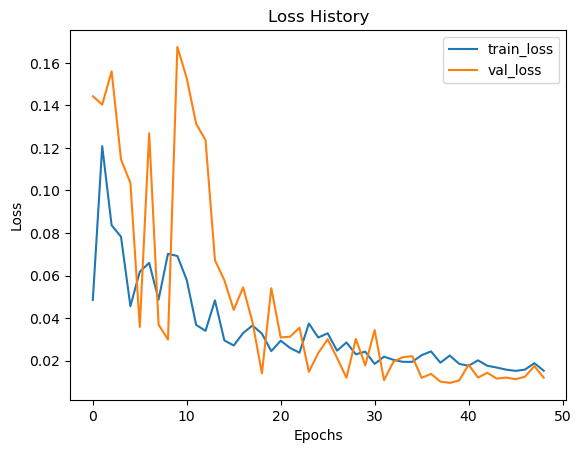

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

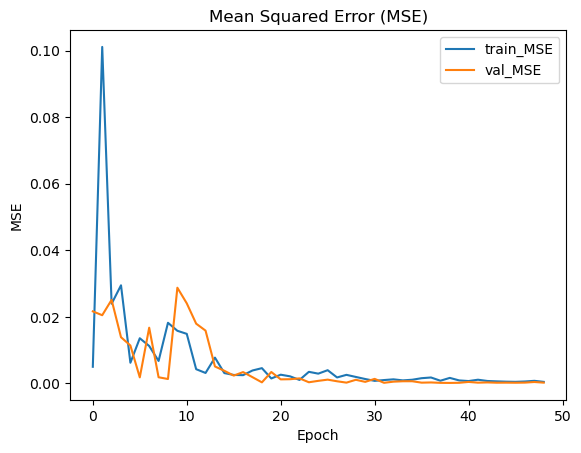

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

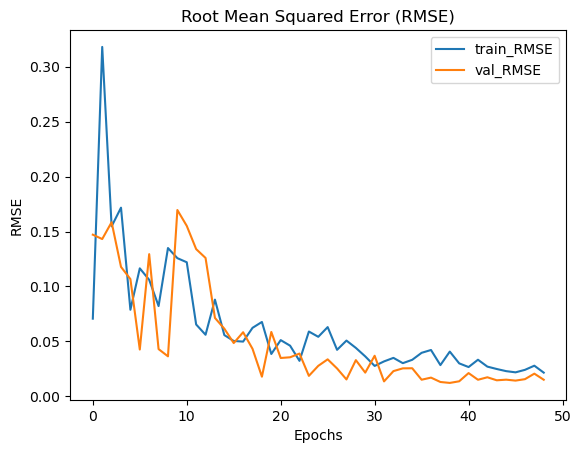

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

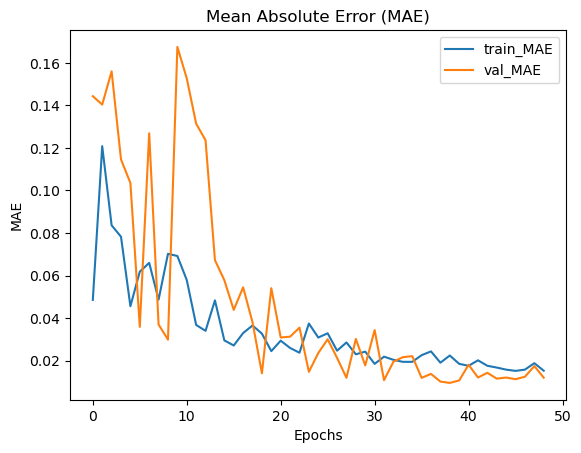

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

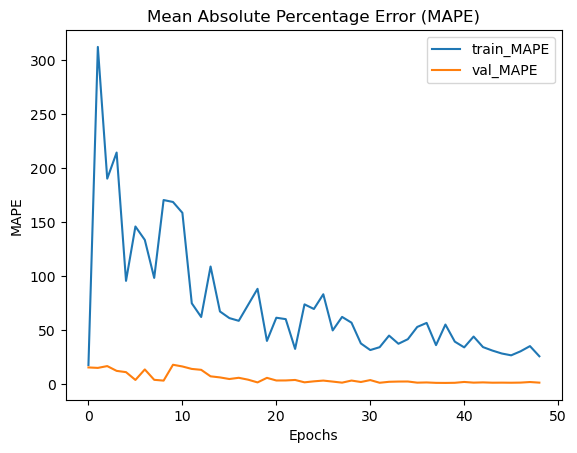

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:02:21.838315: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 2)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


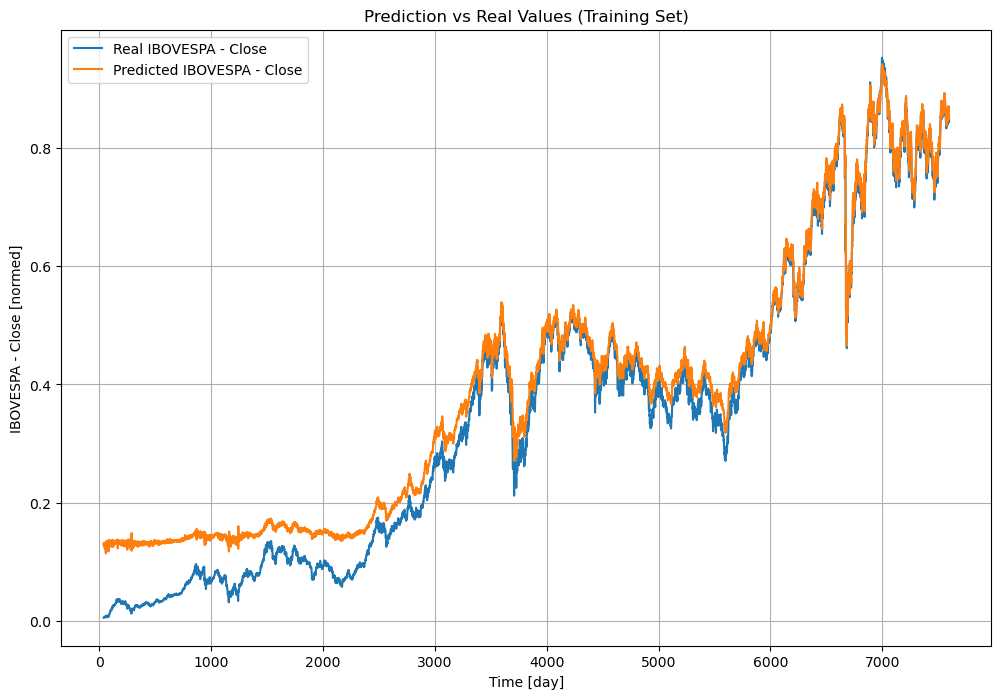

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


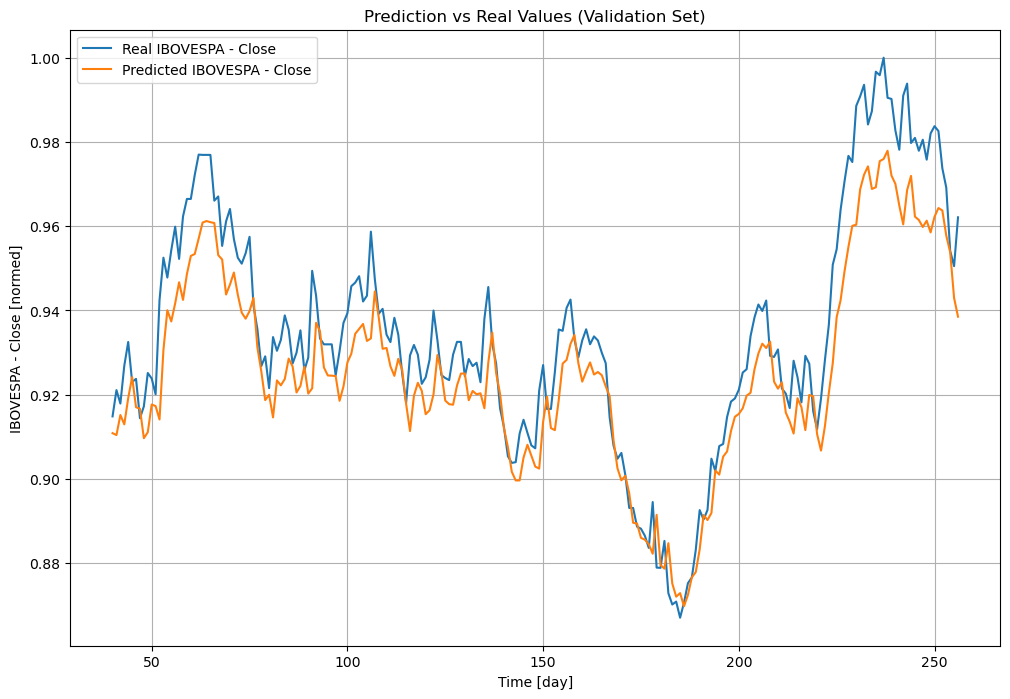

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


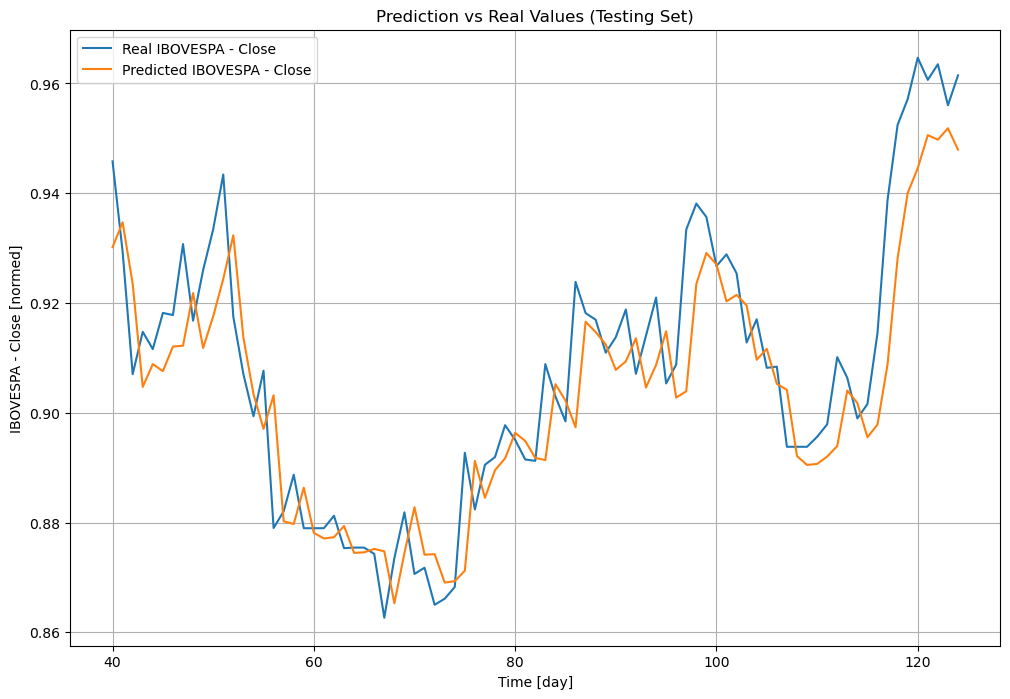

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

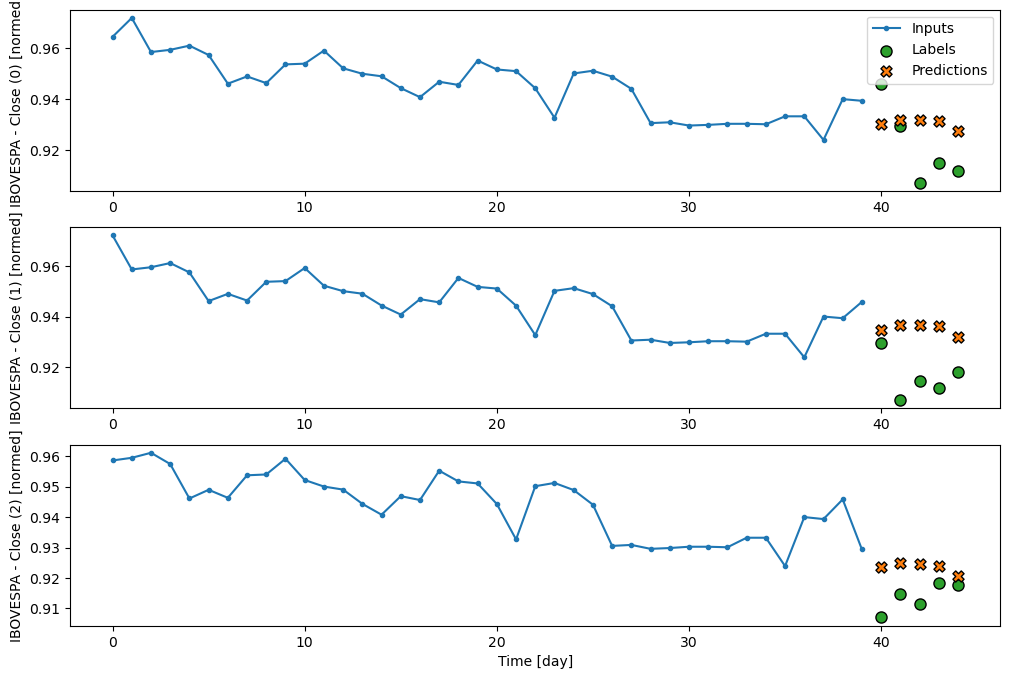

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:6m:2s:404ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step


array([[[0.93017596, 0.93017596, 0.93017596, ..., 0.93017596,
         0.93017596, 0.93017596],
        [0.9319214 , 0.9319214 , 0.9319214 , ..., 0.9319214 ,
         0.9319214 , 0.9319214 ],
        [0.9317533 , 0.9317533 , 0.9317533 , ..., 0.9317533 ,
         0.9317533 , 0.9317533 ],
        [0.93142414, 0.93142414, 0.93142414, ..., 0.93142414,
         0.93142414, 0.93142414],
        [0.92756927, 0.92756927, 0.92756927, ..., 0.92756927,
         0.92756927, 0.92756927]],

       [[0.93470615, 0.93470615, 0.93470615, ..., 0.93470615,
         0.93470615, 0.93470615],
        [0.93659246, 0.93659246, 0.93659246, ..., 0.93659246,
         0.93659246, 0.93659246],
        [0.93647414, 0.93647414, 0.93647414, ..., 0.93647414,
         0.93647414, 0.93647414],
        [0.9361985 , 0.9361985 , 0.9361985 , ..., 0.9361985 ,
         0.9361985 , 0.9361985 ],
        [0.93211627, 0.93211627, 0.93211627, ..., 0.93211627,
         0.93211615, 0.93211615]],

       [[0.9234891 , 0.9234891 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')